<a href="https://colab.research.google.com/github/JoudySaleh-IT/IT326/blob/main/FinalReport.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. **Problem**

Heart disease remains a leading cause of death globally, often resulting from delayed diagnosis or unrecognized early symptoms. In this project, we aim to utilize **the** **Heart Disease** Dataset, which contains detailed health-related information such as age, sex, chest pain type, resting blood pressure, cholesterol levels, fasting blood sugar, and more. These features are crucial indicators that can help predict the presence or risk of heart disease.

The goal is to analyze this patient data to build a predictive model that accurately identifies individuals at risk of developing heart disease. Early detection is vital—it not only saves lives but also minimizes long-term complications and reduces the overall strain on healthcare systems.

By leveraging machine learning, this project empowers both individuals and healthcare professionals to make informed decisions, implement preventive strategies, and take timely medical action, ultimately leading to better health outcomes and enhanced quality of life.

# **2. Data Mining Task**

In our project, we will apply two key data mining techniques: **classification** and **clustering**, to predict and better understand heart disease risk.

For **classification**, we will train a model using medical and lifestyle features such as age, cholesterol, blood pressure, heart rate, and diabetes status. The goal is to predict whether an individual is at risk of heart disease or not. The target variable will be the presence or absence of heart disease, treated as a binary classification problem.

For **clustering**, we will group individuals with similar health characteristics without using the disease label. This unsupervised approach will help uncover hidden patterns, reveal common risk profiles, and provide insights into the underlying factors contributing to heart disease. These findings may support more personalized and effective prevention strategies.

# **3.Data**

Source of Dataset: Heart Disease Dataset: [ https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset ]

# **Read dataset:**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectKBest, f_classif
import pickle
import jinja2
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler


df = pd.read_csv('heart.csv')


# **Genral information about the dataset:**

Number of Attributes: 14

Number of Objects: 1026

Class Lable: Target

In [ ]:
attribute_infornation = pd.DataFrame({
    'AttributeName' : df.columns,
    'DataType' : df.dtypes.values
})
print(f"Number of attributes: {len(df.columns)}")
print('\n')
print(f"Number of objects: {len(df)}")
print('\n')
print("Attribut And Their Types:")
print(attribute_infornation)

Number of attributes: 14


Number of objects: 1025


Attribut And Their Types:
   AttributeName DataType
0            age    int64
1            sex    int64
2             cp    int64
3       trestbps    int64
4           chol    int64
5            fbs    int64
6        restecg    int64
7        thalach    int64
8          exang    int64
9        oldpeak  float64
10         slope    int64
11            ca    int64
12          thal    int64
13        target    int64


## **Attributes’ description table:**

In [ ]:

data = {
    "Attribute Name": [
        "age", "sex", "cp", "trestbps", "chol","fbs", "restecg", "thalach",
        "exang", "oldpeak", "slope", "ca", "thal","target"
    ],
    "Description": [
        "age in years", "Gender of the patient", "chest pain type", "resting blood pressure (in mm Hg on admission to the hospital)",
        "serum cholestoral in mg/dl",
        "fasting blood sugar > 120 mg/dl",
        "resting electrocardiographic results",
        "maximum heart rate achieved",
        "exercise induced angina",
        "ST depression induced by exercise relative to rest",
        "the slope of the peak exercise ST segment",
        "number of major vessels (0-3) colored by fluoroscopy",
        "1 = normal; 2 = fixed defect; 3 = reversible defect",
        "The class label, refers to the presence of heart disease in the patient"
    ],
    "Data Type": [
       "Numeric", "Binary", "Ordinal", "Numeric","Numeric", "Binary","Nominal", "Numeric", "Binary",
        "Numeric", "Ordinal", "Ordinal", "Nominal", "Binary"
    ],
    "Possible Values": [
        "Range between 29-77","Female, Male","Range between 0-3","Range between 94-200","Range between 126-564",
        "1 = greater than 120 mg/dl, 0 = less than 120 mg/dl",
        "Range between 0-2","Range between 71-202","1 = exercise induced angina, 0 = no",
        "Range between 0-6.2","Range between 0-2","Range between 0-4",
        "Range between 0-3","1 = have heart disease, 0 = no heart disease"
    ]
}


attributes_df = pd.DataFrame(data)


from IPython.core.display import display


display(attributes_df)

Attribute Name                                        Description  \
0             age                                       age in years   
1             sex                              Gender of the patient   
2              cp                                    chest pain type   
3        trestbps  resting blood pressure (in mm Hg on admission ...   
4            chol                         serum cholestoral in mg/dl   
5             fbs                    fasting blood sugar > 120 mg/dl   
6         restecg               resting electrocardiographic results   
7         thalach                        maximum heart rate achieved   
8           exang                            exercise induced angina   
9         oldpeak  ST depression induced by exercise relative to ...   
10          slope          the slope of the peak exercise ST segment   
11             ca  number of major vessels (0-3) colored by fluor...   
12           thal  1 = normal; 2 = fixed defect; 3 = reversible d...   
13         target  The class label, refers to the presence of hea...   

   Data Type                                    Possible Values  
0    Numeric                                Range between 29-77  
1     Binary                                       Female, Male  
2    Ordinal                                  Range between 0-3  
3    Numeric                               Range between 94-200  
4    Numeric                              Range between 126-564  
5     Binary  1 = greater than 120 mg/dl, 0 = less than 120 ...  
6    Nominal                                  Range between 0-2  
7    Numeric                               Range between 71-202  
8     Binary                1 = exercise induced angina, 0 = no  
9    Numeric                                Range between 0-6.2  
10   Ordinal                                  Range between 0-2  
11   Ordinal                                  Range between 0-4  
12   Nominal                                  Range between 0-3  
13    Binary       1 = have heart disease, 0 = no heart disease

## **Sample of 20 people from the dataset:**

In [ ]:
sample=df.sample(n=20);
sample

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
80    50    1   2       140   233    0        1      163      0      0.6   
734   52    1   0       128   204    1        1      156      1      1.0   
900   61    1   3       134   234    0        1      145      0      2.6   
134   54    1   1       108   309    0        1      156      0      0.0   
700   41    1   2       130   214    0        0      168      0      2.0   
172   56    1   1       120   240    0        1      169      0      0.0   
113   57    1   0       110   335    0        1      143      1      3.0   
568   54    0   2       160   201    0        1      163      0      0.0   
849   52    1   0       128   255    0        1      161      1      0.0   
664   66    0   3       150   226    0        1      114      0      2.6   
335   58    1   0       150   270    0        0      111      1      0.8   
559   67    1   0       120   237    0        1       71      0      1.0   
216   65    1   0       135   254    0        0      127      0      2.8   
30    44    1   0       120   169    0        1      144      1      2.8   
961   58    0   0       100   248    0        0      122      0      1.0   
526   62    0   0       160   164    0        0      145      0      6.2   
662   47    1   0       112   204    0        1      143      0      0.1   
353   57    1   0       110   201    0        1      126      1      1.5   
575   43    1   0       150   247    0        1      171      0      1.5   
165   59    1   0       170   326    0        0      140      1      3.4   

     slope  ca  thal  target  
80       1   1     3       0  
734      1   0     0       0  
900      1   2     2       0  
134      2   0     3       1  
700      1   0     2       1  
172      0   0     2       1  
113      1   1     3       0  
568      2   1     2       1  
849      2   1     3       0  
664      0   0     2       1  
335      2   0     3       0  
559      1   0     2       0  
216      1   1     3       0  
30       0   0     1       0  
961      1   0     2       1  
526      0   3     3       0  
662      2   0     2       1  
353      1   0     1       1  
575      2   0     2       1  
165      0   0     3       0

# **Show missing data:**

In [ ]:
missing_counts = df.isnull().sum()
print("Missing values in each column:")
print(missing_counts)
print()
rows_with_missing = df.isnull().sum(axis=1)
print("Rows with missing values:")
print(rows_with_missing);

Missing values in each column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Rows with missing values:
0       0
1       0
2       0
3       0
4       0
       ..
1020    0
1021    0
1022    0
1023    0
1024    0
Length: 1025, dtype: int64


We notice that there are no missing values, and all columns are complete.

## **Summary of data:**

In [ ]:
summary=df.describe();
print(summary);

               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000  

**Some columns are actually non-numeric but are stored as numeric types that is why they appered in the output **

 **Statistical summary of numeric attribute :**

**age:**
There is significant variability in ages, ranging from 29 to 77 years, with an average of 54.43 years. This indicates that the dataset primarily consists of middle-aged and older individuals, who are at a higher risk of heart disease.

**Resting Blood Pressure (trestbps):**
The values range from 94 to 200 mmHg, with the mean at 131.61 mmHg. The median is 130 mmHg, which is close to the mean, suggesting a relatively balanced distribution. The standard deviation is 17.51, indicating moderate variability in blood pressure levels among individuals.

**serum cholestoral (chol):**
The values vary significantly, with a minimum of 126 and a maximum of 564. The mean is 246, which is slightly higher than the median of 240, indicating a slight skew in distribution. The standard deviation is 51.59, suggesting considerable variability in cholesterol levels, which may indicate different risk profiles for heart disease.


**Maximum Heart Rate Achieved (thalach):**
Heart rate values range from 71 bpm to 202 bpm, which indicates a wide range of cardiovascular fitness levels. The mean is 149 bpm, which is relatively high. The median of 152 bpm is very close to the mean, suggesting that the heart rate distribution is fairly symmetrical. The standard deviation is 23.00, showing variability in heart rates among individuals.


**ST depression induced by exercise relative to rest(oldpeak):**
ST depression values range from 0 to 6.2, with a mean of 1.07. The median of 0.8 suggests that most individuals have mild ST depression, but a few cases show severe depression, which is a potential indicator of heart disease risk. The standard deviation is 1.17, showing that there is variability in how much ST depression different individuals experience.


## **Calculate the variance :**


In [ ]:
variance= df.var(numeric_only=True);
print(variance)

age           82.306450
sex            0.211944
cp             1.060160
trestbps     306.835410
chol        2661.787109
fbs            0.127111
restecg        0.278655
thalach      529.263325
exang          0.223514
oldpeak        1.380750
slope          0.381622
ca             1.062544
thal           0.385219
target         0.250071
dtype: float64


**Some columns are actually non-numeric but are stored as numeric types that is why they appered in the output **

**Variance Analysis of the Dataset:**

**High Variance Values:**

*Cholesterol (2661.79):* Extremely high, meaning large differences in cholesterol levels.

*Resting Blood Pressure (306.84) :* High variance, suggesting a wide range of BP values.

*Maximum Heart Rate Achieved (529.26) :* Indicates significant variability in heart rate.

*Age (82.31) :* Shows a diverse age distribution.


**Moderate Variance Values:**

*oldpeak (1.38).*

These values suggest some variation but not as extreme as cholesterol or heart rate.


## **Understanding the data through graph representations:**

# Histogram:

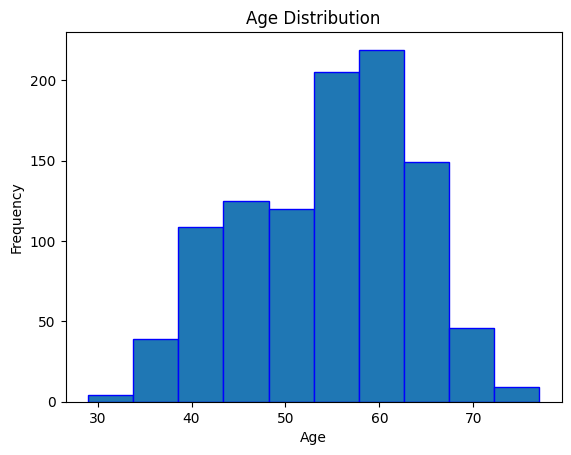

In [ ]:
ages = df['age']
plt.hist(ages , bins = 10, edgecolor = 'blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show;

The histogram illustrates the age distribution of participants in our dataset. Key observations include:

Majority Age Group: Most individuals are aged between 50 and 60 years, indicating a focus on middle-aged adults.

Range: The ages range from approximately 30 to over 70, showing a diverse study population.

# Pie Chart:

sex
1    0.69561
0    0.30439
Name: proportion, dtype: float64


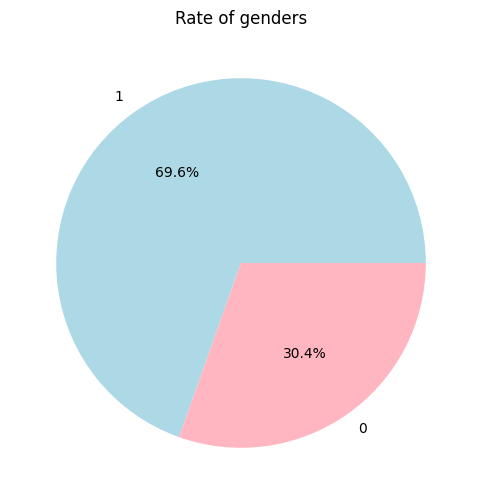

In [ ]:
data2 = df['sex'].value_counts(normalize=True)
print(data2)
name = df['sex'].value_counts().index.tolist()
value = df['sex'].value_counts().tolist()
fig = plt.figure(figsize=(6,6))
plt.pie(value, labels=name,autopct='%1.1f%%',colors=['#ADD8E6','#FFB6C1'])
plt.title('Rate of genders')
plt.show()

We used a pie chart to illustrate the percentage distribution of each gender in the total data set , this results in 69.6% of men and 30.4% of female.



# Scatter Plot:

chol
204    0.020488
234    0.020488
197    0.018537
212    0.017561
254    0.016585
         ...   
164    0.002927
394    0.002927
215    0.002927
160    0.002927
141    0.002927
Name: proportion, Length: 152, dtype: float64


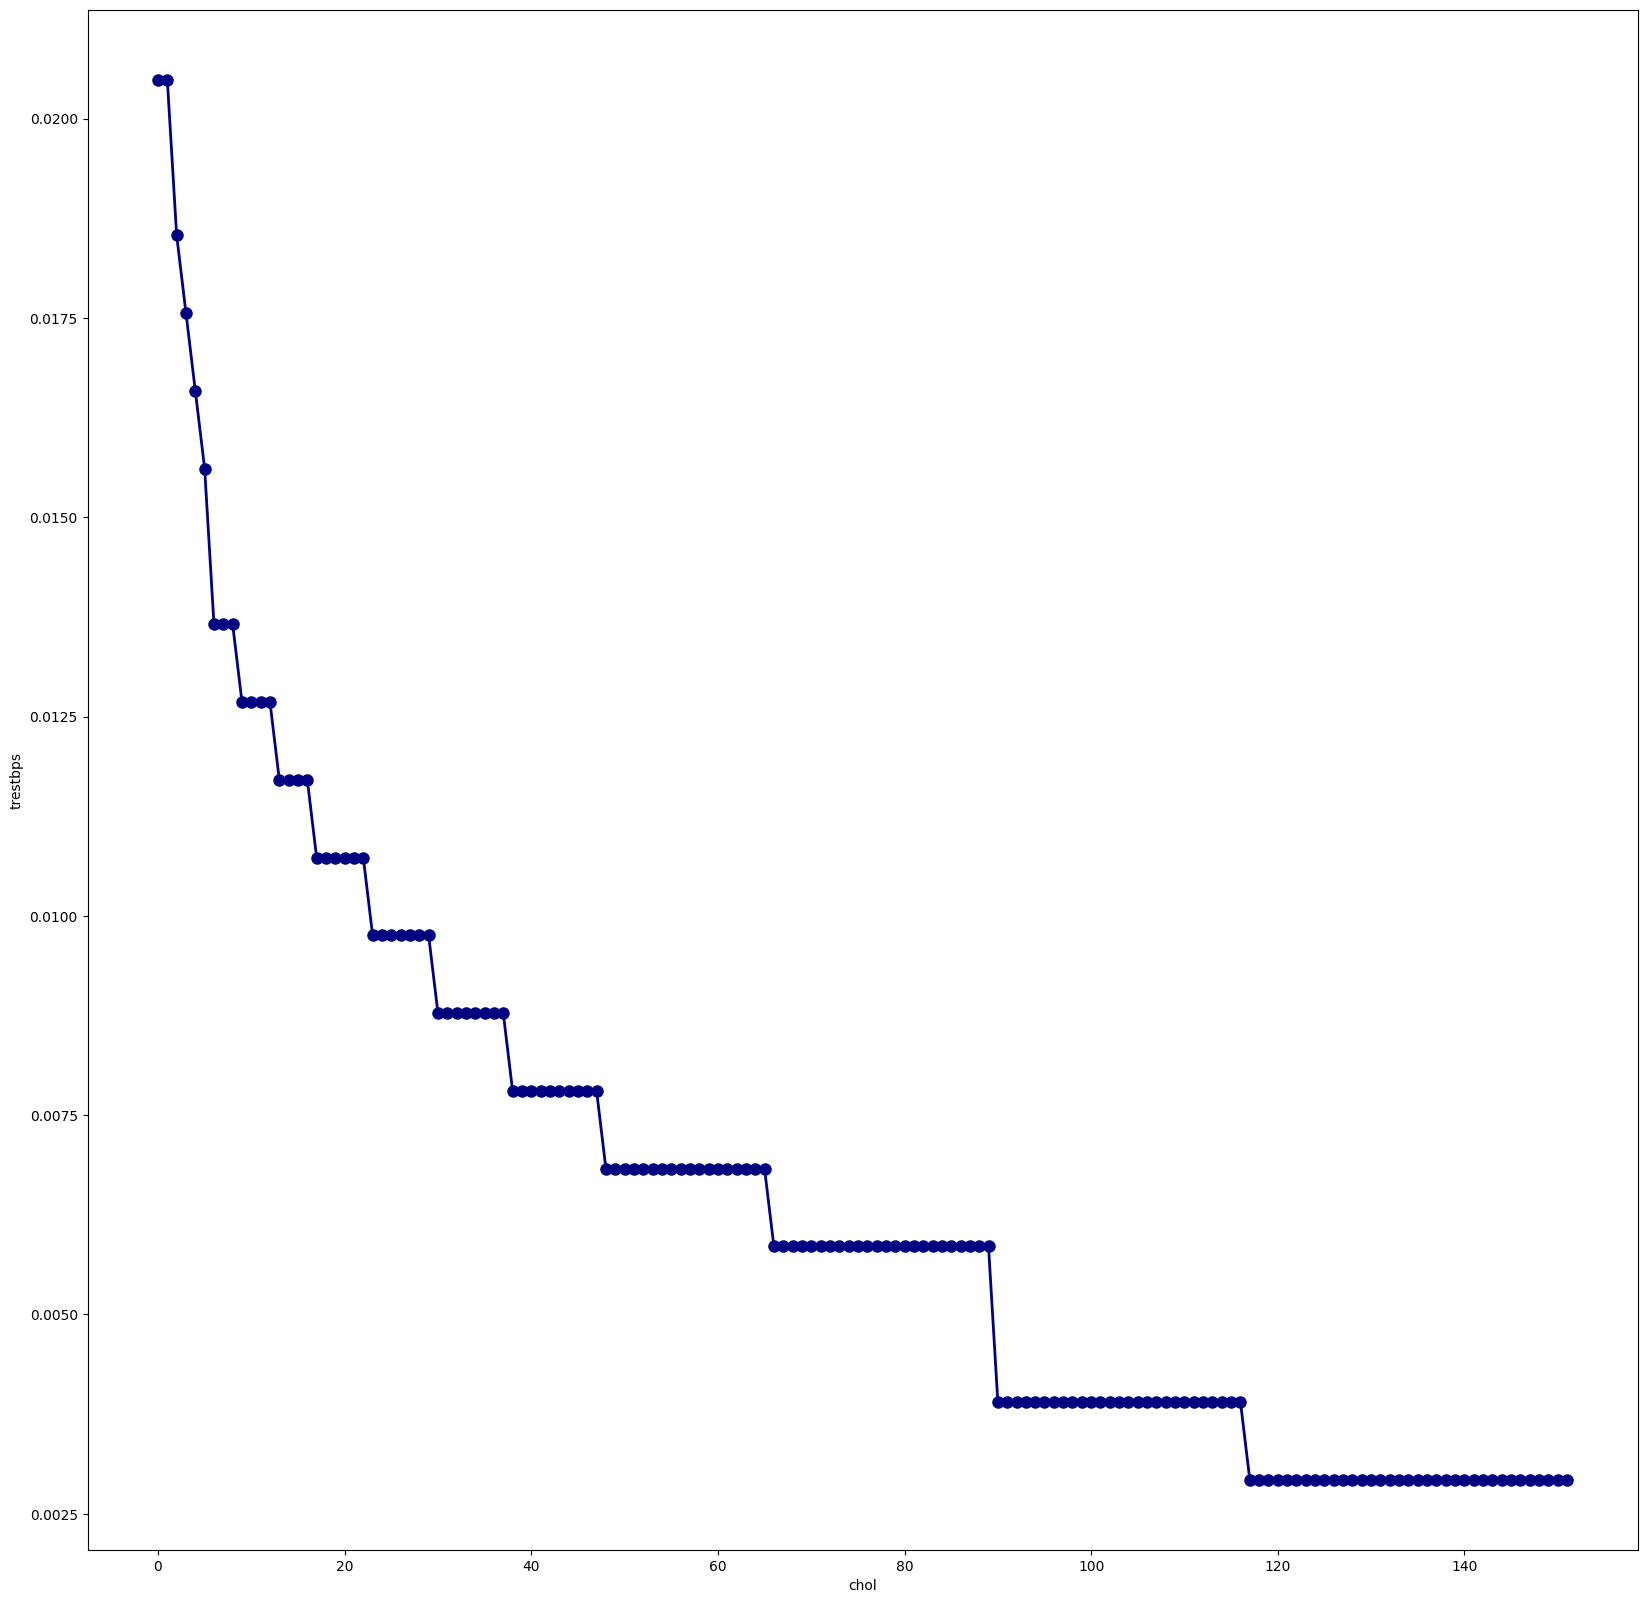

In [ ]:
data3 = df['chol'].value_counts(normalize=True)
print(data3)
x = range(len(data3))
y= data3.values
plt.figure(figsize=(20,20))
plt.plot(x,y, color='#000080', marker='o', linestyle='-', linewidth=2, markersize=8, label='Pink Line')
plt.xlabel('chol')
plt.ylabel('trestbps')
plt.show()

The scatter plot illustrates the relationship between cholesterol levels and blood pressure, indicating a trend where as cholesterol levels increase, blood pressure also tends to rise.

## **4.Data Preprocessing:**

### **Show Duplicate:**

To make sure that our data is clean and doesn't contain redundant data we start by using the code that help us to find the duplication.

In [ ]:
num_duplicates = df.duplicated().sum()
print("Number of duplicate rows:", num_duplicates)


Number of duplicate rows: 723


# **Removing Duplicate:**

we found so many duplicates in our dataset, so we decided not to remove them. Keeping these duplicates might help us capture the full range of data and better understand the frequency and consistency of certain heart health conditions. This approach ensures that we account for all potential observations and maintain the integrity of our dataset for comprehensive analysis.


# **Show Outliers:**

Outliers are identified to find data points that are far different from most of the data because they can affect our analysis or predictions. By taking out these outliers, we make sure they don't sway the overall results, helping our models to work better and more fairly without being skewed by these extreme values.

In [ ]:
from scipy.stats import zscore

# Columns selected for detecting outliers
columns_to_detect_outliers = ['age', 'trestbps', 'chol', 'thalach']
# Calculate z-scores for the selected columns
z_scores = df[columns_to_detect_outliers].apply(zscore)

# Define a threshold for identifying outliers
threshold = 3

# Identify outliers using the threshold
outliers = df[(abs(z_scores) > threshold).any(axis=1)]

# Display the outliers
print("Outliers based on z-scores for the selected columns: \n")
display(outliers)


Outliers based on z-scores for the selected columns: 



age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
123   65    0   2       140   417    1        0      157      0      0.8   
151   54    1   1       192   283    0        0      195      0      0.0   
158   67    0   2       115   564    0        0      160      0      1.6   
175   56    0   0       200   288    1        0      133      1      4.0   
179   56    0   0       134   409    0        0      150      1      1.9   
192   67    0   2       115   564    0        0      160      0      1.6   
246   54    1   1       192   283    0        0      195      0      0.0   
267   67    1   0       120   237    0        1       71      0      1.0   
294   56    0   0       200   288    1        0      133      1      4.0   
296   67    1   0       120   237    0        1       71      0      1.0   
326   54    1   1       192   283    0        0      195      0      0.0   
378   67    1   0       120   237    0        1       71      0      1.0   
450   63    0   0       150   407    0        0      154      0      4.0   
464   67    0   2       115   564    0        0      160      0      1.6   
481   63    0   0       150   407    0        0      154      0      4.0   
508   56    0   0       200   288    1        0      133      1      4.0   
559   67    1   0       120   237    0        1       71      0      1.0   
641   56    0   0       134   409    0        0      150      1      1.9   
665   65    0   2       140   417    1        0      157      0      0.8   
685   63    0   0       150   407    0        0      154      0      4.0   
688   56    0   0       200   288    1        0      133      1      4.0   
889   63    0   0       150   407    0        0      154      0      4.0   
958   65    0   2       140   417    1        0      157      0      0.8   
996   56    0   0       134   409    0        0      150      1      1.9   

     slope  ca  thal  target  
123      2   1     2       1  
151      2   1     3       0  
158      1   0     3       1  
175      0   2     3       0  
179      1   2     3       0  
192      1   0     3       1  
246      2   1     3       0  
267      1   0     2       0  
294      0   2     3       0  
296      1   0     2       0  
326      2   1     3       0  
378      1   0     2       0  
450      1   3     3       0  
464      1   0     3       1  
481      1   3     3       0  
508      0   2     3       0  
559      1   0     2       0  
641      1   2     3       0  
665      2   1     2       1  
685      1   3     3       0  
688      0   2     3       0  
889      1   3     3       0  
958      2   1     2       1  
996      1   2     3       0

# Box Plot For Outilers :

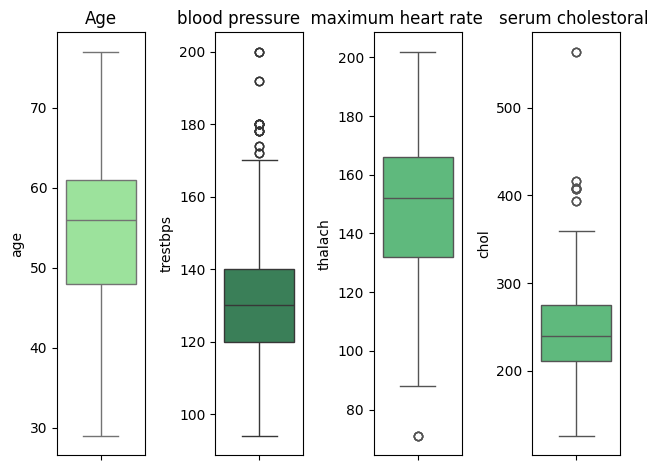

In [ ]:

fig, axes = plt.subplots(1,4,)
sns.boxplot(data=df,y='age' , ax=axes[0],color='#90EE90')
axes[0].set_title("Age")
sns.boxplot(data=df,y='trestbps' , ax=axes[1],color='#2E8B57')
axes[1].set_title("blood pressure        ")
sns.boxplot(data=df,y='thalach' , ax=axes[2],color='#50C878')
axes[2].set_title("  maximum heart rate          ")
sns.boxplot(data=df,y='chol' , ax=axes[3],color='#50C878')
axes[3].set_title("serum cholestoral ")
plt.tight_layout()
plt.show();

# **Removing outliers:**



In [ ]:
#Remove the rows with outliers
df_no_outlier= df.drop(outliers.index)

#count the removed rows
df_no_outlierRows=df_no_outlier.shape[0]

print("After removing outliers from the selected columns \n ")

display(df_no_outlier)

print("\nnumber of rows after remove outliers: \n"+ str(df_no_outlierRows) +"\n")

After removing outliers from the selected columns 
 


age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2   2     3       0  
1         0   0     3       0  
2         0   0     3       0  
3         2   1     3       0  
4         1   3     2       0  
...     ...  ..   ...     ...  
1020      2   0     2       1  
1021      1   1     3       0  
1022      1   1     2       0  
1023      2   0     2       1  
1024      1   1     3       0  

[1001 rows x 14 columns]


number of rows after remove outliers: 
1001



# **Correlation Coefficient:**


Correlation coefficient between age and chol: 0.22
Correlation coefficient between age and trestbps: 0.27
Correlation coefficient between age and thalach: -0.39
Correlation coefficient between age and oldpeak: 0.21
Correlation coefficient between chol and trestbps: 0.13
Correlation coefficient between chol and thalach: -0.02
Correlation coefficient between chol and oldpeak: 0.06
Correlation coefficient between trestbps and thalach: -0.04
Correlation coefficient between trestbps and oldpeak: 0.19
Correlation coefficient between thalach and oldpeak: -0.35


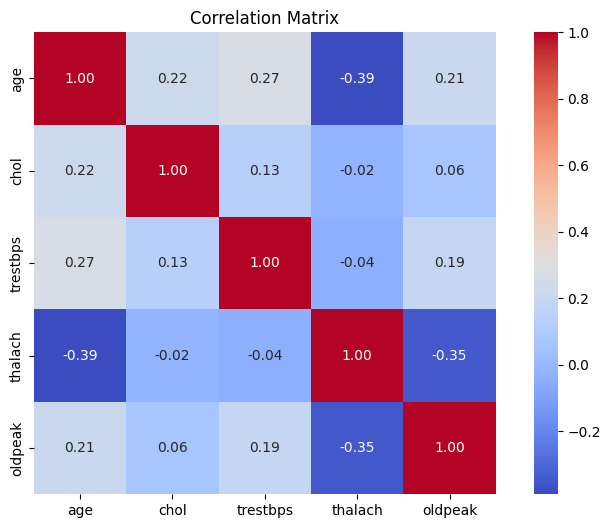

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
df = df.dropna()
columns = ['age', 'chol', 'trestbps', 'thalach', 'oldpeak']

correlation_results = {}
for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        col1 = columns[i]
        col2 = columns[j]

        data_col1 = df[col1]
        data_col2 = df[col2]

        correlation_coefficient = np.corrcoef(data_col1, data_col2)[0, 1]
        correlation_results[(col1, col2)] = correlation_coefficient
        print(f"Correlation coefficient between {col1} and {col2}: {correlation_coefficient:.2f}")
# Visualization of the correlation matrix
plt.figure(figsize=(10, 6))
correlation_matrix = df[columns].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()


Our analysis focused on identifying the strength of relationships between several key cardiovascular indicators within the dataset. Below is a brief summary of each correlation:

**Age and Cholesterol (Chol):** A correlation of 0.22 suggests a mild positive association, indicating that cholesterol levels tend to slightly increase with age.

**Age and Resting Blood Pressure (Trestbps):** The correlation of 0.27 shows a mild positive relationship, implying that as people age, their resting blood pressure may moderately increase.

**Age and Maximum Heart Rate (Thalach):** A stronger negative correlation of -0.39 indicates that maximum heart rate decreases as age increases.

**Age and ST Depression (Oldpeak):** With a correlation of 0.21, there is a mild positive relationship suggesting that ST depression during exercise slightly increases with age.

**Cholesterol and ST Depression (Oldpeak):** The correlation of 0.06 is very weak, indicating a negligible direct relationship between cholesterol levels and ST depression from exercise.

**Resting Blood Pressure (Trestbps) and ST Depression (Oldpeak):** A correlation of 0.19 points to a weak positive relationship, suggesting a slight increase in exercise-induced ST depression with higher resting blood pressure.

**Maximum Heart Rate (Thalach) and ST Depression (Oldpeak):** The negative correlation of -0.35 indicates a moderate inverse relationship, where higher maximum heart rates during exercise are associated with lower levels of ST depression.

These findings help us better understand how different cardiovascular factors are interrelated, which is crucial for assessing heart health risks and tailoring interventions accordingly.

We visualized these relationships using a heatmap, which helps us see the strength of these correlations at a glance, with **red** indicating stronger positive relationships and **blue** indicating stronger negative ones.



# **Chi Squeare:**

In [ ]:
# Define the categorical columns from your dataset
categorical_columns = ['restecg','thal']

for column in categorical_columns:
    print(f"\nChi-Square Test for {column} and Heart Attack Risk (target):")

    contingency_table = pd.crosstab(df[column], df['target'])

    print("Contingency Table:")
    print(contingency_table)

    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)


    print(f"Chi-Square Statistic: {chi2_stat}")
    print(f"P-Value: {p_value}")
    print(f"Degrees of Freedom: {dof}")
    print("Expected Frequencies:")
    print(expected)


Chi-Square Test for restecg and Heart Attack Risk (target):
Contingency Table:
target     0    1
restecg          
0        283  214
1        204  309
2         12    3
Chi-Square Statistic: 35.784315178352564
P-Value: 1.6964251003877617e-08
Degrees of Freedom: 2
Expected Frequencies:
[[241.95414634 255.04585366]
 [249.74341463 263.25658537]
 [  7.30243902   7.69756098]]

Chi-Square Test for thal and Heart Attack Risk (target):
Contingency Table:
target    0    1
thal            
0         4    3
1        43   21
2       132  412
3       320   90
Chi-Square Statistic: 280.33068874382866
P-Value: 1.7958943544531507e-60
Degrees of Freedom: 3
Expected Frequencies:
[[  3.40780488   3.59219512]
 [ 31.15707317  32.84292683]
 [264.83512195 279.16487805]
 [199.6        210.4       ]]


To investigate the relationship between a number of categorical factors (including resting electrocardiographic results and thalassemia) and the chance of having a heart Disease, we use the chi-square test in this research. The crucial point to remember is that a strong association exists when the p-value obtained from the chi-square test is less than 0.05, indicating that the association between the variable and the chance of having a heart Disease is statistically significant. However, the association is weak or statistically insignificant if the p-value is higher than 0.05.


1.    Resting electrocardiographic results (retecg): The chi-square test shows a strong association
between resting electrocardiographic results and the risk of having a heart Disease, as shown by the chi-square statistic (p-value 1.69×10−8). This indicates that the association between the resting electrocardiographic results and the risk of having a heart Disease is statistically significant.
2.    Thalassemia (thal): The chi-square test shows a very strong association between thalassemia and the risk of heart Disease, as shown by the chi-square statistic (p-value 1.79×10−60). This shows that thalassemia has a statistically significant effect on the likelihood of heart Disease risk.

# **Removing attributes with an absolute correlation :**

In [ ]:
correlation_matrix = df.corr(numeric_only=True)
correlation_threshold = 0.75
highly_correlated_pairs = np.where(np.abs(correlation_matrix) >= correlation_threshold)
numeric_attributes = list(df.select_dtypes(include='number').columns)

attributes_to_remove = set()

for i, j in zip(*highly_correlated_pairs):
    if i != j and numeric_attributes[i] not in attributes_to_remove and numeric_attributes[j] not in attributes_to_remove:
        attribute_i = numeric_attributes[i]
        attribute_j = numeric_attributes[j]
        attributes_to_remove.add(attribute_j)

df_filtered = df.drop(columns=attributes_to_remove)

print("\nOriginal DataFrame:")
print(df)

print("\nDataFrame after removing highly correlated attributes:")
print(df_filtered)


Original DataFrame:
      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2   2     3 

**Purpose of Analysis:**
The purpose of this analysis is to identify and remove attributes that exhibit high correlation in a health dataset. This helps avoid redundancy and improve model efficiency. Highly correlated attributes can lead to complexity, which can negatively impact the performance of statistical models. In this analysis, we calculated the correlation matrix for numerical variables and set a threshold of 0.75 to highlight highly correlated attribute pairs.

**Removal of attributes:**
The analysis identified attribute pairs with an absolute correlation coefficient of 0.75 or higher. One attribute from each pair was systematically removed, simplifying the dataset by retaining only one representative attribute from each highly correlated group.

**Original Data Frame:**
The original dataset consisted of 1025  rows and 14 columns, including various health-related attributes such as age, gender, cholesterol, resting blood pressure, heart rate and more.

**Data frame after removing highly correlated attributes:** After applying the correlation threshold, the filtered data frame retained only the essential attributes. In this particular analysis, no attributes were removed, as no pair of attributes showed a correlation of 0.75 or higher. Thus, the original data set remains unchanged, with 1025  rows and 14 columns.

## **Data Transformation:**

# **Normaliztion:**
We want to apply Min-Max normalization to the attributes **chol**, **thalach**, and **oldpeak** to rescale their values to the range [0, 1]. This prevents any feature from dominating due to scale differences. By normalizing these features, we y, ensuring that all features contribute equally.

In [ ]:
# Select columns that need to be normalize
columns_to_normalize = [ 'chol', 'thalach',  'oldpeak']
data_to_normalize = df_filtered[columns_to_normalize]

# Apply Min-Max scaling
minmax_scaler = MinMaxScaler()
normalized_data = minmax_scaler.fit_transform(data_to_normalize)

# Replace original values with normalized values
df_filtered[columns_to_normalize] = normalized_data

print("Min-Max scaled data (selected columns normalized):")
print(df_filtered.head())


Min-Max scaled data (selected columns normalized):
   age  sex  cp  trestbps      chol  fbs  restecg   thalach  exang   oldpeak  \
0   52    1   0       125  0.196347    0        1  0.740458      0  0.161290   
1   53    1   0       140  0.175799    1        0  0.641221      1  0.500000   
2   70    1   0       145  0.109589    0        1  0.412214      1  0.419355   
3   61    1   0       148  0.175799    0        1  0.687023      0  0.000000   
4   62    0   0       138  0.383562    1        1  0.267176      0  0.306452   

   slope  ca  thal  target  
0      2   2     3       0  
1      0   0     3       0  
2      0   0     3       0  
3      2   1     3       0  
4      1   3     2       0  


The values of **chol**, **thalach**, and **oldpeak** are now between 0 and 1, making the dataset more consistent and ready for analysis.


# **Discretization:**
Discretizing age and blood pressure allows for easier analysis of health risks and patterns. Age bins help compare heart disease risk across different age groups, while blood pressure bins classify individuals into risk levels. This helps identify trends  related to heart disease.

In [ ]:
# make sure that the  age bins based on the range (29-77)
age_bins = [29, 44, 60, 77]
age_labels = [0, 1, 2]
# Check for NaN values in the age column
print(df_filtered['age'].isna().sum())

# Perform discretization
df_filtered['age'] = pd.cut(df_filtered['age'], bins=age_bins, labels=age_labels, include_lowest=True)

# Display  the  discretized values
print(" Discretized Age:")
print(df_filtered[ 'age'])

0
 Discretized Age:
0       1
1       1
2       2
3       2
4       2
       ..
1020    1
1021    1
1022    1
1023    1
1024    1
Name: age, Length: 1025, dtype: category
Categories (3, int64): [0 < 1 < 2]


By applying binning, we transformed continuous age values into categorical groups

The age bins were set based on the range (29-77):



*   Bin 0 (Young Adults): Ages 29-44
*   Bin 1 (Middle-Aged Adults): Ages 45-60
*  Bin 2 (Seniors): Ages 61-77



We used Min-Max binning with pd.cut(), ensuring that values at the lower boundary (age 29) were included in the first bin

The final output displays the transformed age column, now categorized into discrete groups for better comparison and trend analysis.

In [ ]:
bp_bins = [94, 120, 140, 200]  # Categories: Low, Normal, High
bp_labels = [0, 1, 2]

# Perform discretization
df_filtered['trestbps'] = pd.cut(df_filtered['trestbps'], bins=bp_bins, labels=bp_labels, include_lowest=True)

# Displa discretized values
print(" Discretized Resting Blood Pressure:")
print(df_filtered[ 'trestbps'])

 Discretized Resting Blood Pressure:
0       1
1       1
2       2
3       2
4       1
       ..
1020    1
1021    1
1022    0
1023    0
1024    0
Name: trestbps, Length: 1025, dtype: category
Categories (3, int64): [0 < 1 < 2]


discretizes resting blood pressure (trestbps) into three categories to classify individuals based on their blood pressure levels.

The blood pressure bins were defined as follows:



*   0 (Low Blood Pressure): 94-120 mmHg
*   1 (Normal Blood Pressure): 121-140 mmHg
*   2 (High Blood Pressure): 141-200 mmHg




We used binning with pd.cut(), ensuring that the lowest boundary (94 mmHg) was included in the first category.

The final output displays the transformed trestbps column, now categorized into discrete blood pressure groups for better comparison and  analysis.

## **Encoding**
Our dataset does not require encoding because all categorical variables are already represented in a numerical format and doesn't have text format

### **Correlation-based Feature Selection:**

In [ ]:
X = df_filtered.iloc[:, :-1]
y = df_filtered.iloc[:, -1]

selector = SelectKBest(score_func=f_classif, k=2)
X_new = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)

Selected Features: Index(['exang', 'oldpeak'], dtype='object')


This research aims to determine which elements in a health dataset are most associated with predicting the probability of a heart attack. Improving the accuracy and interpretability of the model is essential for this purpose.

• Defining Features and Target: The dataset is first divided into features (all columns except the final one) and the target variable (the last column, which represents the risk of a heart attack).

• Feature Selection Process: The SelectKBest approach is applied using the ANOVA F-test (f_classif), which evaluates the features based on their statistical significance in relation to the target variable. In this case, we choose the top two features that have the highest impact on predicting heart attack risk.

• Results: The selected features are exang (exercise-induced angina) and oldpeak (ST depression induced by exercise relative to rest). This suggests that these characteristics have the most influence on heart attack risk in the dataset.

### **Wrapper Methods**
### **Recursive Feature Elimination:**

In [ ]:
X = df_filtered.iloc[:, :-1]
y = df_filtered.iloc[:, -1]

model = LogisticRegression()

rfe = RFE(model, n_features_to_select=2)
X_new = rfe.fit_transform(X, y)


selected_features = [i for i, mask in enumerate(rfe.support_) if mask]
print("Selected Features:", selected_features)


Selected Features: [7, 9]



This analysis aims to identify the most significant features in a health dataset for predicting heart attack risk, thereby improving the model’s accuracy and interpretability.

- **Defining Features and Target:** The dataset is divided into independent features (all columns except the final one) and the target variable (the last column, which represents the risk of a heart attack).  
- **Model Selection:** **Logistic Regression** is used as the base estimator for the **Recursive Feature Elimination (RFE)** method, which is commonly applied in binary classification tasks like predicting heart attack risk.  
- **Recursive Feature Elimination Process:** The model is trained on the data, and the least important features are systematically removed until only the **top two features** remain.  

### **Results:**
The two most important selected features are:
- **`thalach` (Gender)**, which corresponds to **column index 7**.
- **`oldpeak` (Maximum Heart Rate Achieved)**, which corresponds to **column index 9**.

This indicates that these two features (`thalach` and `oldpeak`) have the most significant influence on determining heart attack risk based on this analytical model.

### **Embedded Methods**
### **L1 Regularization:**

In [ ]:
# Assuming the last column is the target
X = df_filtered.iloc[:, :-1]
y = df_filtered.iloc[:, -1]

# Use L1 Regularization (LASSO) for feature selection
model = Lasso(alpha=0.1)
model.fit(X, y)


# Display the selected features (features with non-zero coefficients)
selected_features = X.columns[model.coef_ != 0]
print("Selected Features:", selected_features)

Selected Features: Index(['age', 'cp', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca'], dtype='object')


This analysis aims to identify the most important features in a health dataset for predicting the risk of a heart attack, helping to improve model accuracy and reduce computational complexity.  

 **Model Setup:**  
1. **Defining Features and Target:**  
    The dataset is divided so that **X** represents all features (all columns except the last one), while **y** represents the target variable (occurrence of a heart attack).  

2. **Applying Lasso:**  
    The **Lasso (Least Absolute Shrinkage and Selection Operator) model** is used, which is a form of L1 regularization that reduces the impact of less important features by assigning their weights to zero.

    The **regularization parameter (alpha = 0.1)** is set, which controls the amount of shrinkage applied to the coefficients.  



 **Feature Selection:**  

After training the model on the dataset, the coefficients associated with each feature are examined. Features that retain non-zero coefficients are considered the most significant.  

 **Results:**  

According to the Lasso analysis, the most influential features for predicting heart attack risk are:  
**['age', 'cp', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']**  
This indicates that these features play a key role in determining heart attack risk based on the available data.

### **Save the dataset after preprocessing :**


In [ ]:
df_filtered.to_csv("The_Processed_data.csv")

# **5. Data Mining Technique:**

# 5.1) Classification:

In [ ]:
import pandas as pd
from scipy import stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn import tree
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score




data = pd.read_csv('Processed_dataset.csv');
print(data)

      age  sex  cp  trestbps      chol  fbs  restecg   thalach  exang  \
0       1    1   0         1  0.196347    0        1  0.740458      0   
1       1    1   0         1  0.175799    1        0  0.641221      1   
2       2    1   0         2  0.109589    0        1  0.412214      1   
3       2    1   0         2  0.175799    0        1  0.687023      0   
4       2    0   0         1  0.383562    1        1  0.267176      0   
...   ...  ...  ..       ...       ...  ...      ...       ...    ...   
1020    1    1   1         1  0.216895    0        1  0.709924      1   
1021    1    1   0         1  0.301370    0        0  0.534351      1   
1022    1    1   0         0  0.340183    0        0  0.358779      1   
1023    1    0   0         0  0.292237    0        0  0.671756      0   
1024    1    1   0         0  0.141553    0        1  0.320611      0   

       oldpeak  slope  ca  thal  target  
0     0.161290      2   2     3       0  
1     0.500000      0   0     3       0

**Feature Selection**

chooses the variables (features) to be utilized in training, which are kept in the variable "X," as well as the variable from the dataset that has the right classifications (class labels), which is kept in the variable "y."



In [ ]:
fn= data.keys().tolist()[:-1]
X= data[fn]
y=data['target']
print(X)

      age  sex  cp  trestbps      chol  fbs  restecg   thalach  exang  \
0       1    1   0         1  0.196347    0        1  0.740458      0   
1       1    1   0         1  0.175799    1        0  0.641221      1   
2       2    1   0         2  0.109589    0        1  0.412214      1   
3       2    1   0         2  0.175799    0        1  0.687023      0   
4       2    0   0         1  0.383562    1        1  0.267176      0   
...   ...  ...  ..       ...       ...  ...      ...       ...    ...   
1020    1    1   1         1  0.216895    0        1  0.709924      1   
1021    1    1   0         1  0.301370    0        0  0.534351      1   
1022    1    1   0         0  0.340183    0        0  0.358779      1   
1023    1    0   0         0  0.292237    0        0  0.671756      0   
1024    1    1   0         0  0.141553    0        1  0.320611      0   

       oldpeak  slope  ca  thal  
0     0.161290      2   2     3  
1     0.500000      0   0     3  
2     0.419355      0

# 5.1.1) Information Gain (entropy):

**Splitting Data into 70% Training and 30% Test:**

The model is trained utilizing the information gain(entropy), and the dataset is divided into 70% training and 30% testing subsets.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

clf = DecisionTreeClassifier(criterion='entropy')

clf = clf. fit (X_train, y_train)

y_pred = clf.predict (X_test)


# **Confusion matrix:**

[[157   4]
 [  3 144]]
0(Not HeartDisease) 1(HeartDisease)


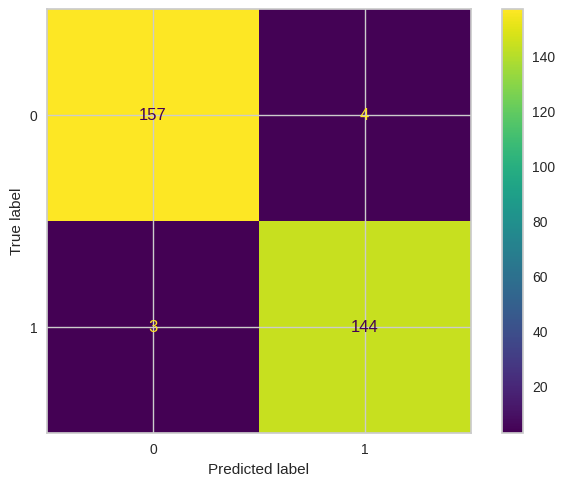

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
#compute and print the confusion matrix
cm =cm = confusion_matrix(y_test, y_pred)
print(cm)

from sklearn.metrics import ConfusionMatrixDisplay
cn = data['target'].unique()

#create a confusion matrix display object
disp = ConfusionMatrixDisplay.from_estimator(clf , X_test , y_test , display_labels=cn)

print('0(Not HeartDisease) 1(HeartDisease)')

The confusion matrix represents the performance measurement of the classification model. In this case, we have a 2x2 confusion matrix where each row represents the actual classification, and each column represents the predicted classification. From the results, it appears:



*   Top-Left (TN) = 157Correctly predicted as "Not HeartDisease" when the actual label was "Not HeartDisease."
*   Top-Right (FN) = 4Incorrectly predicted as "HeartDisease" when the actual label was "Not HeartDisease."
*   Bottom-Left (FP) = 3Incorrectly predicted as "Not HeartDisease" when the actual label was "HeartDisease."
*   Bottom-Right (TP) = 144Correctly predicted as "HeartDisease" when the actual label was "HeartDisease."


Insight: The model Correctly identified 157 cases of Not HeartDisease and 144 cases of HeartDisease.Incorrectly classified 4 cases of Not HeartDisease as HeartDisease.Incorrectly classified 3 cases of HeartDisease as Not HeartDisease.

# **Decision Tree:**

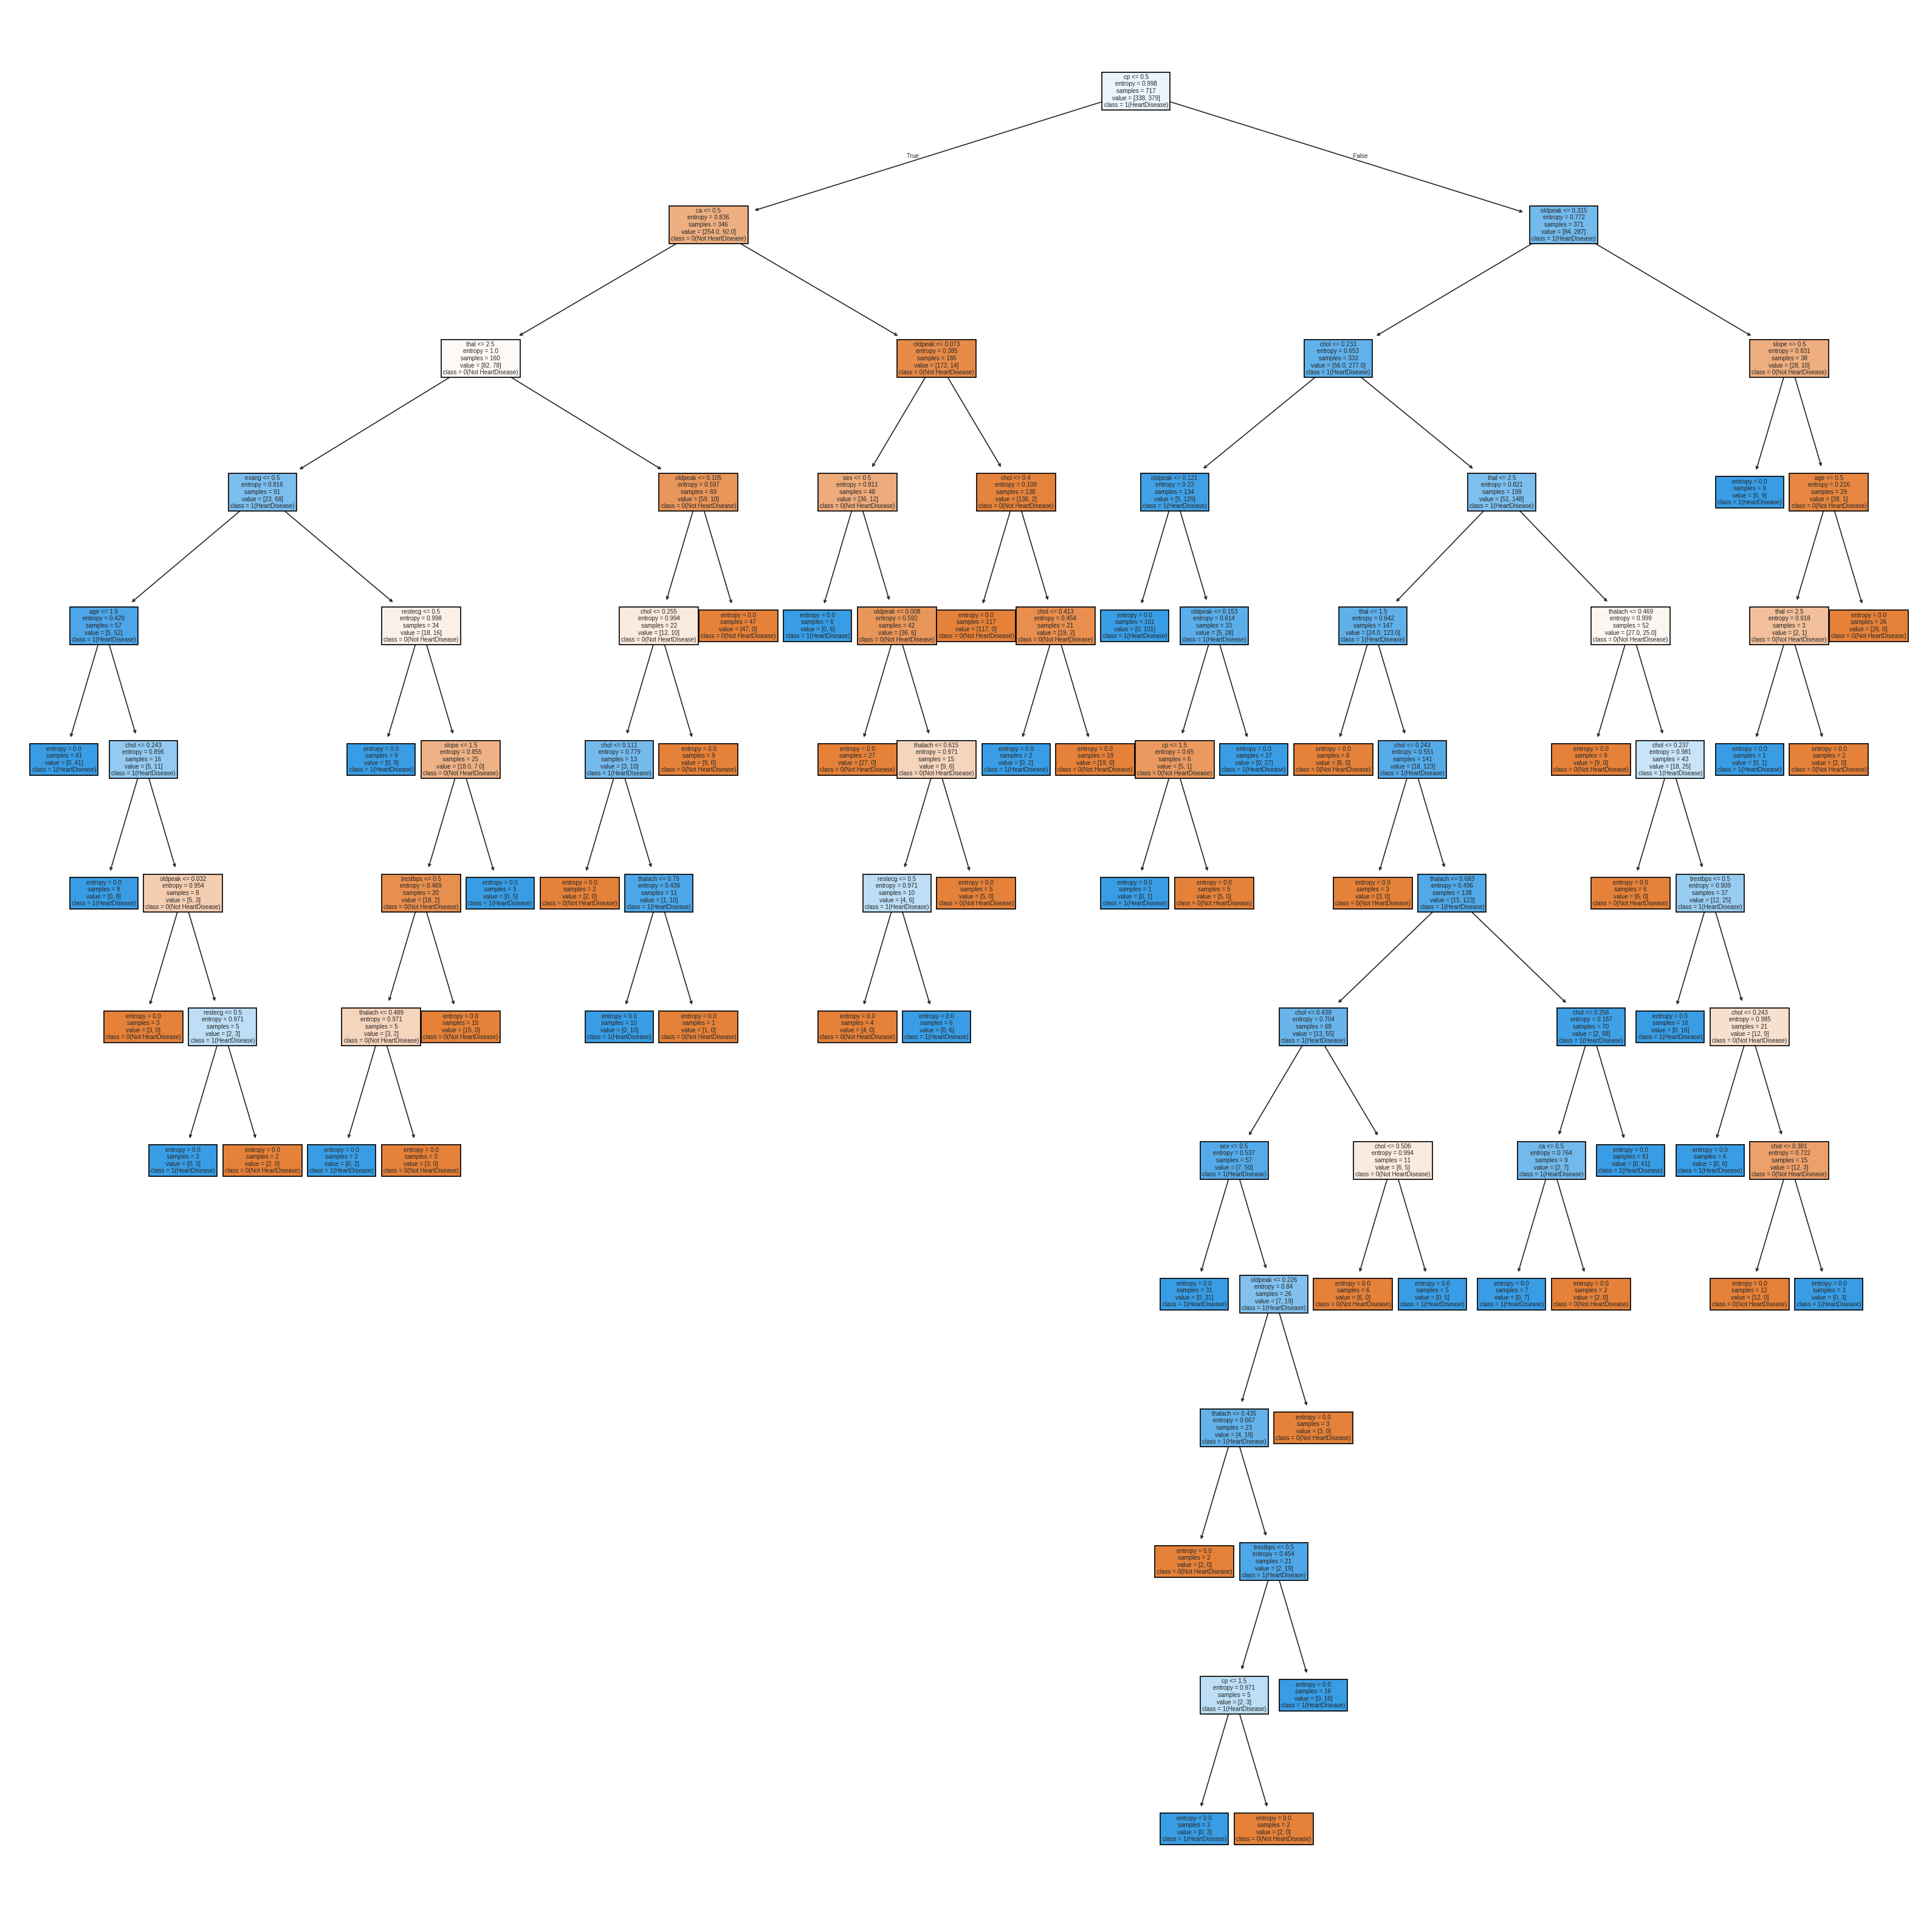

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 10), dpi=400)


class_labels = {0: '0(Not HeartDisease)' , 1:'1(HeartDisease)'}

tree.plot_tree(clf,
               feature_names=fn,
               class_names=[class_labels[0], class_labels[1]],
               filled=True
               )

plt.show()

**Decision Tree Analysis**

This decision tree displays a hierarchical classification process where nodes split based on selected attributes to optimize prediction accuracy. Each node represents a decision point that utilizes a feature from the dataset, chosen based on its ability to enhance separation between classes by reducing uncertainty (impurity).



*   **Initial Split:**
The root node at the top represents the feature with the highest discriminative power. This feature is selected to best divide the dataset, maximizing information gain or minimizing impurity. The root feature in this model plays a significant role in predicting whether a patient has heart disease or not.

*   **Intermediate Nodes:**
As we move down the tree, additional splits occur on various features, further partitioning the data into smaller subsets, leading to more refined classifications. Each split is determined by a threshold that optimizes the classification process. The features used at these levels likely include key medical indicators such as cholesterol levels, blood pressure, or age, which are crucial for heart disease diagnosis.
*   **Branching Pathways:**
Each pathway from a parent node to a child node represents a decision based on the feature at that node, effectively creating a path that defines a unique set of conditions. These pathways help in narrowing down the classification, ensuring that each sample follows a logical route based on its feature values.

*   **Leaf Nodes:**
At the end of each branch, a leaf node provides a final classification based on the conditions met along the path. These terminal nodes represent the final prediction: either "Heart Disease" or "Not Heart Disease." Each pathway to a leaf node corresponds to a unique combination of feature values, guiding the prediction based on the model's learned patterns.


This tree structure helps visualize how different medical factors contribute to predicting heart disease, offering an interpretable way to understand the model’s decision-making process.


# **Completing in model evaluation and selection:**

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute and print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("confusion matrix : \n",cm)

# Compute Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Error Rate is simply 1 minus the Accuracy
error_rate = 1 - accuracy
print("Error Rate:", error_rate)

# Sensitivity (Recall) and Specificity  require TN, FP, FN, TP :

TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# Sensitivity (Recall )
sensitivity = TP / (TP + FN)
print("Sensitivity:", sensitivity)

# Specificity
specificity = TN / (TN + FP)
print("Specificity:", specificity)

# Precision
precision = TP / (TP + FP)
print("Precision:", precision)

confusion matrix : 
 [[157   4]
 [  3 144]]
Accuracy: 0.9772727272727273
Error Rate: 0.022727272727272707
Sensitivity: 0.9795918367346939
Specificity: 0.9751552795031055
Precision: 0.972972972972973


# **Performance Metrics**



*   Accuracy: This metric measures the proportion of correct predictions among all predictions. Here, the model's accuracy is approximately 97.73%, meaning it correctly classifies about 97.73% of instances.

*   Error Rate: This represents the proportion of incorrect predictions out of all predictions. The error rate for this model is around 2.27%.

*   Sensitivity (Recall): This indicates the proportion of actual positive cases (heart disease) that the model correctly identifies. In this case, the sensitivity is approximately 97.96%.

*   Specificity: This measures the proportion of actual negative cases (no heart disease) that the model correctly identifies, which is around 97.52%.

*   Precision: This reflects the proportion of positive predictions that are actually correct. Here, the precision is about 97.30%.













# **Outcomes:**



*   The model's **accuracy of 97.73%** demonstrates a high level of correct predictions overall.


*  **The sensitivity (97.96%)** indicates that the model has an excellent ability to identify cases of heart disease.

*   **Specificity, at 97.52%,** reflects the model’s competence in correctly classifying negative cases (no heart disease).

*   **Precision at 97.30%** highlights the accuracy of positive predictions, suggesting that most positive predictions made by the model are correct.



**Splitting Data into 60% Training and 40% Test:**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

clf2 = DecisionTreeClassifier(criterion='entropy')

clf2 = clf2.fit(X_train, y_train)

y_pred = clf2.predict(X_test)

**Confusion matrix:**

[[205   8]
 [  6 191]]
0(Not HeartDisease) 1(HeartDisease)


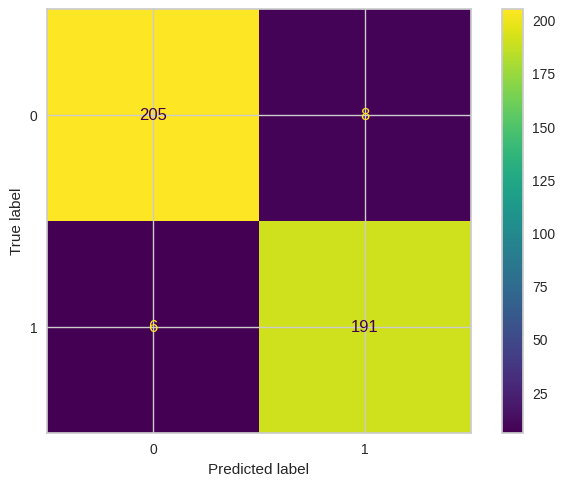

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
#compute and print the confusion matrix
cm2 = confusion_matrix(y_test, y_pred)
print(cm2)

from sklearn.metrics import ConfusionMatrixDisplay
cn2 = data['target'].unique()

#create a confusion matrix display object
disp = ConfusionMatrixDisplay.from_estimator(clf2 , X_test , y_test , display_labels=cn2)

print('0(Not HeartDisease) 1(HeartDisease)')

The confusion matrix represents the performance measurement of the classification model. In this case, we have a 2x2 confusion matrix where each row represents the actual classification, and each column represents the predicted classification. From the results, it appears:

* **Top-Left (TN)** = 205 Correctly predicted as "Not HeartDisease" when the actual label was "Not HeartDisease."

* **Top-Right (FP)** = 8 Incorrectly predicted as "HeartDisease" when the actual label was "Not HeartDisease."

* **Bottom-Left (FN)** = 6 Incorrectly predicted as "Not HeartDisease" when the actual label was "HeartDisease."

* **Bottom-Right (TP)** = 191 Correctly predicted as "HeartDisease" when the actual label was "HeartDisease."

Insight: The model

* Correctly identified 191 cases of HeartDisease and 205 cases of Not HeartDisease.
* Incorrectly classified 6 cases of HeartDisease as Not HeartDisease.
* Incorrectly classified 8 cases of Not HeartDisease as HeartDisease.

**Dessicion Tree:**

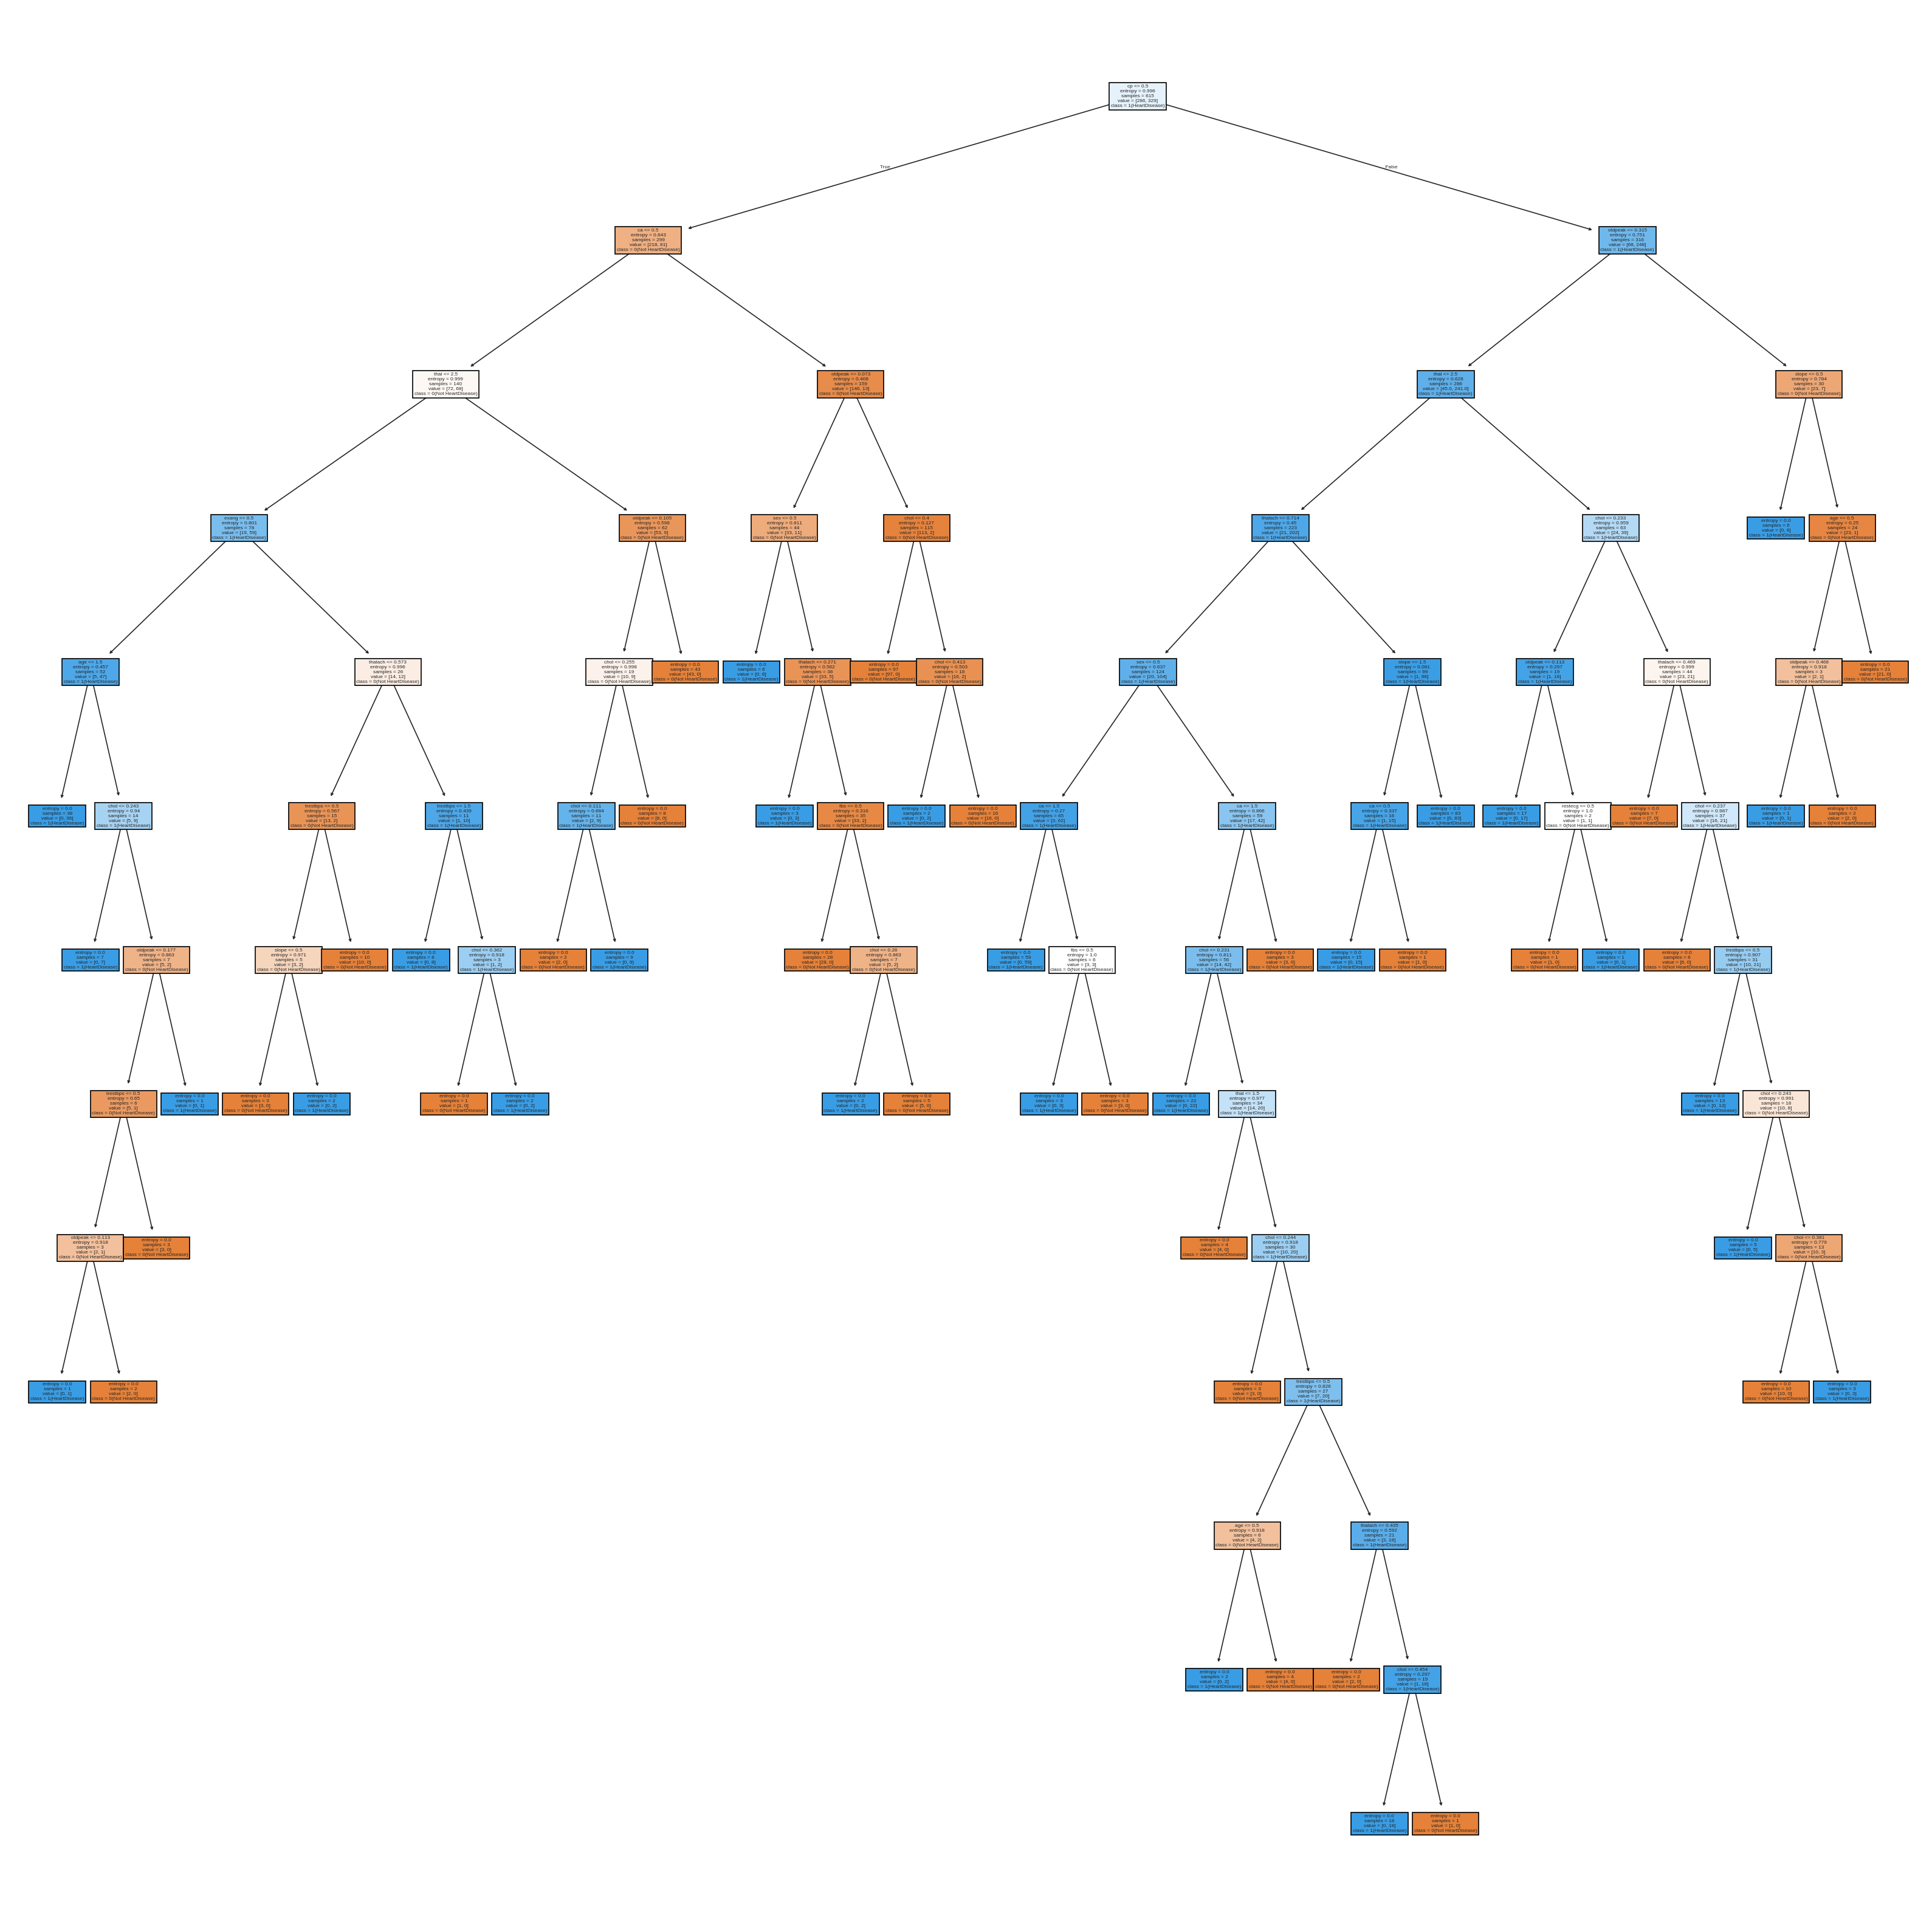

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 10), dpi=400)


class_labels = {0: '0(Not HeartDisease)' , 1:'1(HeartDisease)'}

tree.plot_tree(clf2,
               feature_names=fn,
               class_names=[class_labels[0], class_labels[1]],
               filled=True
               )

plt.show()

This decision tree displays a hierarchical classification process where nodes split based on selected attributes to optimize prediction accuracy. Each node represents a decision point that utilizes a feature from the dataset, chosen based on its ability to enhance separation between classes by reducing uncertainty (impurity).

-initial Split: The root node at the top represents the feature with the highest discriminative power. This feature is selected to best divide the dataset, maximizing information gain or minimizing impurity. The root feature might be one with significant predictive relevance for the classification goal.

-Intermediate Nodes: Moving down the tree, additional splits occur on other features that further partition the data into subsets, leading to more refined classifications. Each of these splits is determined based on thresholds or values that optimize predictive accuracy. Features such as age, cholesterol, or other pertinent factors could be represented here.

Branching Pathways: Each pathway from a parent node to a child node represents a decision based on the feature at that node, effectively creating a path that defines a unique set of conditions. Each branch represents a specific decision based on the feature and threshold split at each node, narrowing down the classification as we proceed.

Leaf Nodes: At the end of each branch, a leaf node provides a final prediction or classification based on the pathway conditions. These leaf nodes represent terminal points where the samples are classified into distinct categories (e.g., "Heart Disease" or "No Heart Disease"). Each pathway to a leaf node represents a unique combination of feature values, guiding the prediction for a specific class based on the model's learned patterns.

**model evaluation and selection:**

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute and print the confusion matrix
cm2 = confusion_matrix(y_test, y_pred)
print("confusion matrix : \n",cm2)

# Compute Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Error Rate is simply 1 minus the Accuracy
error_rate = 1 - accuracy
print("Error Rate:", error_rate)

# Sensitivity (Recall) and Specificity  require TN, FP, FN, TP :

TP = cm2[1, 1]
TN = cm2[0, 0]
FP = cm2[0, 1]
FN = cm2[1, 0]

# Sensitivity (Recall )
sensitivity = TP / (TP + FN)
print("Sensitivity:", sensitivity)

# Specificity
specificity = TN / (TN + FP)
print("Specificity:", specificity)

# Precision
precision = TP / (TP + FP)
print("Precision:", precision)

confusion matrix : 
 [[205   8]
 [  6 191]]
Accuracy: 0.9658536585365853
Error Rate: 0.034146341463414664
Sensitivity: 0.9695431472081218
Specificity: 0.9624413145539906
Precision: 0.9597989949748744


### **Performance Metrics**

- **Accuracy**: This metric measures the proportion of correct predictions among all predictions. Here, the model's accuracy is approximately **96.85%**, meaning it correctly classifies about **95.85%** of instances.
  
- **Error Rate**: This represents the proportion of incorrect predictions out of all predictions. The error rate for this model is around **3.414%**.

- **Sensitivity (Recall)**: This indicates the proportion of actual positive cases (heart disease) that the model correctly identifies. In this case, the sensitivity is approximately **96.95%**.

- **Specificity**: This measures the proportion of actual negative cases (no heart disease) that the model correctly identifies, which is around **96.24%**.

- **Precision**: This reflects the proportion of positive predictions that are actually correct. Here, the precision is about **95.97%**.



### **Outcomes**

- The model's **accuracy of 95.85%%** demonstrates a high level of correct predictions overall.
- The **sensitivity (96.95%)** indicates that the model has a strong ability to identify cases of heart disease.
- **Specificity, at 96.24%**, reflects the model’s competence in correctly classifying negative cases (no heart disease).
- **Precision at 95.97%%** highlights the accuracy of positive predictions, suggesting that most positive predictions made by the model are correct.

**Splitting Data into 80% Training and 20% Test:**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

clf3 = DecisionTreeClassifier(criterion='entropy')

clf3 = clf3.fit(X_train, y_train)

y_pred = clf3.predict(X_test)

Confusion matrix:

[[109   0]
 [  0  96]]
0(Not HeartDisease) 1(HeartDisease)


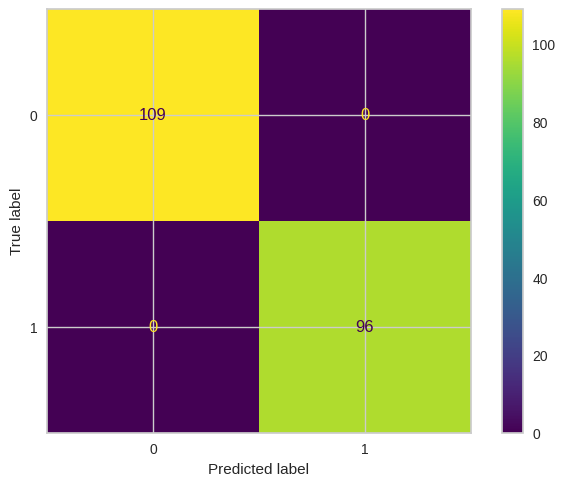

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
#compute and print the confusion matrix
cm3 = confusion_matrix(y_test, y_pred)
print(cm3)

from sklearn.metrics import ConfusionMatrixDisplay
cn3 = data['target'].unique()

#create a confusion matrix display object
disp = ConfusionMatrixDisplay.from_estimator(clf3 , X_test , y_test , display_labels=cn3)

print('0(Not HeartDisease) 1(HeartDisease)')

**Top-Left (TP)** = 109: Correctly predicted as "Not HeartDisease" when the actual label was "Not HeartDisease."

**Top-Right (FN)** = 0: Incorrectly predicted as "HeartDisease" when the actual label was "Not HeartDisease."

**Bottom-Left (FP**) = 0: Incorrectly predicted as "Not HeartDisease" when the actual label was "HeartDisease."

**Bottom-Right (TN)** = 96: Correctly predicted as "HeartDisease" when the actual label was "HeartDisease."

Insight:
The model:
* Correctly identified 109 cases of "Not HeartDisease" and 96 cases of "HeartDisease."
* Made no mistakes, achieving a perfect classification with no false positives or false negatives.


Dessicion Tree:

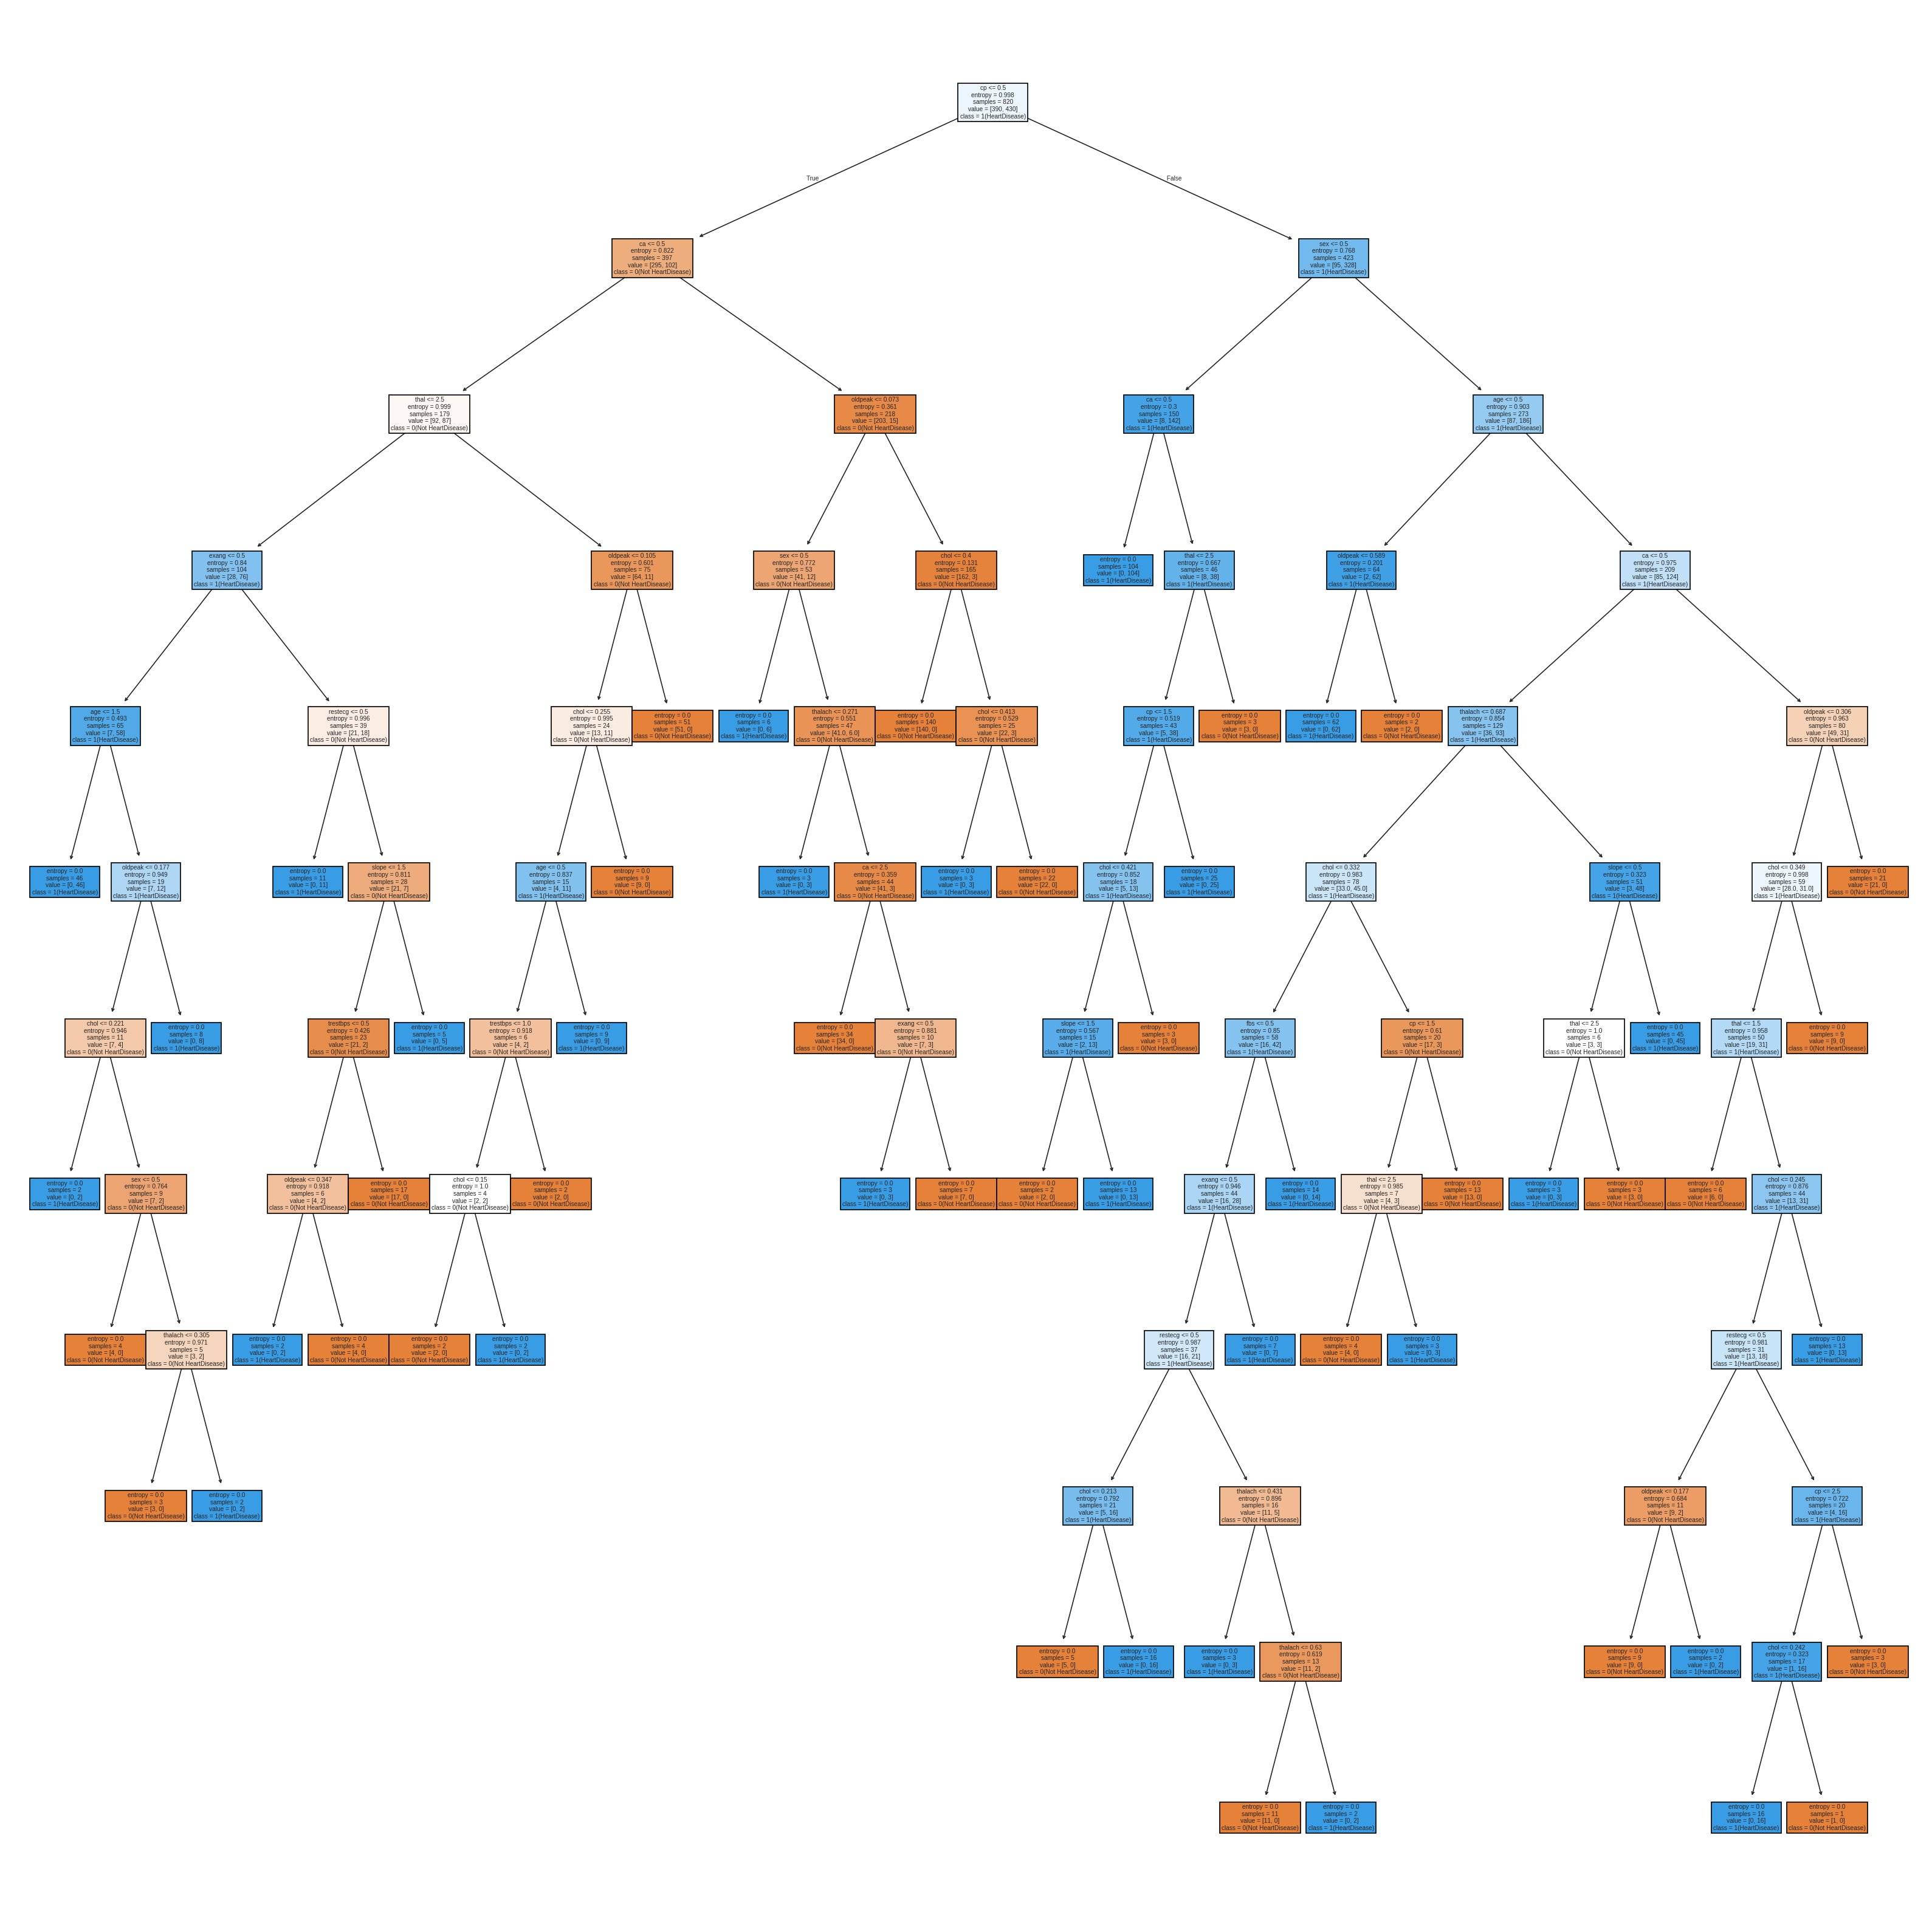

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 10), dpi=400)


class_labels = {0: '0(Not HeartDisease)' , 1:'1(HeartDisease)'}

tree.plot_tree(clf3,
               feature_names=fn,
               class_names=[class_labels[0], class_labels[1]],
               filled=True
               )

plt.show()

The decision tree visualizes a classification model to predict heart disease using various features.

**Initial Split:** The first node represents the feature most important for dividing the data, chosen to maximize information gain, often tied to key heart disease risk factors like age or cholesterol.

**Subsequent Nodes:**Further branches represent splits on additional features like resting heart rate and oldpeak, refining classification with each threshold to distinguish between heart disease and non-heart disease cases.

**Leaf Nodes:** The tree’s leaf nodes give final predictions—“Heart Disease” or “Not Heart Disease”—based on unique paths through specific feature combinations encountered along the way.

model evaluation and selection:

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Compute and print the confusion matrix
cm3 = confusion_matrix(y_test, y_pred)
print("confusion matrix : \n",cm3)

# Compute Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# Error Rate is simply 1 minus the Accuracy
error_rate = 1 - accuracy
print("Error Rate:", error_rate)

# Sensitivity (Recall) and Specificity  require TN, FP, FN, TP :

TP = cm3[1, 1]
TN = cm3[0, 0]
FP = cm3[0, 1]
FN = cm3[1, 0]


# Sensitivity (Recall )
sensitivity = TP / (TP + FN)
print("Sensitivity:", sensitivity)


# Specificity
specificity = TN / (TN + FP)
print("Specificity:", specificity)

# Precision
precision = TP / (TP + FP)
print("Precision:", precision)

confusion matrix : 
 [[109   0]
 [  0  96]]
Accuracy: 1.0
Error Rate: 0.0
Sensitivity: 1.0
Specificity: 1.0
Precision: 1.0


**Metrics Explanation:**
* Accuracy: This metric measures the proportion of correct predictions. The model achieved an accuracy of 100%, meaning it correctly classified all instances.
* Error Rate: The proportion of incorrect predictions. Since the model made no mistakes, the error rate is 0%.
* Sensitivity (Recall): This represents the proportion of actual positive cases (HeartDisease) that the model correctly identified. The model's sensitivity is 100%, meaning it correctly detected all positive cases.
* Specificity: This measures the proportion of actual negative cases (Not HeartDisease) that the model correctly classified. The model achieved 100% specificity, meaning no negative cases were misclassified.
* Precision: This reflects the proportion of positive predictions that were actually correct. The model's precision is 100%, indicating that every predicted positive case was truly positive.

**Outcomes:**
* The model’s 100% accuracy confirms flawless performance in classifying both heart disease and non-heart disease cases.
* Sensitivity and specificity of 100% indicate that the model never missed a case of heart disease and never falsely identified a healthy person as having heart disease.
* Perfect precision ensures that all positive predictions were indeed correct.


# **Gini Index:**

### Splitting Data into: 20% Training and 80% Test:

[[285 114]
 [ 51 370]]


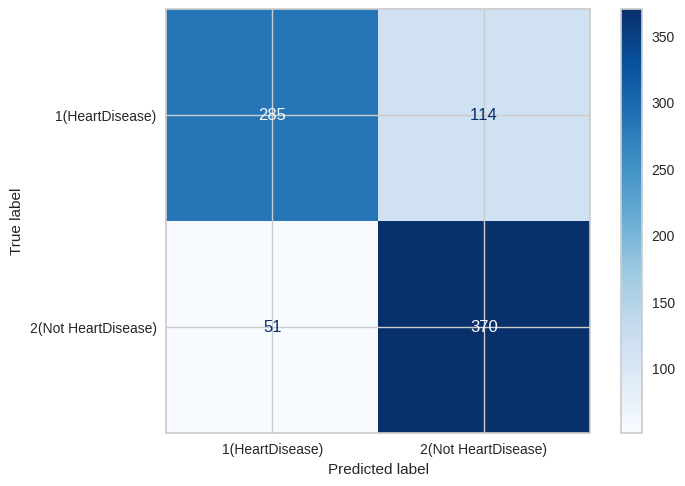

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.8, random_state=1, stratify=y)

clf4 = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=1)


clf4 = clf4. fit (X_train, y_train)

y_pred = clf4.predict (X_test)


# Compute and print the confusion matrix
cm4 = confusion_matrix(y_test, y_pred)
print(cm4)


# Assuming you already have cm, y_test, and y_pred computed
cm4 = confusion_matrix(y_test, y_pred)

class_labels = {1: '1(HeartDisease)', 2: '2(Not HeartDisease)'}
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm4, display_labels=[class_labels[1], class_labels[2]])
disp.plot(cmap=plt.cm.Blues)
plt.show()

## **result:**



* True Positives (285 cases): The model correctly identified 285 patients as having heart disease.

* True Negatives (370 cases): The model correctly predicted 370 individuals as not having heart disease.

* False Positives (51 cases): 51 people were incorrectly classified as having heart disease when they did not.

* False Negatives (114 cases): 114 patients were misclassified as not having heart disease when they actually do


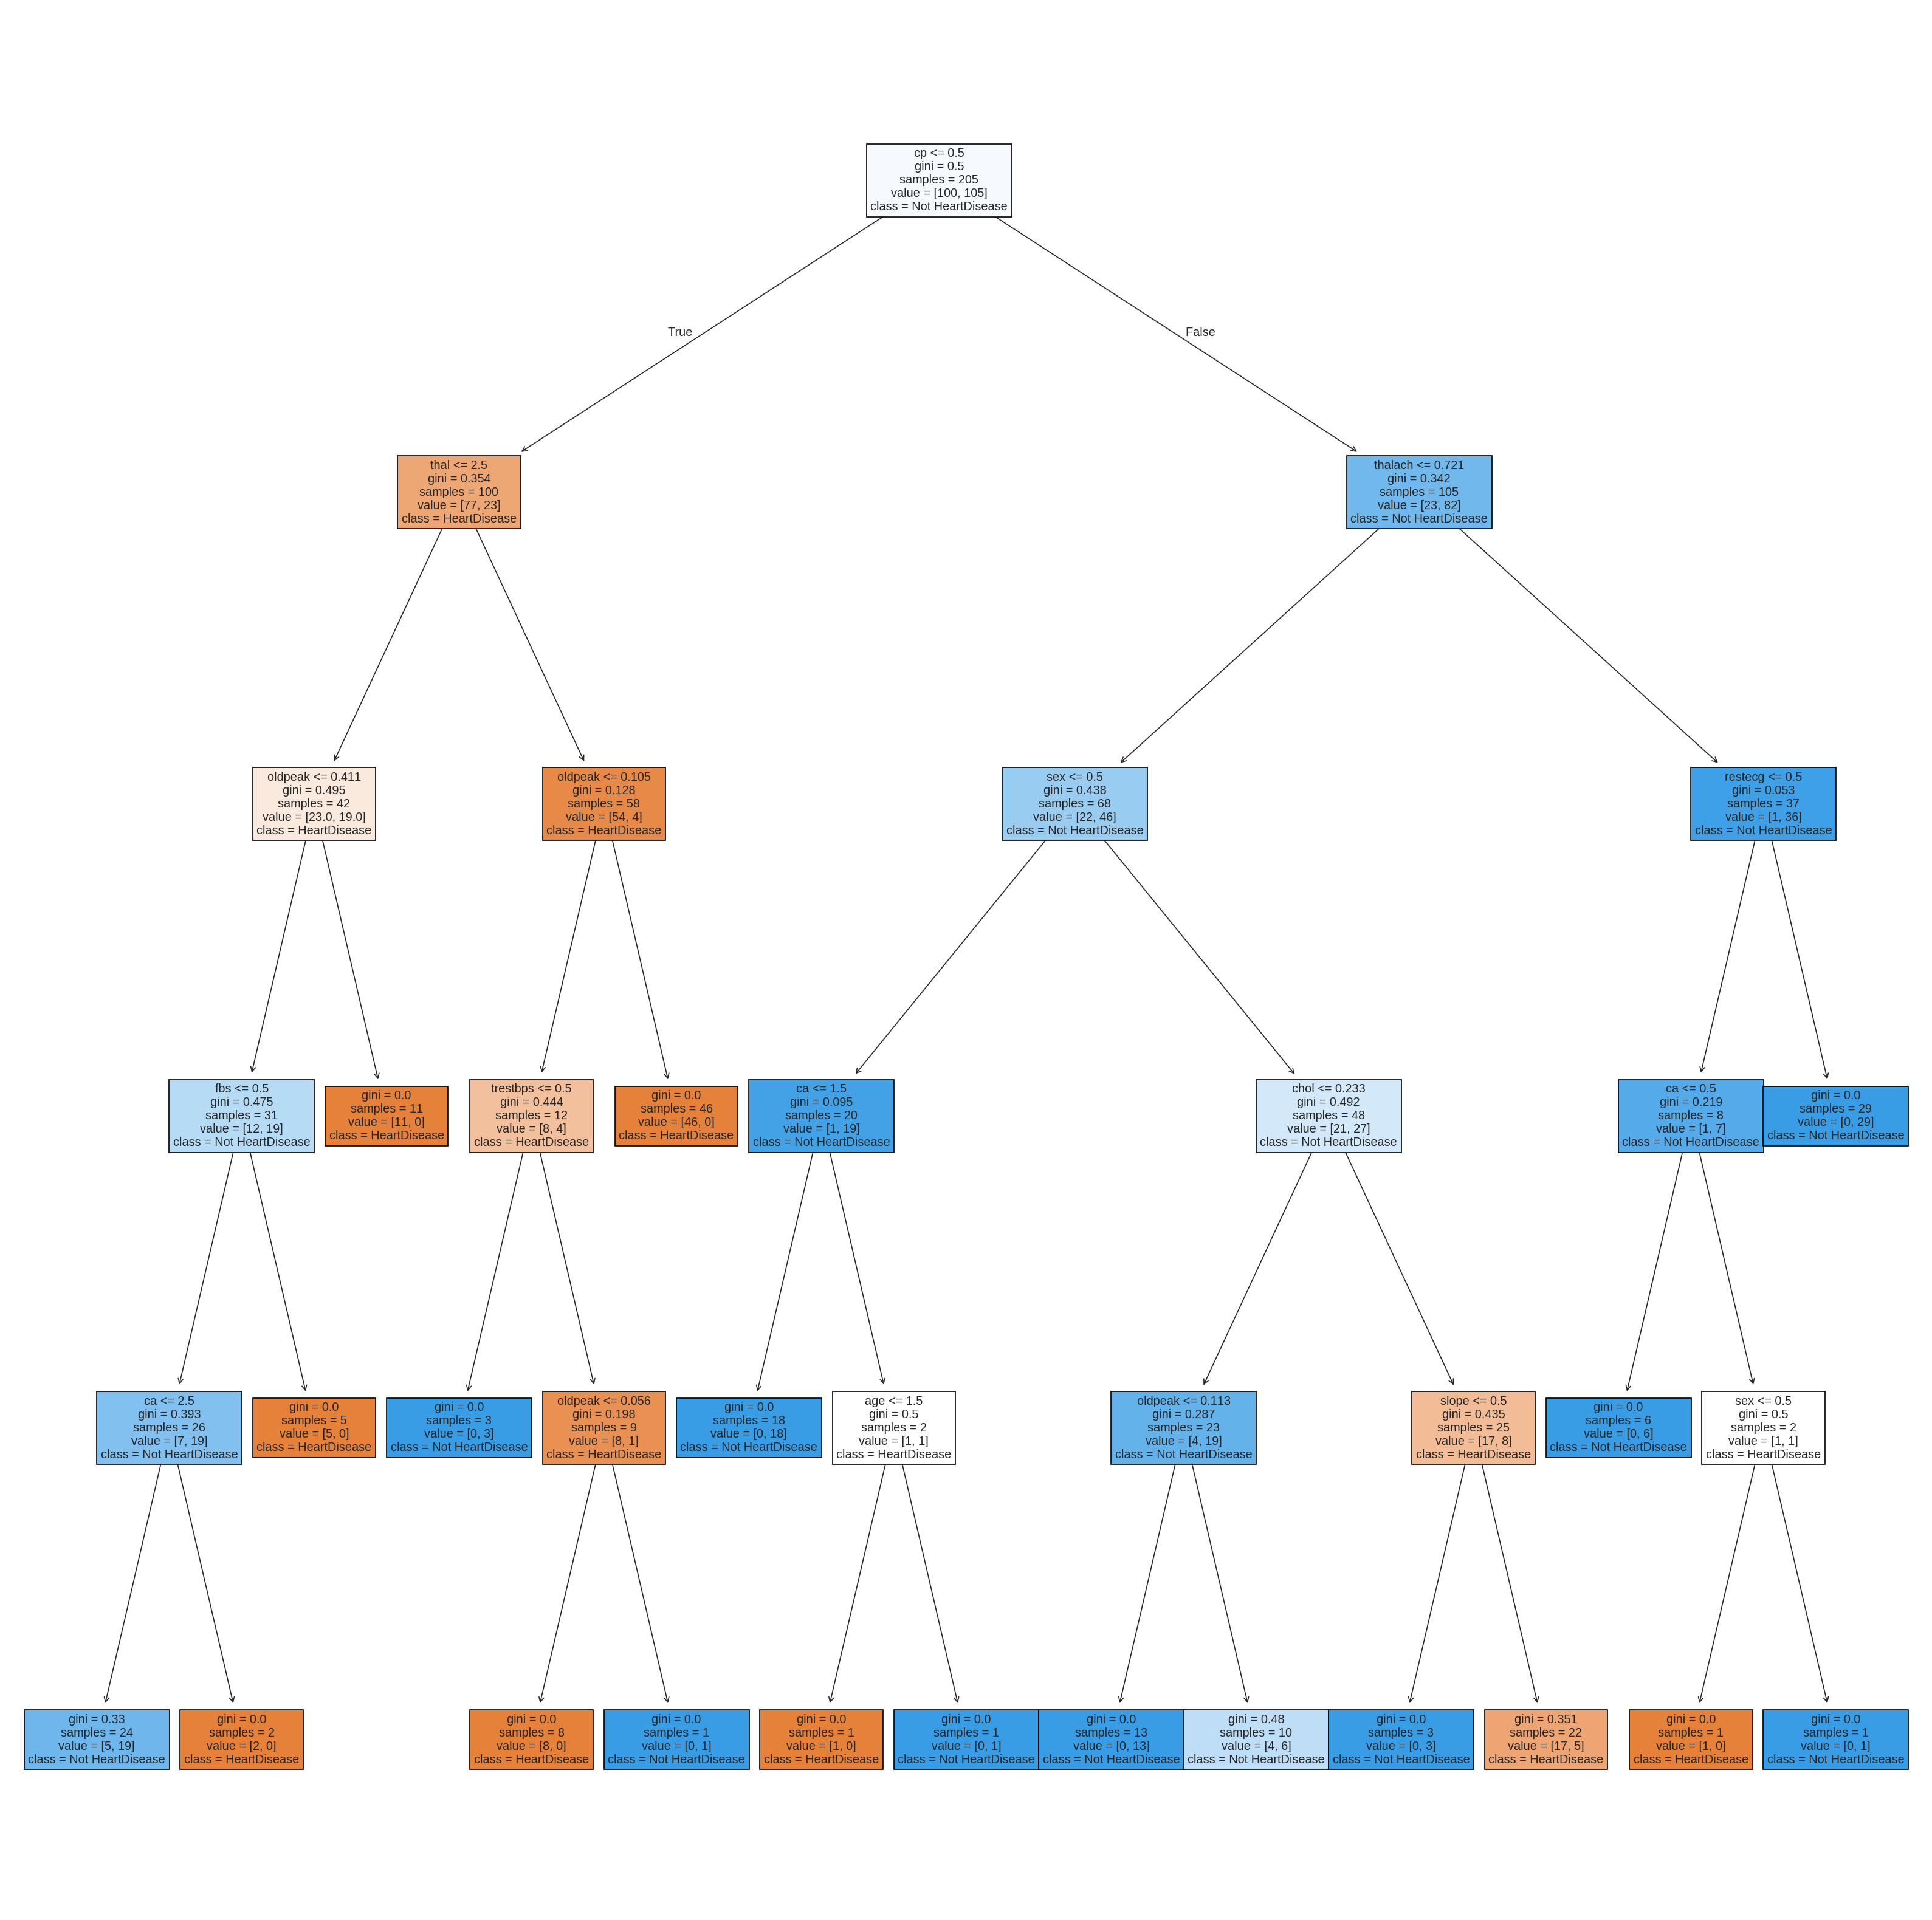

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree

# Ensure feature names are defined
fn = X.columns.tolist()

# Correct class labels
class_labels = {1: 'HeartDisease', 2: 'Not HeartDisease'}

# Create the plot
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 10), dpi=400)
tree.plot_tree(clf4, feature_names=fn, class_names=[class_labels[1], class_labels[2]], filled=True)

plt.show()

## **Interpretation of Decision Tree Results**
The decision tree illustrates a classification process aimed at predicting heart disease based on various input features. The structure of the tree follows a sequence of splits that optimize information gain, helping to differentiate between individuals with and without heart disease.

## root Splits
The root node represents the most influential feature in determining heart disease risk. This feature is chosen based on its ability to reduce impurity in the dataset, often corresponding to critical health indicators such as cholesterol levels, age, or blood pressure.

## Subsequent Nodes
As we move deeper into the tree, additional splits occur based on other relevant attributes. Features such as heart rate, blood sugar levels, and exercise-induced angina contribute to further refining the classification process. Each branching decision introduces a new condition that segments the dataset into more homogenous groups.

# Leaf Nodes
At the leaf nodes, final classification decisions are made, predicting whether an individual has heart disease ("Heart Disease") or not ("Not Heart Disease"). These endpoints represent distinct paths that patients may follow, with each branch reflecting a combination of medical conditions that contribute to the final classification.



In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Compute and print the confusion matrix
cm3 = confusion_matrix(y_test, y_pred)
print("confusion matrix : \n",cm3)

# Compute Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# Error Rate is simply 1 minus the Accuracy
error_rate = 1 - accuracy
print("Error Rate:", error_rate)

# Sensitivity (Recall) and Specificity  require TN, FP, FN, TP :

TP = cm3[1, 1]
TN = cm3[0, 0]
FP = cm3[0, 1]
FN = cm3[1, 0]


# Sensitivity (Recall )
sensitivity = TP / (TP + FN)
print("Sensitivity:", sensitivity)


# Specificity
specificity = TN / (TN + FP)
print("Specificity:", specificity)

# Precision
precision = TP / (TP + FP)
print("Precision:", precision)

confusion matrix : 
 [[285 114]
 [ 51 370]]
Accuracy: 0.7987804878048781
Error Rate: 0.2012195121951219
Sensitivity: 0.8788598574821853
Specificity: 0.7142857142857143
Precision: 0.7644628099173554


## **Interpretation of Results**
.

*   **Accuracy (79.87%)**:The model correctly classifies heart disease and non-heart disease cases 79.87% of the time


*   **Error Rate (20.12%):**20.12% of the predictions are incorrect



*   **Sensitivity (87.88%):**The model correctly identifies 87.88% of heart disease cases.
Concern: 15.35% of actual heart disease cases were missed (False Negatives).

*   **Specificity (71.42%):**The model correctly classifies 71.42% of non-heart disease cases.
Concern: 18.86% of healthy individuals were falsely diagnosed with heart disease (False Positives).



*   **Precision (76.44%)**:When the model predicts heart disease, there is an 76.44%chance that the prediction is correct



---



1.   The model’s accuracy of 79.87% suggests a strong overall performance in
2.   predicting heart disease.
With a sensitivity of 87.88%, the model is highly capable of identifying

3.   patients with heart disease.
A specificity of 71.42% indicates that most non-heart disease cases are  correctly classified.
4.   The precision of 76.44% highlights that the model’s positive predictions are mostly accurate, reducing false alarms.













.



### Splitting Data into: 50% Training and 50% Test:





[[212  38]
 [ 11 252]]


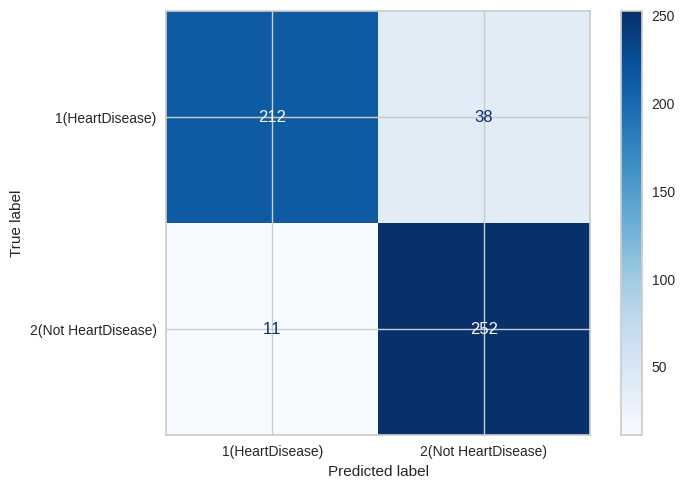

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1,stratify=y)

clf4 = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=1)


clf4 = clf4. fit (X_train, y_train)

y_pred = clf4.predict (X_test)


# Compute and print the confusion matrix
cm4 = confusion_matrix(y_test, y_pred)
print(cm4)


# Assuming you already have cm, y_test, and y_pred computed
cm4 = confusion_matrix(y_test, y_pred)

class_labels = {1: '1(HeartDisease)', 2: '2(Not HeartDisease)'}
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm4, display_labels=[class_labels[1], class_labels[2]])
disp.plot(cmap=plt.cm.Blues)
plt.show()

* True Positives (212 cases): The model correctly identified 212 patients as having heart disease.

* True Negatives (252 cases): The model correctly predicted 252 individuals as not having heart disease.

* False Positives (11 cases): 11 people were incorrectly classified as having heart disease when they did not.

* False Negatives (38 cases): 38 patients were misclassified as not having heart disease when they actually do

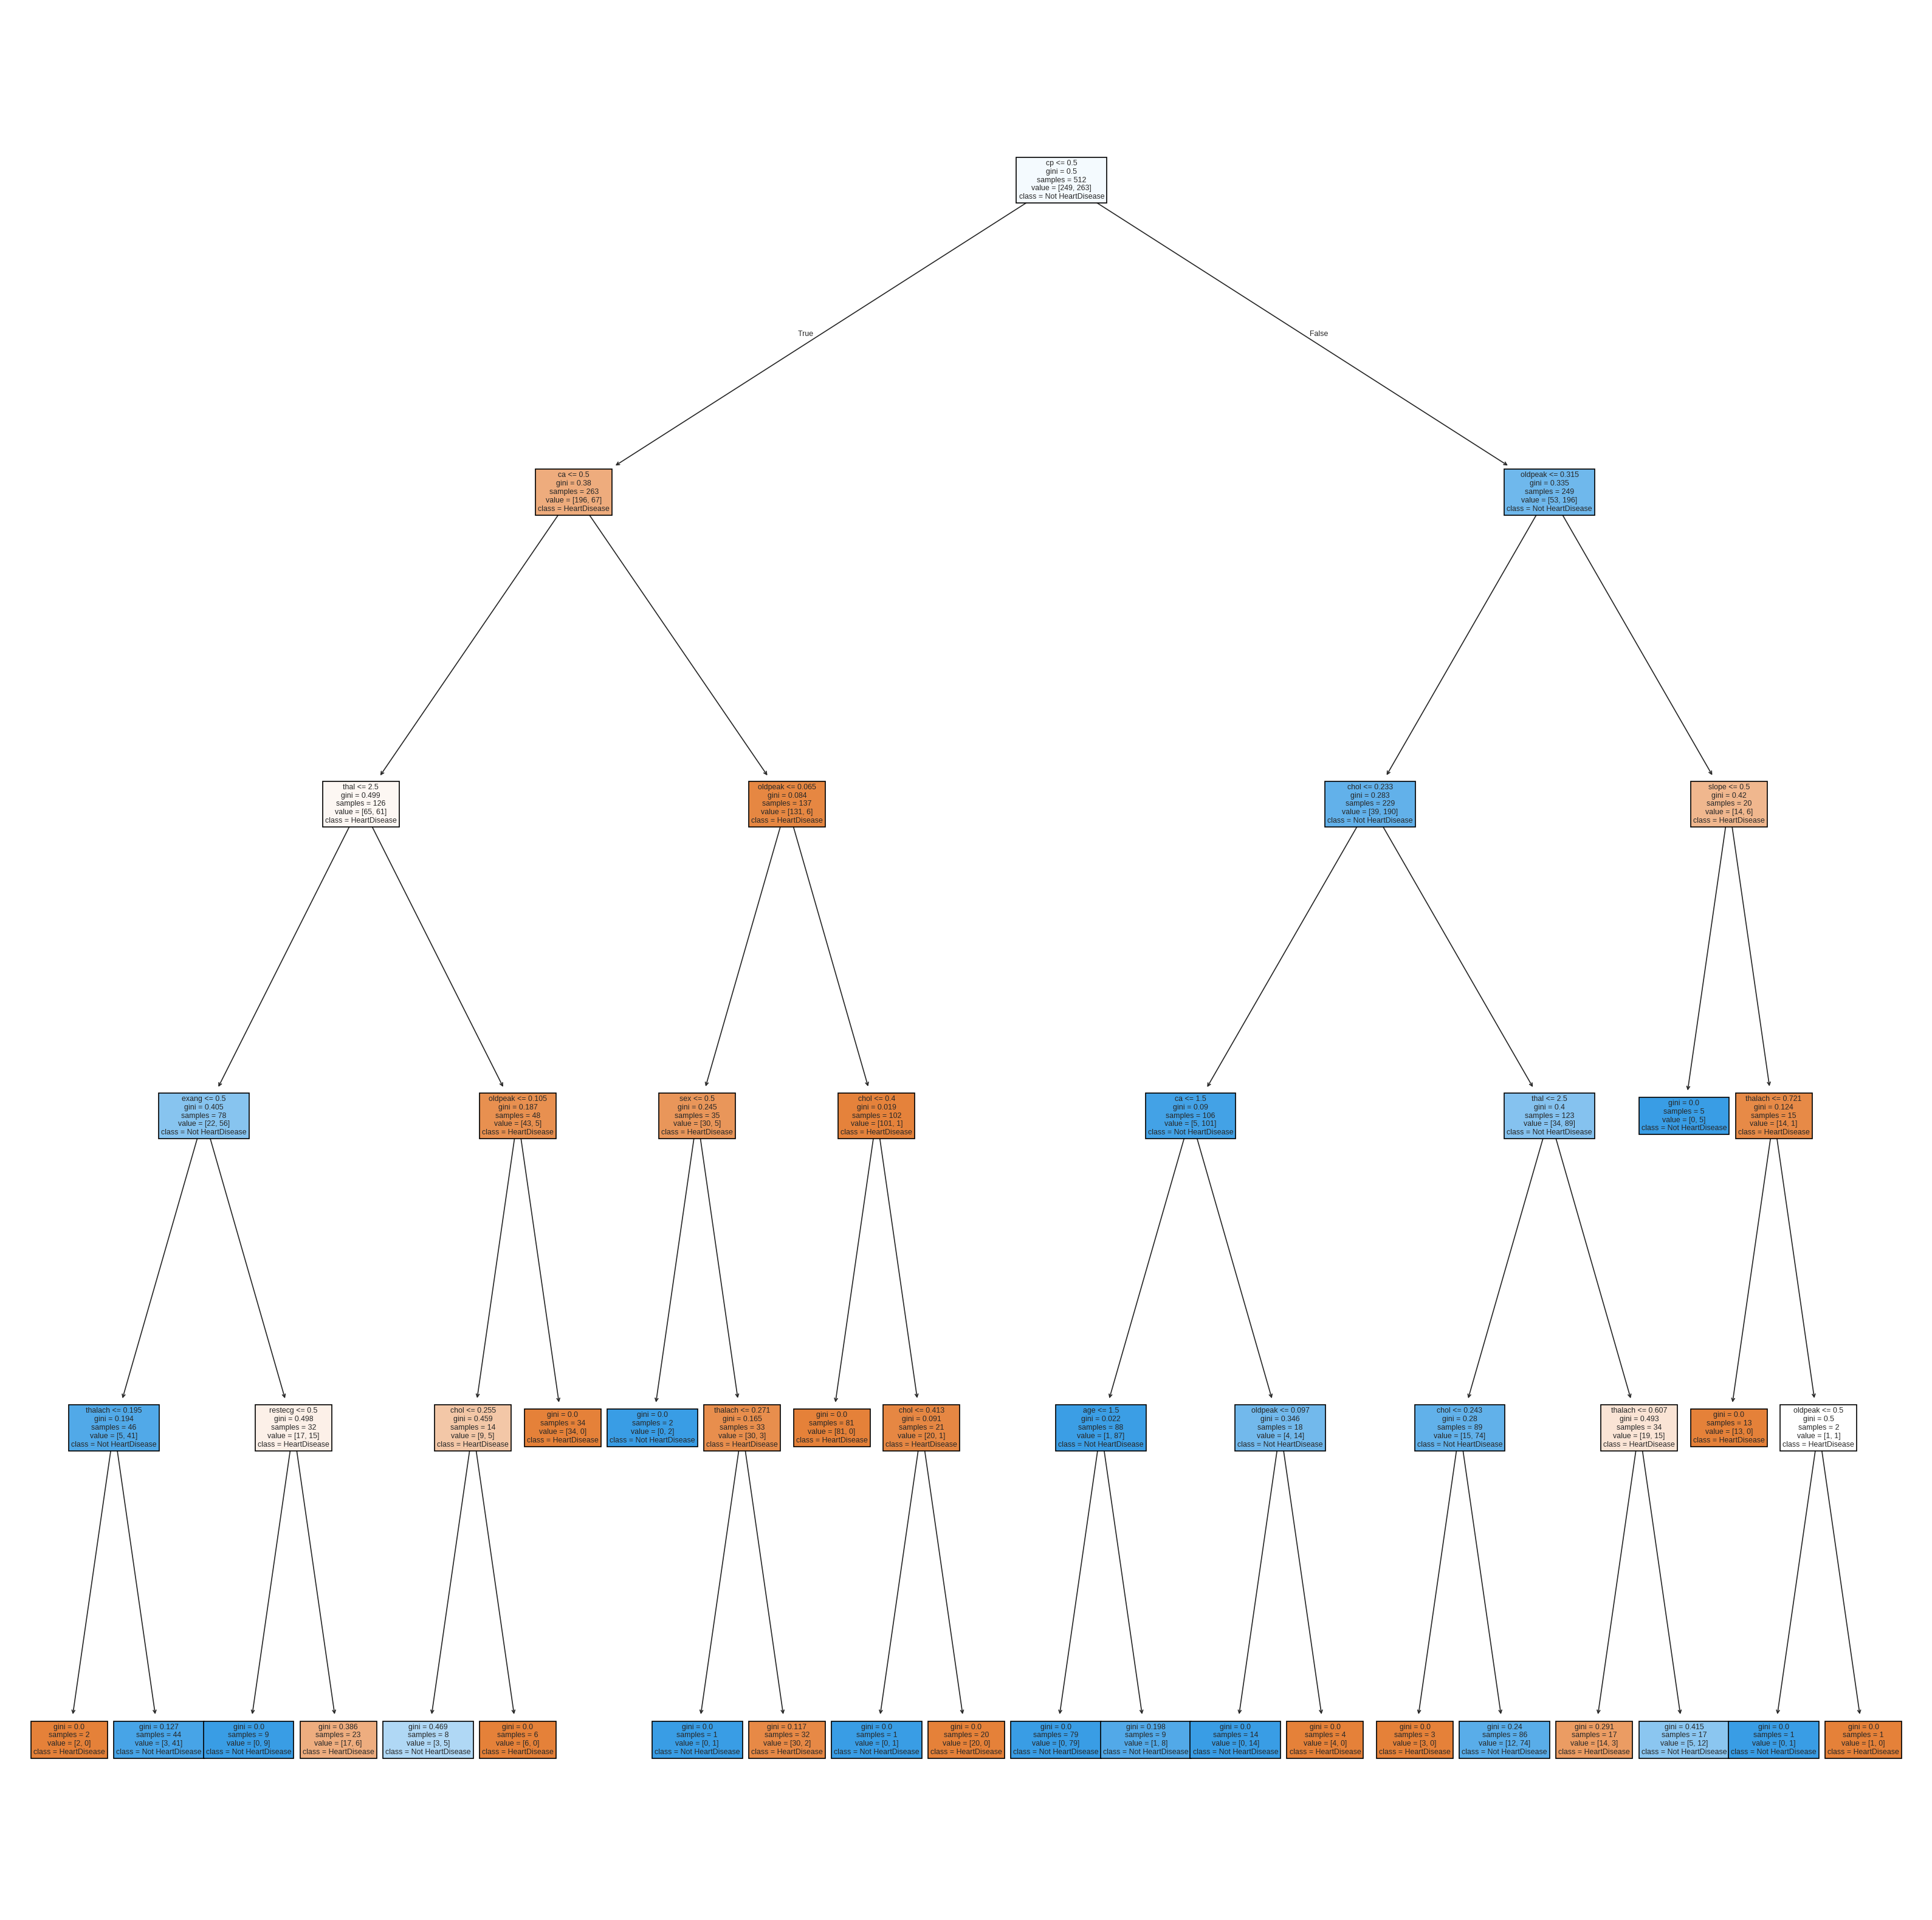

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree

# Ensure feature names are defined
fn = X.columns.tolist()

# Correct class labels
class_labels = {1: 'HeartDisease', 2: 'Not HeartDisease'}

# Create the plot
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 10), dpi=400)
tree.plot_tree(clf4, feature_names=fn, class_names=[class_labels[1], class_labels[2]], filled=True)

plt.show()

### **Decision Tree Results**
The decision tree illustrates a classification process aimed at predicting heart disease based on various input features. The structure of the tree follows a sequence of splits that optimize information gain, helping to differentiate between individuals with and without heart disease.

## root Splits
The root node represents the most influential feature in determining heart disease risk. This feature is chosen based on its ability to reduce impurity in the dataset, often corresponding to critical health indicators such as cholesterol levels, age, or blood pressure.

## Subsequent Nodes
As we move deeper into the tree, additional splits occur based on other relevant attributes. Features such as heart rate, blood sugar levels, and exercise-induced angina contribute to further refining the classification process. Each branching decision introduces a new condition that segments the dataset into more homogenous groups.

## Leaf Nodes
At the leaf nodes, final classification decisions are made, predicting whether an individual has heart disease ("Heart Disease") or not ("Not Heart Disease"). These endpoints represent distinct paths that patients may follow, with each branch reflecting a combination of medical conditions that contribute to the final classification.

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Compute and print the confusion matrix
cm3 = confusion_matrix(y_test, y_pred)
print("confusion matrix : \n",cm3)

# Compute Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# Error Rate is simply 1 minus the Accuracy
error_rate = 1 - accuracy
print("Error Rate:", error_rate)

# Sensitivity (Recall) and Specificity  require TN, FP, FN, TP :

TP = cm3[1, 1]
TN = cm3[0, 0]
FP = cm3[0, 1]
FN = cm3[1, 0]


# Sensitivity (Recall )
sensitivity = TP / (TP + FN)
print("Sensitivity:", sensitivity)


# Specificity
specificity = TN / (TN + FP)
print("Specificity:", specificity)

# Precision
precision = TP / (TP + FP)
print("Precision:", precision)

confusion matrix : 
 [[212  38]
 [ 11 252]]
Accuracy: 0.9044834307992202
Error Rate: 0.09551656920077978
Sensitivity: 0.9581749049429658
Specificity: 0.848
Precision: 0.8689655172413793


* Accuracy: This metric measures the proportion of correct predictions out of all predictions made. Here, the model's accuracy is approximately 90.44%, meaning it correctly classifies about 90% of instances.

* Error Rate: This represents the proportion of incorrect predictions relative to all predictions. The error rate for this model is around 9.55%, indicating that only a small percentage of predictions are incorrect.

* Sensitivity (Recall): This indicates the proportion of actual positive cases (heart disease) that the model correctly identifies. In this case, the sensitivity is approximately 95.81%, meaning the model successfully detects most heart disease cases.

* Specificity: This metric measures the proportion of actual negative cases (no heart disease) that the model correctly classifies. Here, the specificity is 84.8%, showing that the model is effective at recognizing non-heart disease cases.

* Precision: This reflects the proportion of positive predictions that are actually correct. In this model, precision is about 86.89%, meaning that most of the cases identified as heart disease are indeed correct.






---



1. The model’s accuracy of 90.44% suggests a high overall performance in predicting heart disease.

2. With a sensitivity of95.81%, the model is highly capable of identifying patients with heart disease.
3. A specificity of 84.8 indicates that most non-heart disease cases are correctly classified.
4. The precision of 86.89% highlights that the model’s positive predictions are mostly accurate, reducing false alarms.

### Splitting Data into: 70% Training and 30% Test:

[[132  29]
 [  9 138]]


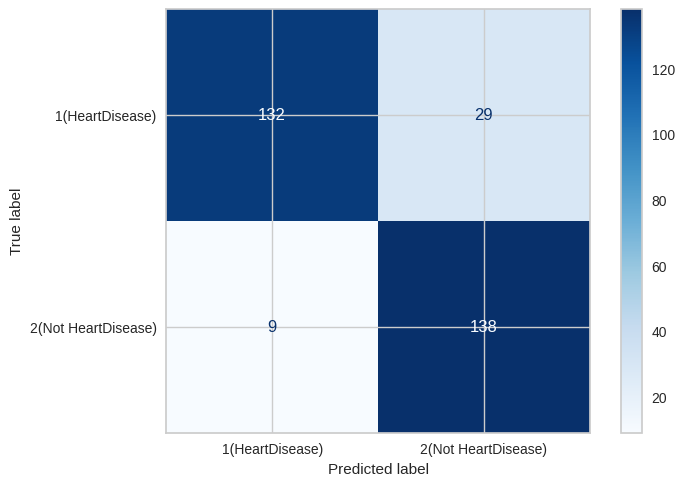

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

clf4 = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=1)

clf4 = clf4. fit (X_train, y_train)

y_pred = clf4.predict (X_test)


# Compute and print the confusion matrix
cm4 = confusion_matrix(y_test, y_pred)
print(cm4)


# Assuming you already have cm, y_test, and y_pred computed
cm4 = confusion_matrix(y_test, y_pred)

class_labels = {1: '1(HeartDisease)', 2: '2(Not HeartDisease)'}
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm4, display_labels=[class_labels[1], class_labels[2]])
disp.plot(cmap=plt.cm.Blues)
plt.show()

## **result:**



* True Positives (132 cases): The model correctly identified 132 patients as having heart disease.

* True Negatives (138 cases): The model correctly predicted 138 individuals as not having heart disease.

* False Positives (9 cases): 9 people were incorrectly classified as having heart disease when they did not.

* False Negatives (29 cases): 29 patients were misclassified as not having heart disease when they actually do

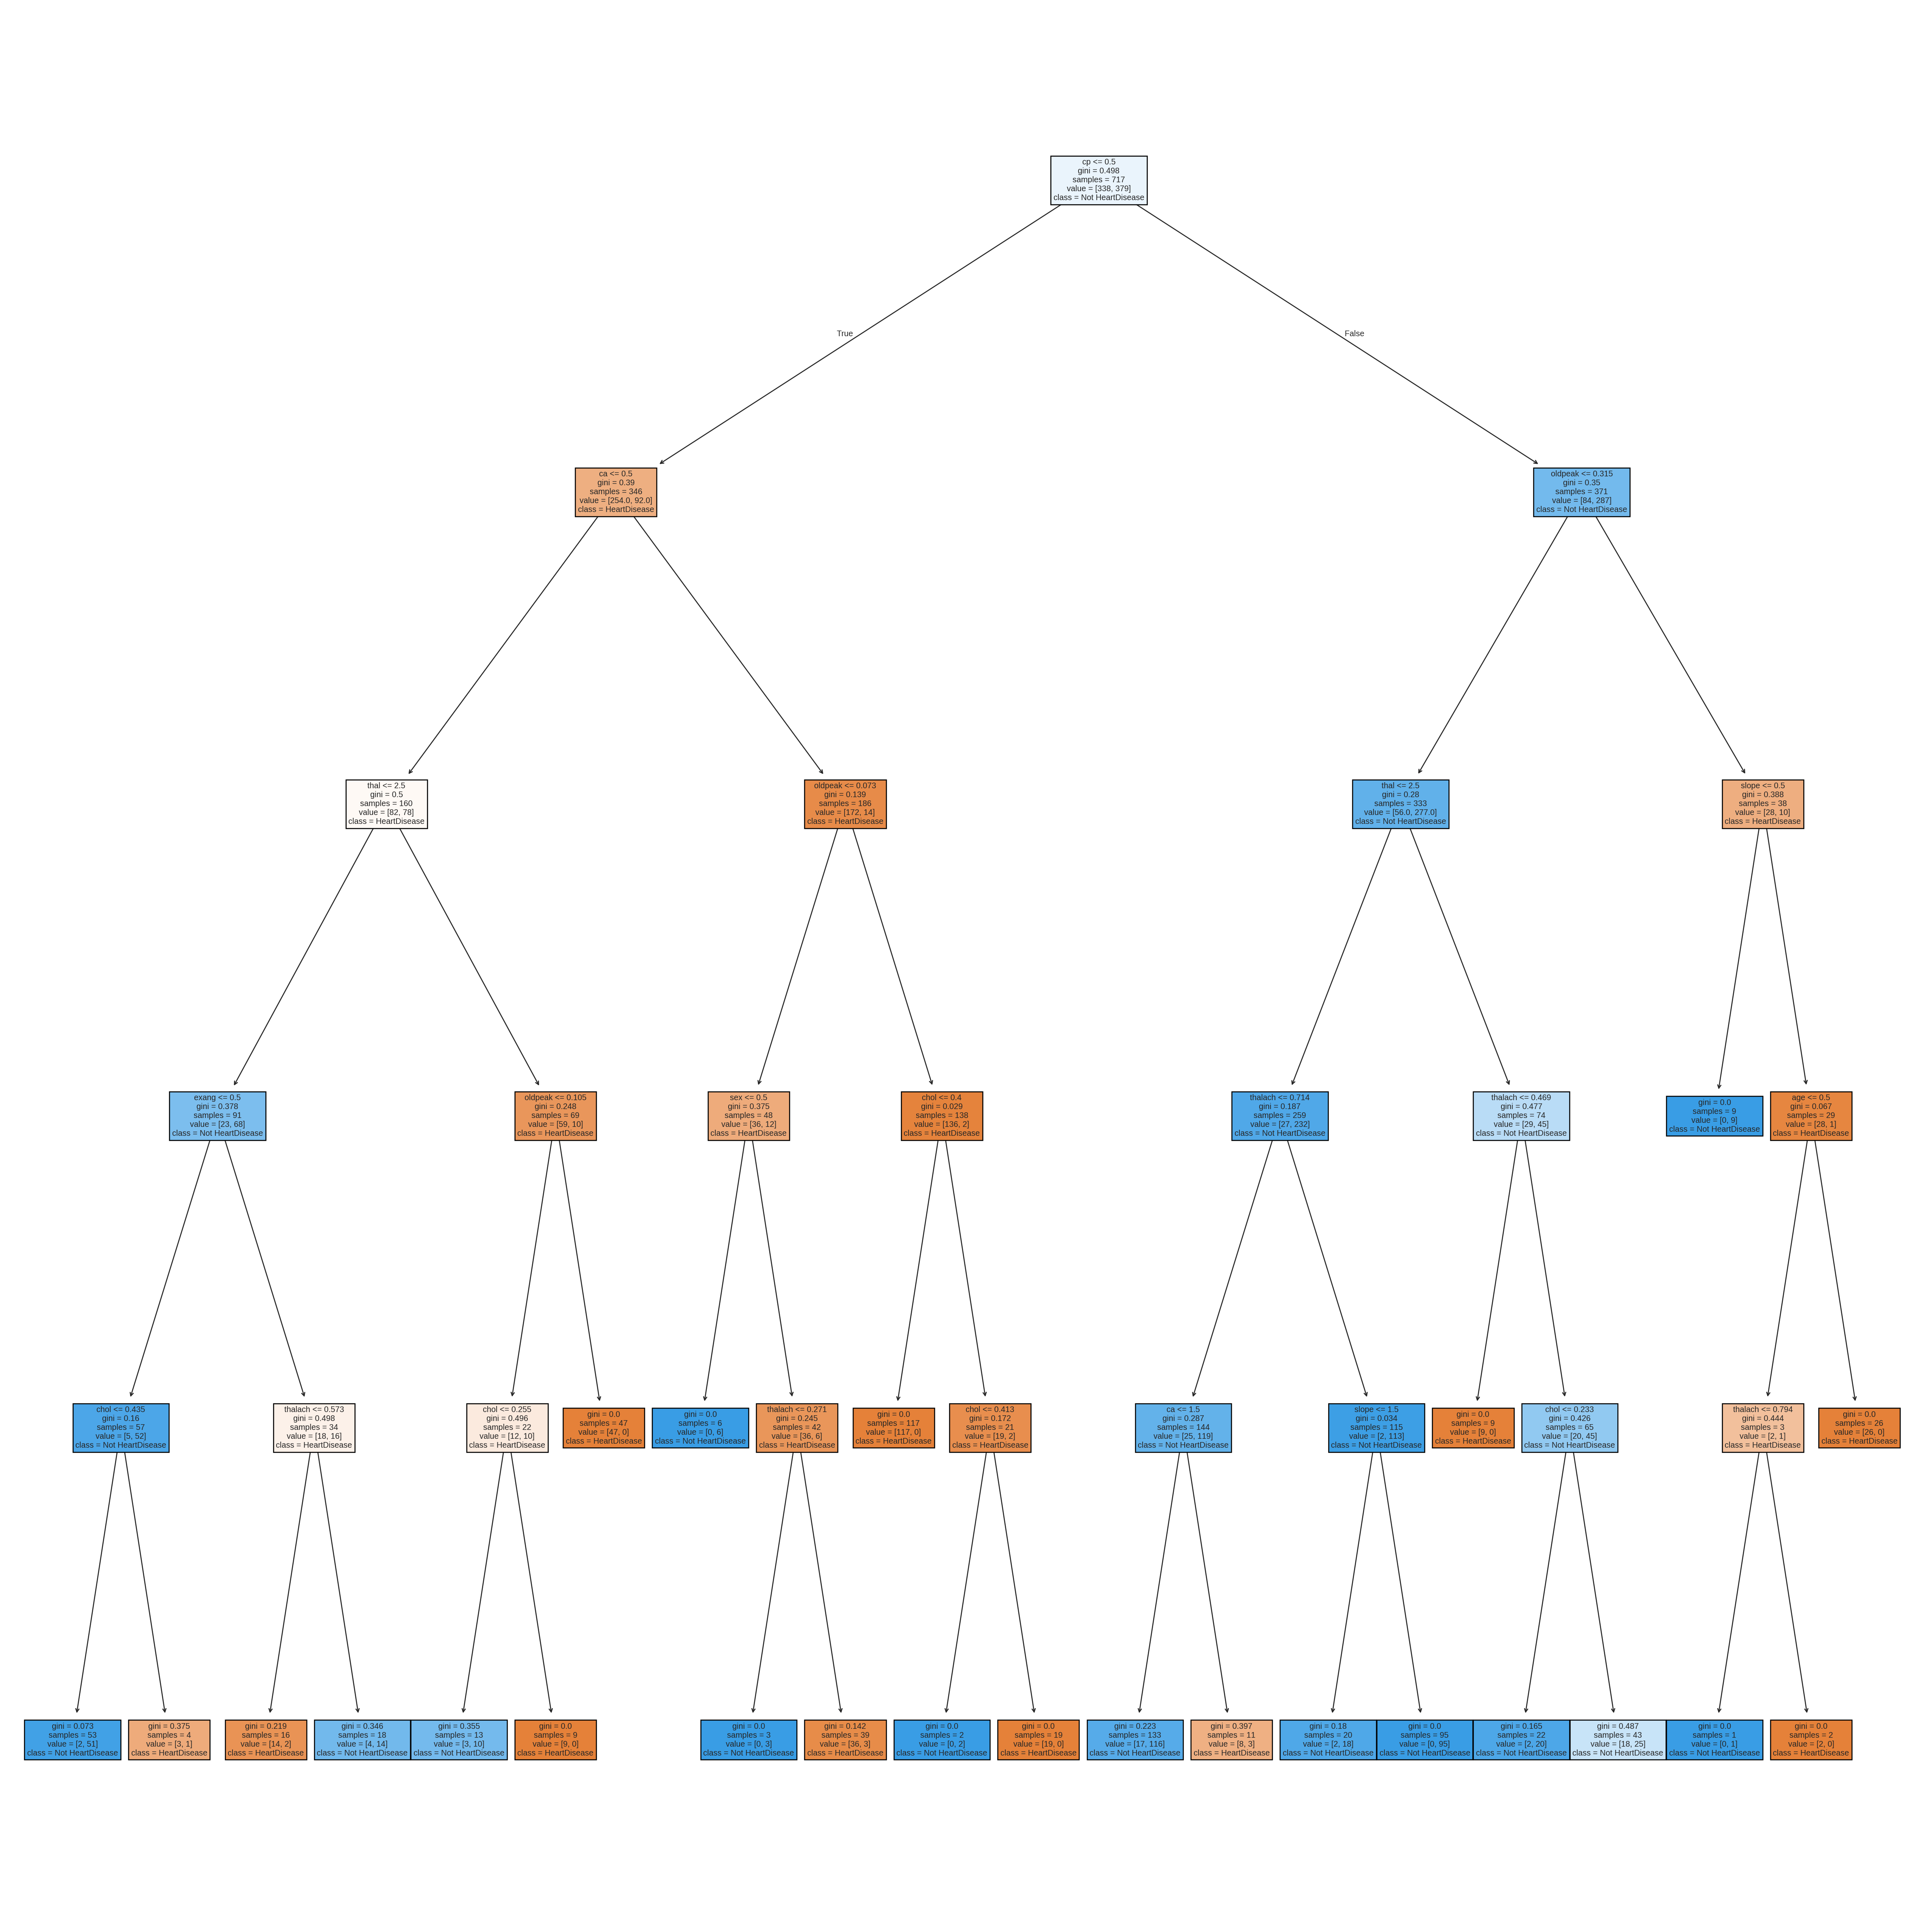

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree

# Ensure feature names are defined
fn = X.columns.tolist()

# Correct class labels
class_labels = {1: 'HeartDisease', 2: 'Not HeartDisease'}

# Create the plot
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 10), dpi=600)
tree.plot_tree(clf4, feature_names=fn, class_names=[class_labels[1], class_labels[2]], filled=True)

plt.show()

# **Decision Tree Results**
The decision tree represents a classification model designed to predict heart disease based on various health-related attributes. It follows a structured approach to dividing the data, ensuring optimal separation between individuals with and without heart disease.

## Initial Splits
The root node represents the most significant feature in distinguishing heart disease cases. This feature is selected based on its ability to maximize information gain, often linked to critical health factors such as cholesterol levels, blood pressure, or age.

## Subsequent Nodes
As the tree branches out, additional decision nodes refine the classification process. Each split is determined by an attribute that further differentiates individuals, considering factors such as heart rate, blood sugar levels, and exercise-induced angina. These features guide the model in narrowing down the classification.

## Leaf Nodes
At the terminal nodes, the tree makes final predictions, categorizing individuals as either having heart disease ("Heart Disease") or not ("Not Heart Disease"). Each path leading to a leaf node represents a distinct combination of medical attributes, ensuring the classification is based on meaningful patterns within the data.

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Compute and print the confusion matrix
cm3 = confusion_matrix(y_test, y_pred)
print("confusion matrix : \n",cm3)

# Compute Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# Error Rate is simply 1 minus the Accuracy
error_rate = 1 - accuracy
print("Error Rate:", error_rate)

# Sensitivity (Recall) and Specificity  require TN, FP, FN, TP :

TP = cm3[1, 1]
TN = cm3[0, 0]
FP = cm3[0, 1]
FN = cm3[1, 0]


# Sensitivity (Recall )
sensitivity = TP / (TP + FN)
print("Sensitivity:", sensitivity)


# Specificity
specificity = TN / (TN + FP)
print("Specificity:", specificity)

# Precision
precision = TP / (TP + FP)
print("Precision:", precision)

confusion matrix : 
 [[132  29]
 [  9 138]]
Accuracy: 0.8766233766233766
Error Rate: 0.12337662337662336
Sensitivity: 0.9387755102040817
Specificity: 0.8198757763975155
Precision: 0.8263473053892215


* **Accuracy:**


This metric measures the proportion of correct predictions out of all predictions made.
Here, the model's accuracy is approximately 87.66%, meaning it correctly classifies about 88% of instances.

* **Error Rate:**


This represents the proportion of incorrect predictions relative to all predictions.
The error rate for this model is around 12.34%, indicating that a small portion of predictions are incorrect.

* **Sensitivity (Recall):**


This indicates the proportion of actual positive cases (heart disease) that the model correctly identifies.
In this case, the sensitivity is approximately 93.88%, meaning the model successfully detects most heart disease cases.

* **Specificity:**


This metric measures the proportion of actual negative cases (no heart disease) that the model correctly classifies.
Here, the specificity is about 81.99%, showing that the model is reasonably effective at recognizing non-heart disease cases.

* **Precision:**


This reflects the proportion of positive predictions that are actually correct.
In this model, precision is about 82.63%, meaning that most of the cases identified as heart disease are indeed correct.



---


* The model’s accuracy of 87.66% indicates solid overall performance in
predicting heart disease.

* A sensitivity of 93.88% shows that the model is highly effective in identifying patients who have heart disease.

* With a specificity of 81.99%, the model also does a decent job distinguishing those without the condition.

* A precision of 82.63% suggests that the model’s positive predictions are reliable, minimizing false positives.




# **5.2) Clustering**

Clustering is an unsupervised learning task that does not rely on labeled data, so we removed the "target" class label from the dataset, as it was unnecessary for the clustering analysis. Since our dataset was already preprocessed, there was no need for encoding categorical attributes or applying feature scaling, as all data was already in a suitable numeric format for clustering.





#**K-means Clustering**


**K-means clustering** is an unsupervised machine learning algorithm that divides a dataset into **\( K \)** distinct clusters by grouping similar data points together. The algorithm assigns each point to the nearest cluster centroid and continuously refines these centroids through iterative updates, aiming to minimize the total squared distances between data points and their respective cluster centers.

## **The choice of three different K-means clustering sizes.**

#**Silhouette method**


The Silhouette method evaluates the quality of clustering by measuring how well each data point fits within its assigned cluster compared to other clusters. The Silhouette score ranges from -1 to 1, where higher values indicate more well-defined and distinct clusters. This technique is useful for determining the optimal number of clusters in unsupervised learning.

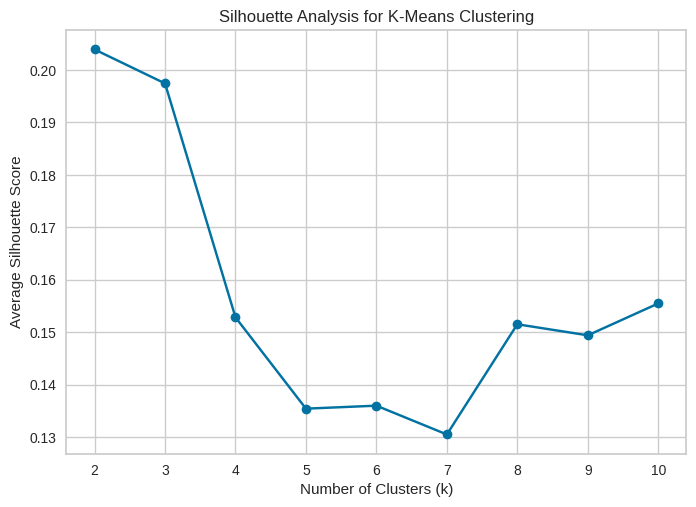

The highest average Silhouette score is 0.2039171500089637 with k=2.
The second highest average Silhouette score is 0.19744443821915328 with k=3.


In [ ]:
# Perform k-means clustering with different values of k (from 2 to 11)
k_values = range(2, 11)
silhouette_avg_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans_result = kmeans.fit_predict(X)  # without target
    silhouette_avg = silhouette_score(X, kmeans_result)  # Calculate silhouette score
    silhouette_avg_values.append(silhouette_avg)

# Find the best number of clusters based on the highest average Silhouette score
best_k = k_values[np.argmax(silhouette_avg_values)]
best_score = max(silhouette_avg_values)

# Find the second highest average Silhouette score and its corresponding number of clusters
silhouette_avg_values_sorted = sorted(silhouette_avg_values, reverse=True)
second_best_score = silhouette_avg_values_sorted[1]
second_best_k = k_values[silhouette_avg_values.index(second_best_score)]

# Plot the silhouette scores for different values of k
plt.plot(k_values, silhouette_avg_values, marker='o')
plt.title('Silhouette Analysis for K-Means Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.show()

# Print the best and second best k values based on silhouette score
print(f"The highest average Silhouette score is {best_score} with k={best_k}.")
print(f"The second highest average Silhouette score is {second_best_score} with k={second_best_k}.")

As observed above, the highest average Silhouette score is **0.2039** for **\( K = 2 \)**, indicating that **\( K = 2 \)** is the most optimal choice for our K-means clustering. The second-highest average Silhouette score is **0.1974** for **\( K = 3 \)**, making **\( K = 3 \)** our secondary clustering configuration.  

By considering these two values of **\( K \)**, we aim to analyze different clustering structures, ensuring that we capture meaningful patterns within the dataset and optimize the clustering performance.

# **Elbow Method** :

 Elbow method is a popular approach for identifying the ideal number of clusters in K-means clustering. It works by plotting the inertia (which represents the sum of squared distances within each cluster) against different values of k (the number of clusters).

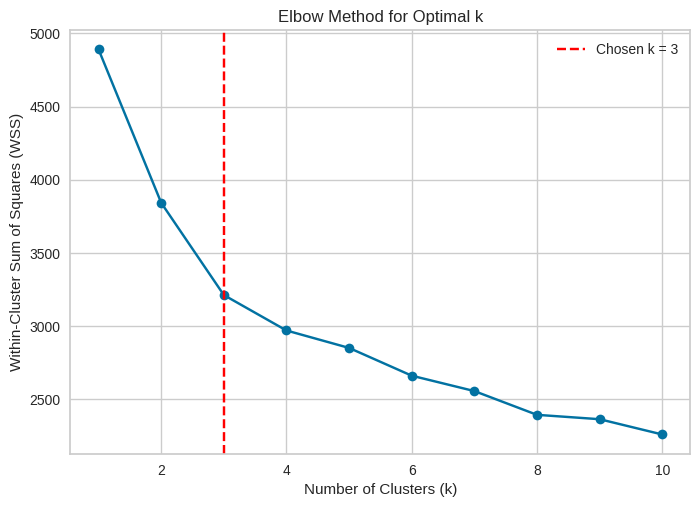

In [ ]:

!pip install kneed
from kneed import KneeLocator



X_scaled = X

# Define range for k values
k_values = range(1, 11)
wss_values = []

# Calculate WSS (within-cluster sum of squares) for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X)
    wss_values.append(kmeans.inertia_)  # inertia_ is WSS

# Plot the Elbow graph
plt.plot(k_values, wss_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WSS)')
plt.title('Elbow Method for Optimal k')

# Use KneeLocator to find the optimal k (elbow point)
knee = KneeLocator(k_values, wss_values, curve='convex', direction='decreasing')
optimal_k = knee.elbow

# Draw a vertical line at the elbow
plt.axvline(x=optimal_k, linestyle='--', color='red', label=f'Chosen k = {optimal_k}')
plt.legend()
plt.show()


After analyzing the Elbow plot, the point of inflection appears at k = 3, where the rate of decrease in the within-cluster sum of squares (WSS) starts to slow down. This suggests that adding more clusters beyond this point results in only marginal improvements in clustering compactness.

#**K=2**

In [ ]:
np.random.seed(8953)

# Perform K-means clustering for K=2
kmeans = KMeans(n_clusters=2, random_state=8953, n_init='auto')  # Set n_init explicitly and init='auto'
kmeans_result = kmeans.fit(X)

# Print the clustering result
print("Cluster Centers:")
print(kmeans_result.cluster_centers_)
print("\nCluster Labels:")
print(kmeans_result.labels_)

Cluster Centers:
[[1.36923077 0.80615385 0.26153846 0.99076923 0.28357569 0.17538462
  0.45846154 0.5067293  0.55384615 0.25990074 1.22769231 1.93846154
  2.55692308]
 [0.94857143 0.64428571 1.25857143 0.84428571 0.26951402 0.13714286
  0.56285714 0.6378735  0.23571429 0.13239631 1.45857143 0.20428571
  2.21571429]]

Cluster Labels:
[0 1 0 ... 0 1 0]


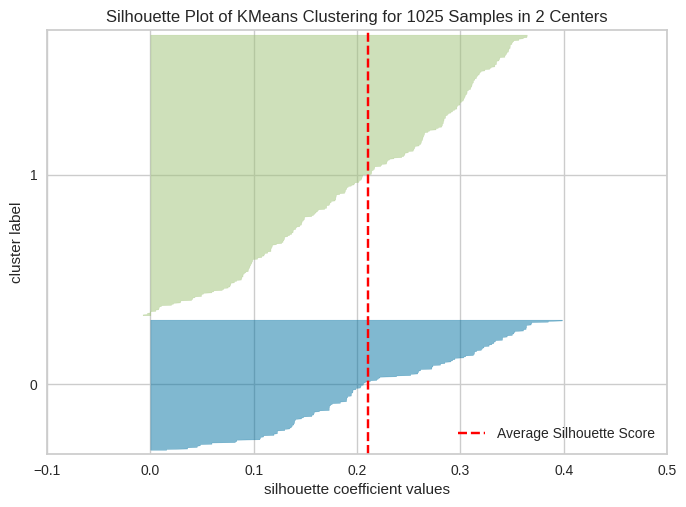

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 1025 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
kmeans = KMeans(n_clusters=2,n_init='auto')
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(X)
visualizer.show()


From the **Silhouette Plot of KMeans Clustering for 1025 Samples in 2 Centers**, we observe that most silhouette scores are **positive**, indicating that the majority of data points are well assigned to their respective clusters and maintain a reasonable distance from other clusters. This suggests that the clustering algorithm successfully grouped the data into two distinct clusters, albeit with **moderate separation**.

However, while positive silhouette scores generally indicate good clustering performance, the **average silhouette score of approximately 0.2039** suggests that the separation between clusters is not entirely strong. Some data points, particularly those **near the cluster boundaries**, show silhouette scores close to **zero or even negative values**, indicating potential ambiguity or overlap between clusters.

**Calculating the Within-Cluster Sum of Squares (WSS) and the Average Silhouette Score**

In [ ]:
X_scaled = X

# Perform k-means clustering with k=2
kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto')
kmeans.fit(X_scaled)
labels = kmeans.labels_

# Compute the WSS (Within-Cluster Sum of Squares)
wss = kmeans.inertia_

# Compute the Average Silhouette Score
silhouette_avg = silhouette_score(X, labels)

# Print the evaluation metrics
print("WSS:", wss)
print("Average Silhouette Score:", silhouette_avg)

WSS: 3842.7015172036417
Average Silhouette Score: 0.2039171500089637


The analysis of the **K=2** results is as follows:

- **WSS: 3842.70** – This value suggests that there is some dispersion within the clusters, indicating moderate separation but not highly compact clusters.  
- **Average Silhouette Score: 0.2039** – This relatively low score indicates that the clusters are not perfectly distinct, with some degree of overlap or ambiguity in the clustering structure.  



# **K=3**

In [ ]:
np.random.seed(8953)

# Perform K-means clustering for K=3
kmeans = KMeans(n_clusters=3, random_state=8953, n_init='auto')  # Set n_init explicitly and init='auto'
kmeans_result = kmeans.fit(X)

# Print the clustering result
print("Cluster Centers:")
print(kmeans_result.cluster_centers_)
print("\nCluster Labels:")
print(kmeans_result.labels_)

Cluster Centers:
[[1.385      0.72       0.365      1.08       0.29825342 0.265
  0.435      0.53858779 0.445      0.26822581 1.245      2.525
  2.485     ]
 [0.97357724 0.72764228 0.30487805 0.78252033 0.26637617 0.06504065
  0.55487805 0.58637436 0.41869919 0.15053763 1.40650407 0.30284553
  2.33536585]
 [1.06006006 0.63363363 2.23123123 0.93693694 0.27061308 0.2042042
  0.54954955 0.6455998  0.15015015 0.14845491 1.43843844 0.35735736
  2.21021021]]

Cluster Labels:
[0 1 1 ... 1 1 1]


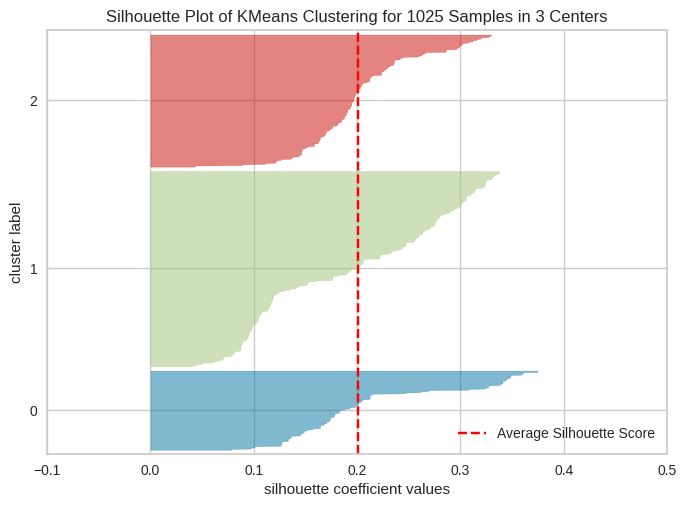

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 1025 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
kmeans = KMeans(n_clusters=3,n_init='auto')
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(X)
visualizer.show()

From the graph of **K-Means Clustering for 1025 Samples in 3 Centers**, the fact that most silhouette scores have positive values suggests that the samples are fairly well-matched to their clusters and are generally distant from neighboring clusters. This indicates that the clustering solution has separated the data points into reasonably distinct clusters. However, while some samples have silhouette scores close to zero, indicating slight overlap or ambiguity, there are very few negative scores, suggesting that misclassification is minimal.

Calculating the Within-Cluster Sum of Squares (WSS) and the Average Silhouette Score

In [ ]:
X_scaled = X

# Perform k-means clustering with k=2
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
kmeans.fit(X_scaled)
labels = kmeans.labels_

# Compute the WSS (Within-Cluster Sum of Squares)
wss = kmeans.inertia_

# Compute the Average Silhouette Score
silhouette_avg = silhouette_score(X, labels)

# Print the evaluation metrics
print("WSS:", wss)
print("Average Silhouette Score:", silhouette_avg)

WSS: 3213.0541103450096
Average Silhouette Score: 0.19744443821915328


The analysis of the K=3 results is :

WSS: 3213.05 – The relatively high WSS suggests moderate to weak compactness within clusters, indicating that points within clusters are somewhat dispersed.

Average Silhouette Score: 0.197 – This low silhouette score implies some overlap or ambiguity in cluster assignments, suggesting that the clusters are not perfectly distinct.

# **k=4**

In [ ]:
np.random.seed(8953)

# Perform K-means clustering for K=3
kmeans = KMeans(n_clusters=4, random_state=8953, n_init='auto')  # Set n_init explicitly and init='auto'
kmeans_result = kmeans.fit(X)

# Print the clustering result
print("Cluster Centers:")
print(kmeans_result.cluster_centers_)
print("\nCluster Labels:")
print(kmeans_result.labels_)

Cluster Centers:
[[1.385      0.72       0.365      1.08       0.29825342 0.265
  0.435      0.53858779 0.445      0.26822581 1.245      2.525
  2.485     ]
 [0.70955882 0.70220588 0.47794118 0.49264706 0.24546737 0.04779412
  0.65441176 0.65690952 0.13235294 0.09475806 1.56985294 0.10661765
  2.13235294]
 [1.06006006 0.63363363 2.23123123 0.93693694 0.27061308 0.2042042
  0.54954955 0.6455998  0.15015015 0.14845491 1.43843844 0.35735736
  2.21021021]
 [1.3        0.75909091 0.09090909 1.14090909 0.29222707 0.08636364
  0.43181818 0.49916724 0.77272727 0.21950147 1.20454545 0.54545455
  2.58636364]]

Cluster Labels:
[0 3 3 ... 3 1 1]


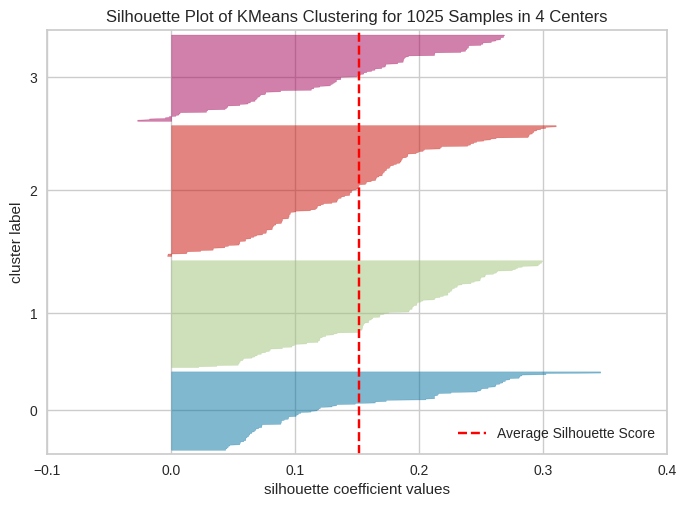

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 1025 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
kmeans = KMeans(n_clusters=4,n_init='auto')
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(X)
visualizer.show()

From the graph of **K-Means Clustering for 1025 Samples in 4 Centers**, the fact that most silhouette scores have positive values suggests that the samples are fairly well-matched to their clusters and are generally distant from neighboring clusters. This indicates that the clustering solution has separated the data points into reasonably distinct clusters.

However, while some samples have silhouette scores close to zero, indicating slight overlap or ambiguity, there are very few negative scores.

Calculating the Within-Cluster Sum of Squares (WSS) and the Average Silhouette Score

In [ ]:
X_scaled = X

# Perform k-means clustering with k=2
kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
kmeans.fit(X_scaled)
labels = kmeans.labels_

# Compute the WSS (Within-Cluster Sum of Squares)
wss = kmeans.inertia_

# Compute the Average Silhouette Score
silhouette_avg = silhouette_score(X, labels)

# Print the evaluation metrics
print("WSS:", wss)
print("Average Silhouette Score:", silhouette_avg)

WSS: 2971.100555994478
Average Silhouette Score: 0.1528536239200623


The analysis of the K=4 results is :
WSS: 2971.10 – The moderate WSS suggests that the clusters have a somewhat weak compactness, with points being a bit dispersed within them.

Average Silhouette Score: 0.1529 – The low silhouette score indicates that there is some overlap or ambiguity in the clusters, meaning they are not very distinct.

**Comparing the Results of the Three Clustering Configurations:**



1.   WSS = 3842.70, Silhouette Score = 0.2039
Analysis: This configuration has the highest silhouette score, suggesting that the clusters are somewhat well-separated. However, the WSS is the highest, indicating that the clusters are the least compact.

2.   WSS = 3213.05, Silhouette Score = 0.1974
Analysis: The WSS is lower than when K=2, suggesting slightly more compact clusters. However, the silhouette score is lower, implying less distinct separation between the clusters.



3.   WSS = 2971.10, Silhouette Score = 0.1529
Analysis: This configuration has the lowest WSS, indicating the most compact clusters. However, it also has the lowest silhouette score, suggesting significant overlap or ambiguity in the cluster assignments, meaning the clusters are not very distinct.







**Conclusion**

The first configuration (K=2, WSS = 3842.70, Silhouette Score = 0.2039) is the best overall. Despite having the highest WSS, it achieves the highest silhouette score, suggesting better-separated clusters. This trade-off indicates that the clusters are more distinct compared to the other configurations, offering a clearer separation of data points.

# **Final Choice:**

**Summary of Results**


|                       | k=2       | k=3          | k=4           |
|--------------- |----------|------------|-------------|
|    WSS            | *3842.70*   | *3213.05*| *2971.10*|
| Average Silhouette Score                      | *0.2039*| *0.1974*| *0.1529*|

Based on the metrics we've analyzed, including WSS (Within-Cluster Sum of Squares) and the average Silhouette score, we have determined that K = 2 is the most suitable choice for our clustering model. This decision is supported by the fact that K = 2 provides the highest Silhouette score among the tested values, indicating better-defined clusters with higher cohesion and separation compared to K = 3 and K = 4. Although K = 2 has the largest WSS value, which typically decreases as K increases, the higher Silhouette score suggests that K = 2 strikes the best balance between separation and compactness of the clusters.

# **6. Evaluation and Comparison:**

#**6.1) Classification**

**6.1.1) INFORMATION GAIN**


The model was trained using Information Gain (Entropy) as the splitting criterion in the decision tree.
The dataset was divided into different ratios to evaluate the model’s performance under various conditions, as follows:

- 70% for training and 30% for testing

- 60% for training and 40% for testing

- 80% for training and 20% for testing

After training, the model’s performance was evaluated using the Confusion Matrix, which provided a comprehensive overview of classification accuracy for each data split.

**70% for training and 30% for testing**



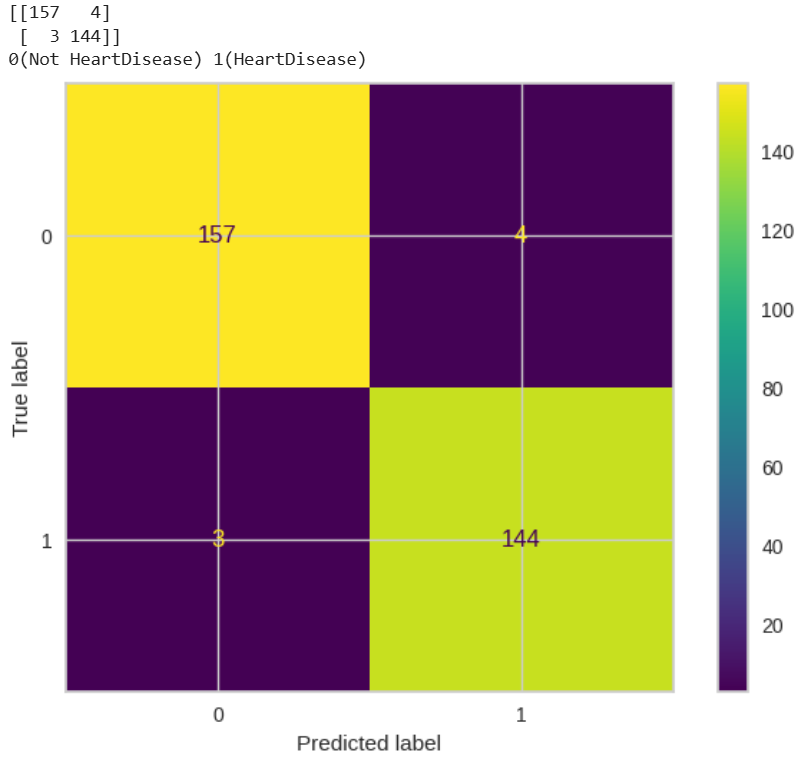

**60% for training and 40% for testing**

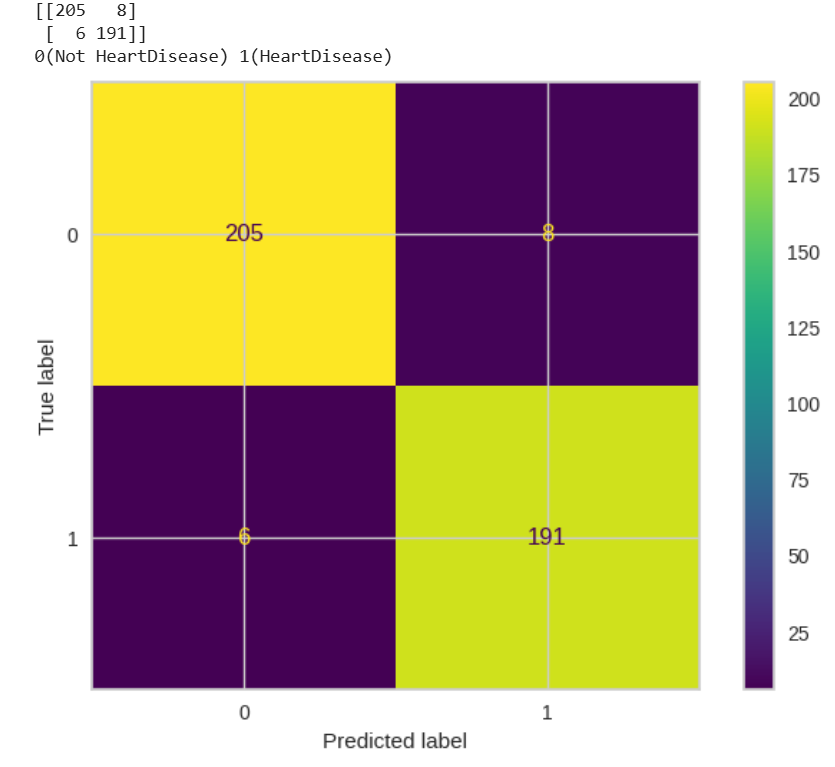

**80% for training and 20% for testing**


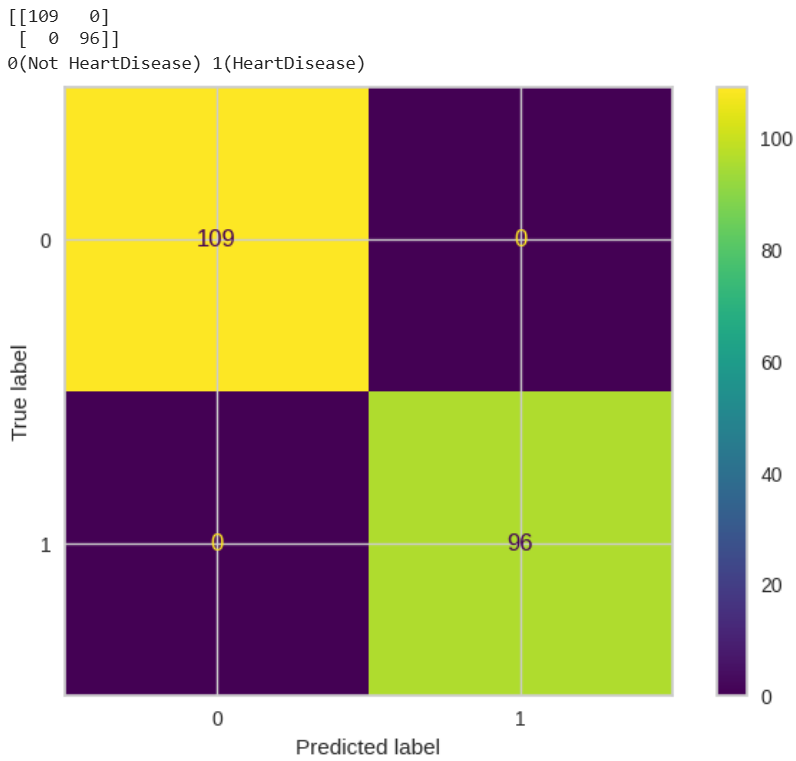

In [ ]:
d = {
        "Split": [
        "Accuracy", "Error Rate", "Sensitivity", "Specificity", "Precision"
        ],
     "60% training, 40% testing	": [
        "0.9658", "0.03414", "0.9695", "0.9624",
        "0.9597 "

    ],
    "70% training, 30% testing": [
        "0.9772", "0.0227", "0.9795", "0.9751", "0.9729"
    ],

    "	80% training, 20% testing": [
        "1.0", "0.0", "1.0", "1.0","1.0"
    ]
}
g = pd.DataFrame(d)
g.style.set_properties(**{'text-align': 'center'})

Evaluation of Models

Accuracy:

The accuracy improves from 96.85% (60%-40%) to 100% (80%-20%).
The 80%-20% split achieves perfect accuracy, indicating that the model is classifying all test instances correctly.
Error Rate:

The error rate decreases from 3.414% (60%-40%) to 0% (80%-20%).
This means the model is making no incorrect predictions with the 80%-20% split.
Sensitivity (Recall / True Positive Rate):

Sensitivity starts at 96.95% (60%-40%) and reaches 100% (80%-20%).
This suggests that the model identifies all positive cases correctly in the 80%-20% split.
Specificity (True Negative Rate):

Specificity improves from 96.24% (60%-40%) to 100% (80%-20%).
This indicates that the model correctly classifies all negative cases when trained on 80% of the data.
Precision:

Precision increases from 95.97% (60%-40%) to 100% (80%-20%).
A precision of 1.0 (100%) means that every positive prediction made by the model is actually correct.
Conclusion:

The 80%-20% model achieves perfect scores across all metrics (100%), meaning it correctly classifies every test instance.

**6.1.2) GINI Index**

The Gini Index was used as the splitting criterion for the decision tree model.
The model was evaluated using three different training and testing data splits:

- 20% training and 80% testing

- 50% training and 50% testing

- 70% training and 30% testing

**20% training and 80% testing**
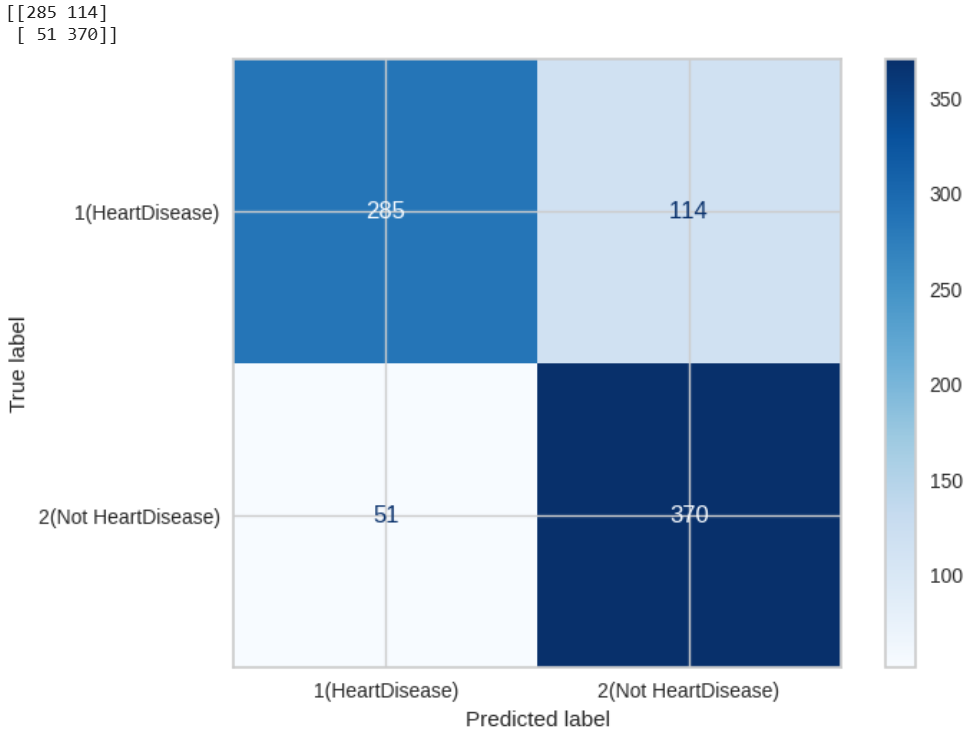


**50% training and 50% testing**
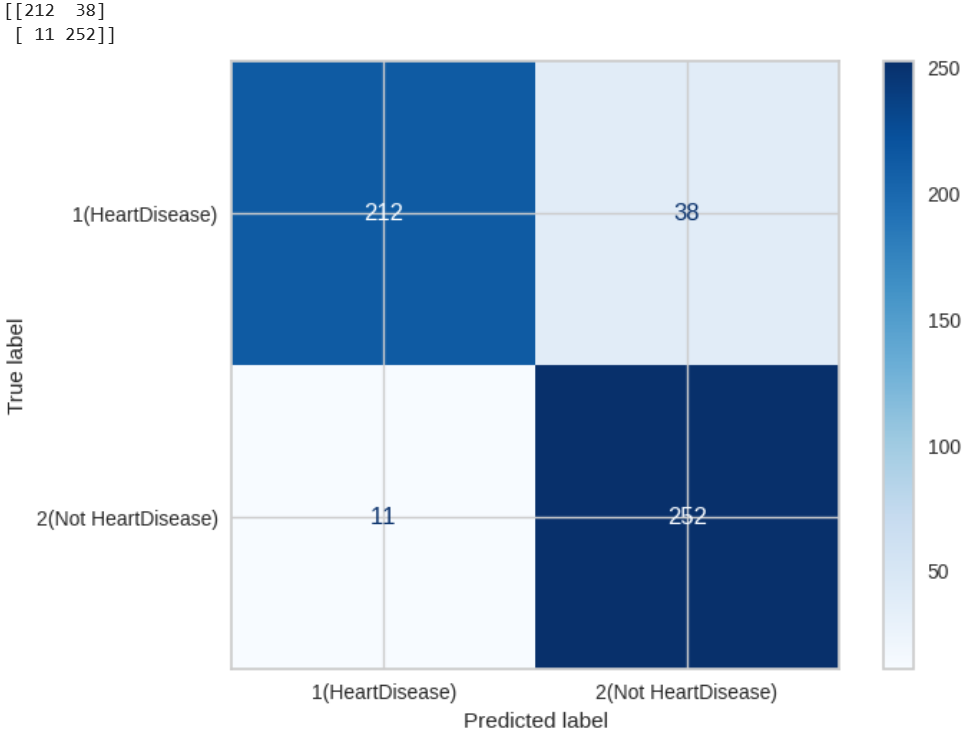


**70% training and 30% testing**

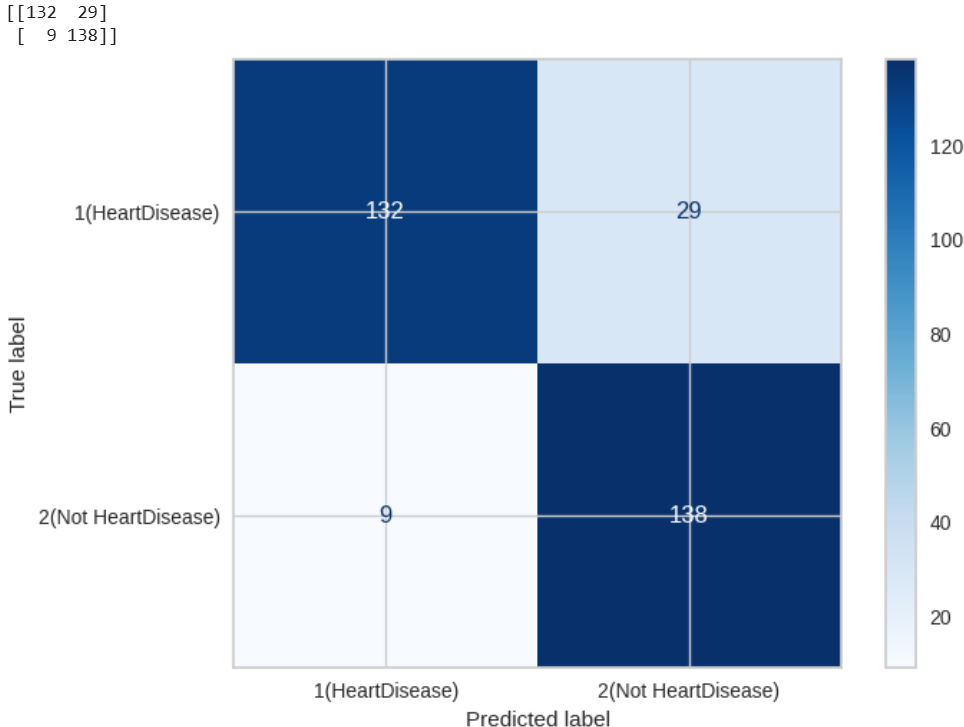

In [ ]:
F = {
    "Split": [
        "Accuracy",
        "Error Rate",
        "Sensitivity",
        "Specificity",
        "Precision"
    ],
    "50% training, 50% testing": [
        "0.9045",
        "0.0955",
        "0.9582",
        "0.8480",
        "0.8690"
    ],
    "70% training, 30% testing": [
        "0.8766",
        "0.1234",
        "0.9388",
        "0.8199",
        "0.8263"
    ],
    "20% training, 80% testing": [
        "0.7988",
        "0.2012",
        "0.8789",
        "0.7143",
        "0.7645"
    ]
}

# Create DataFrame and apply styling
g = pd.DataFrame(F)
g.style.set_properties(**{'text-align': 'center'})


## **Evaluation of Models**

* **Accuracy:**



Accuracy is highest with the 50%-50% split at 90.45%.

It slightly drops to 87.66% with a 70%-30% split, and further to 79.88% with a 20%-80% split.

This suggests that the model performs best with a balanced dataset (50%-50%).

* **Error Rate:**


The error rate is lowest for the 50%-50% split at 9.55%, increasing to 12.34% with 70%-30%, and reaching 20.12% with 20%-80%.

This indicates the model makes more mistakes as the training data decreases.

* **Sensitivity (Recall / True Positive Rate):**


Sensitivity is highest with the 50%-50% split at 95.82%, followed by 93.88% with 70%-30%.

It drops to 87.89% in the 20%-80% split, showing the model becomes less effective at identifying positive cases with less training data.

* **Specificity (True Negative Rate):**


Specificity follows a similar trend: 84.80% (50%-50%), 81.99% (70%-30%), and 71.43% (20%-80%).

This decline suggests the model struggles more with correctly identifying negative cases as the training size decreases.

* **Precision:**


Precision is highest at 86.90% for 50%-50%, followed by 82.63% for 70%-30%, and drops to 76.45% for 20%-80%.

This shows that the model becomes less reliable in making positive predictions with smaller training sets.

* **Conclusion:**


The 50%-50% training-testing split delivers the best overall performance across all evaluation metrics in this comparison.

As the training data size decreases, the model's ability to accurately and confidently classify both positive and negative instances declines.

Therefore, a balanced or slightly larger training set (like 50%-50% or 70%-30%) may be optimal for maintaining strong performance.


# **6.2) Clustering**

We chose 3 different sizes [2,3,4] based on the result of the validation methods that we used
then we will use these sizes to perform the k-means clustering.

**Silhouette Analysis:** to neighboring clustes
measures how well each data point fits within its assigned cluster compared

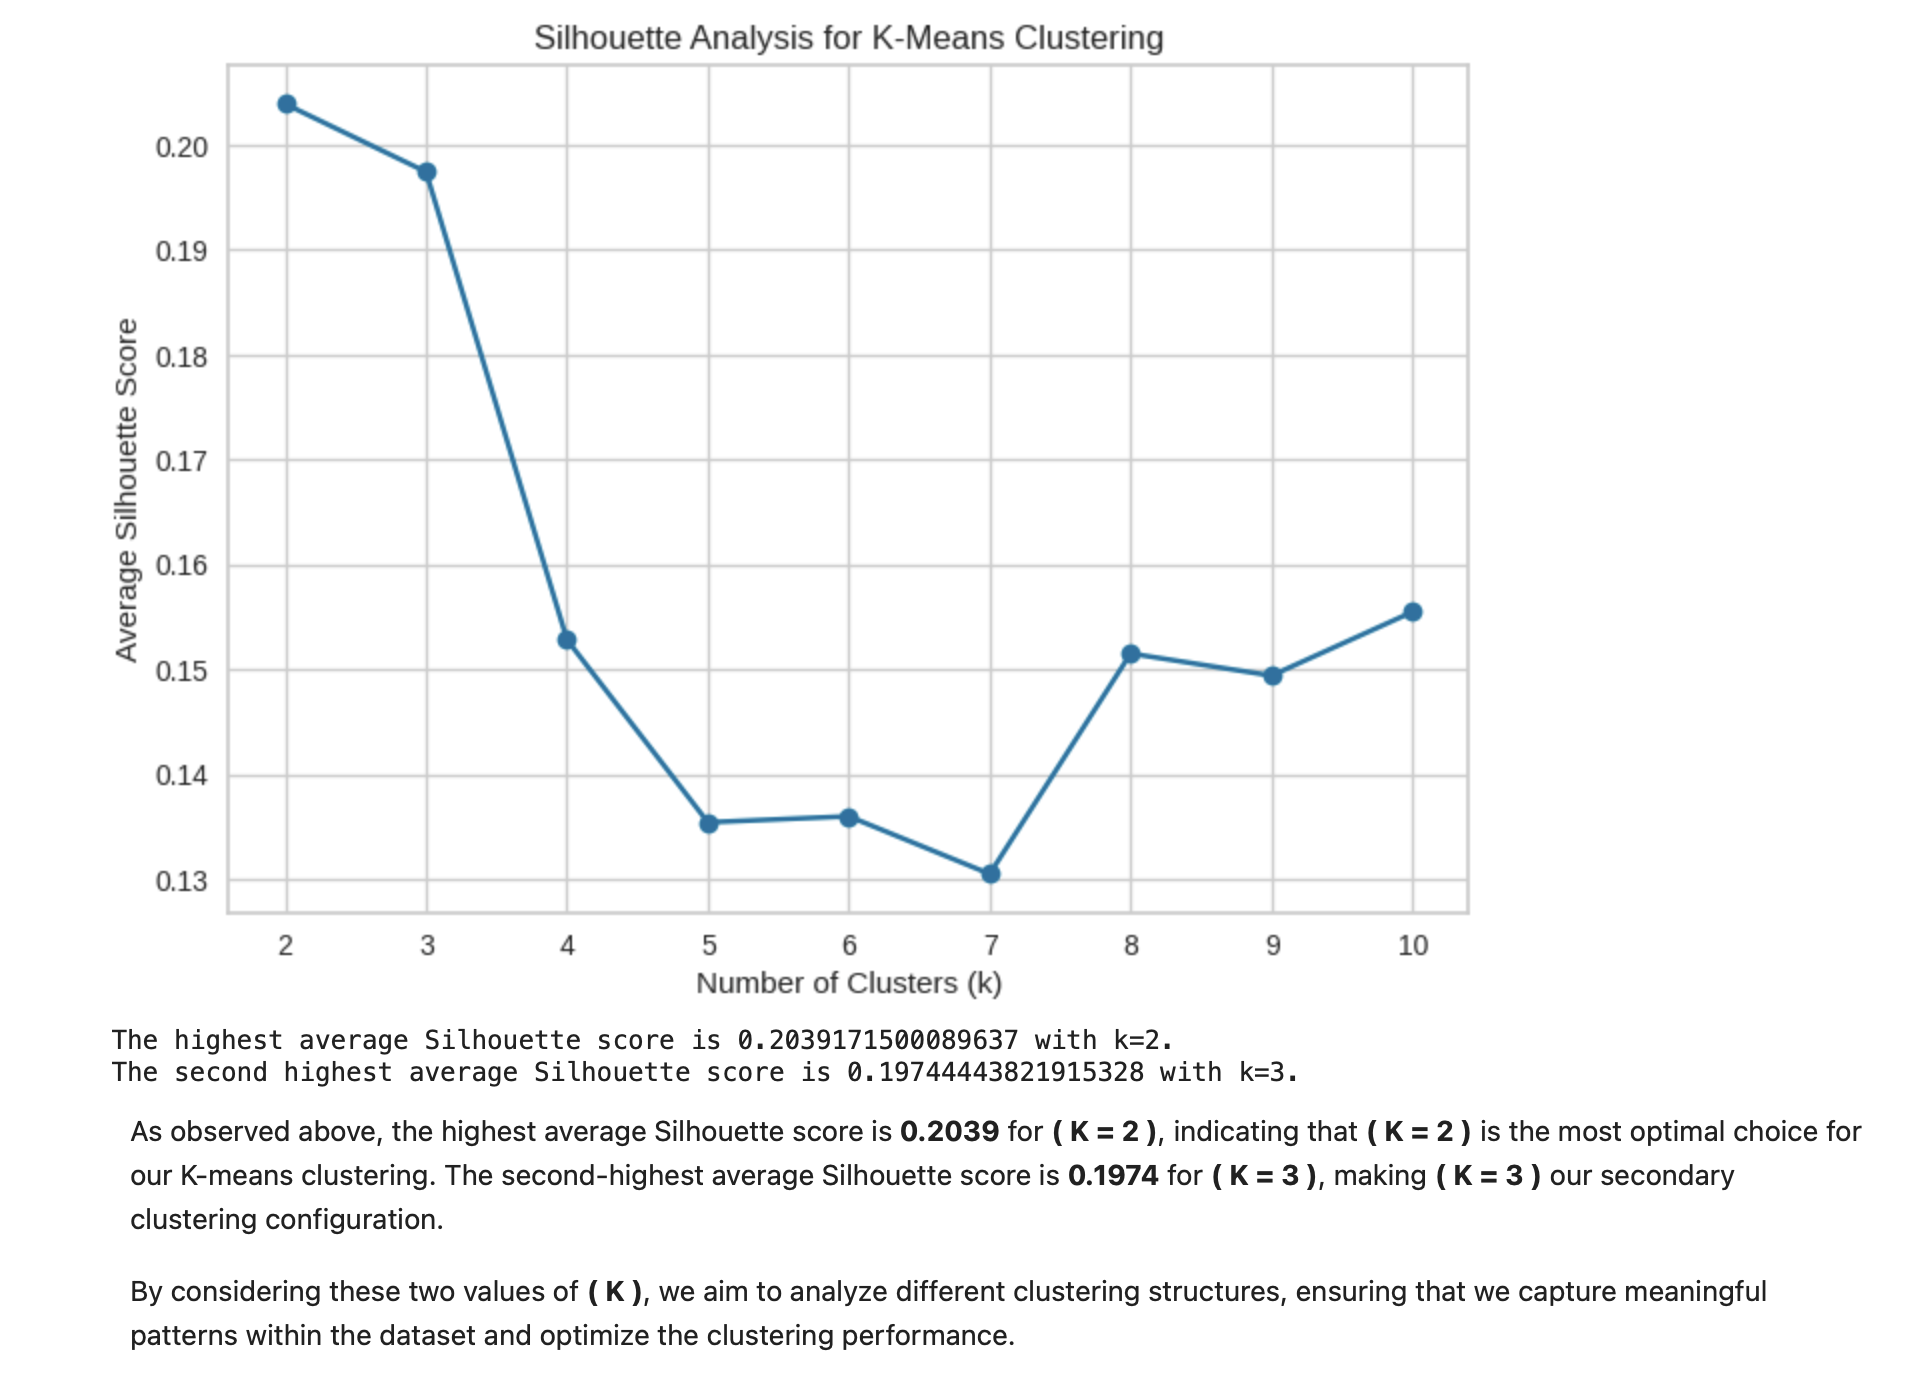

**Elbow Method:** helps identify the optimal number of clusters for K-means by plotting inertia
(cluster compactness) against the number of clusters.

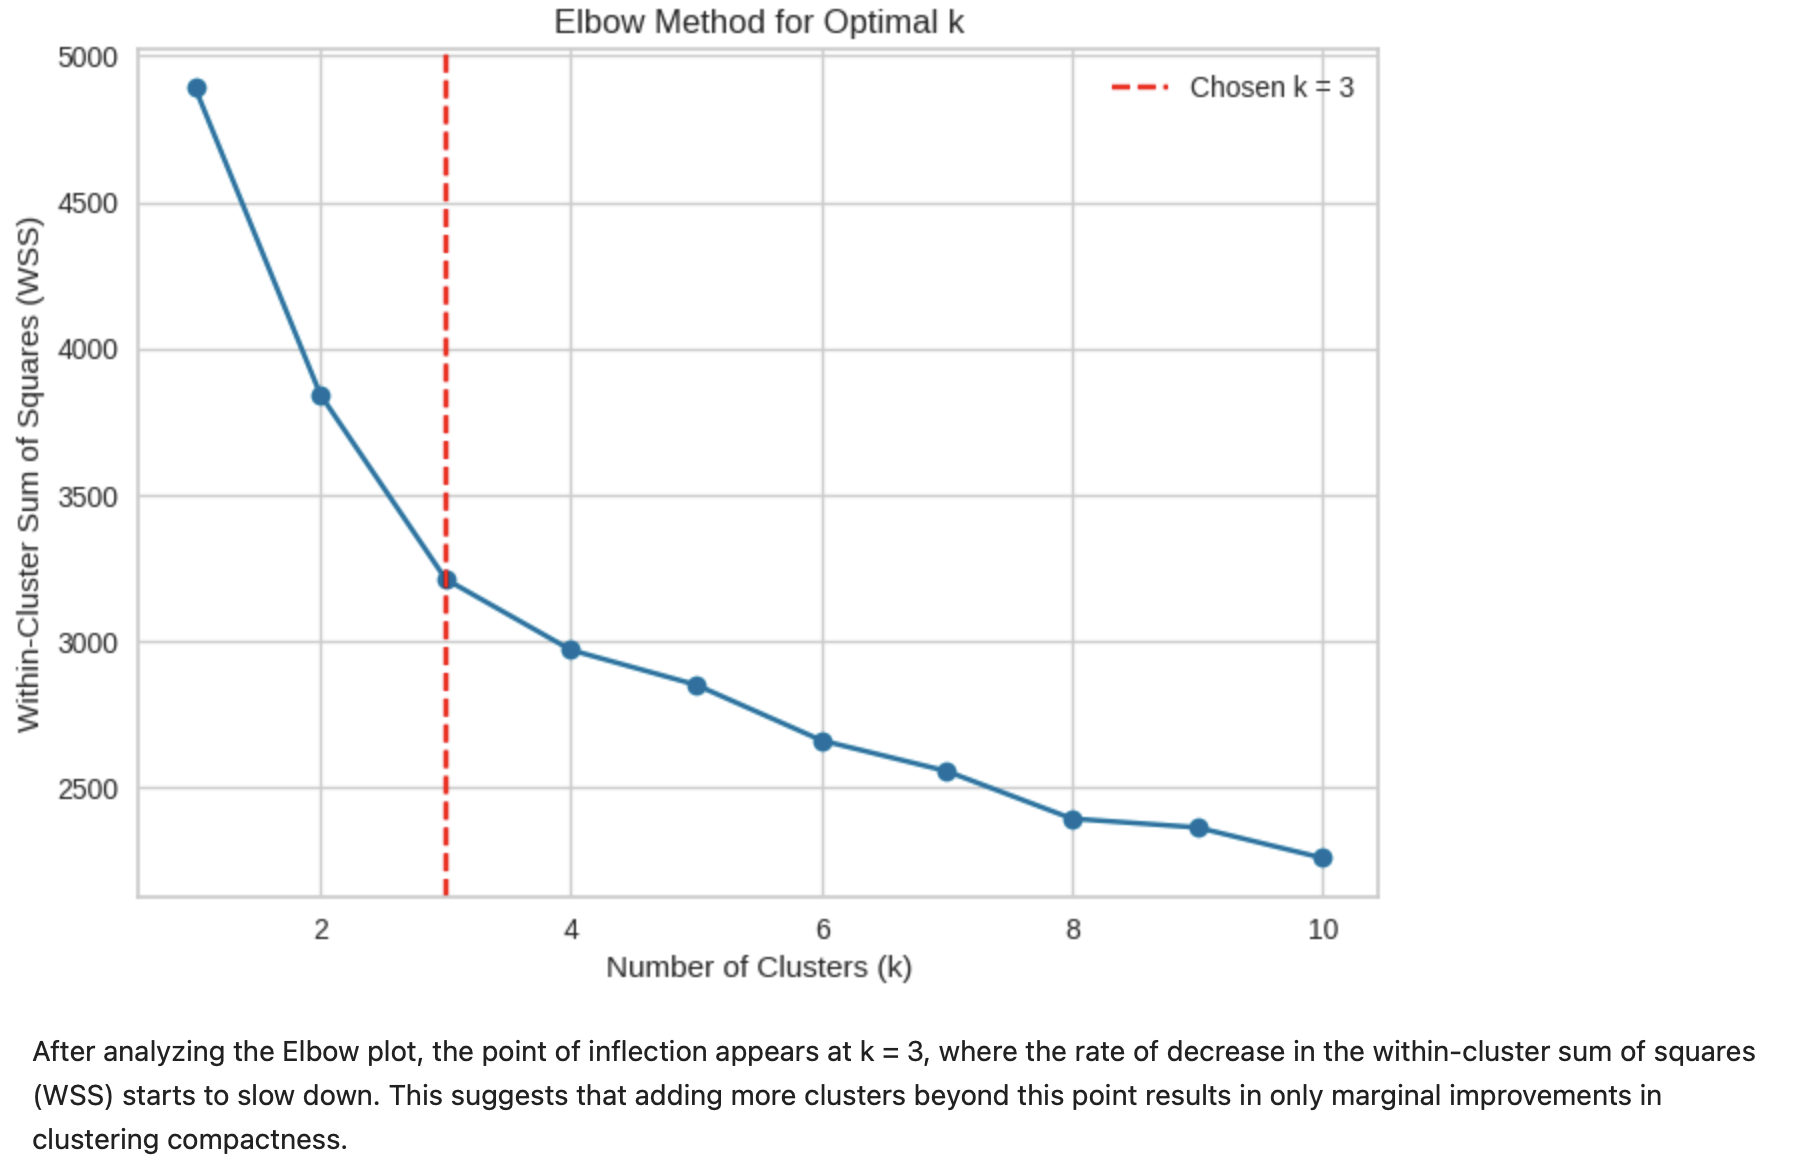

**silhouette scores [K=2]**

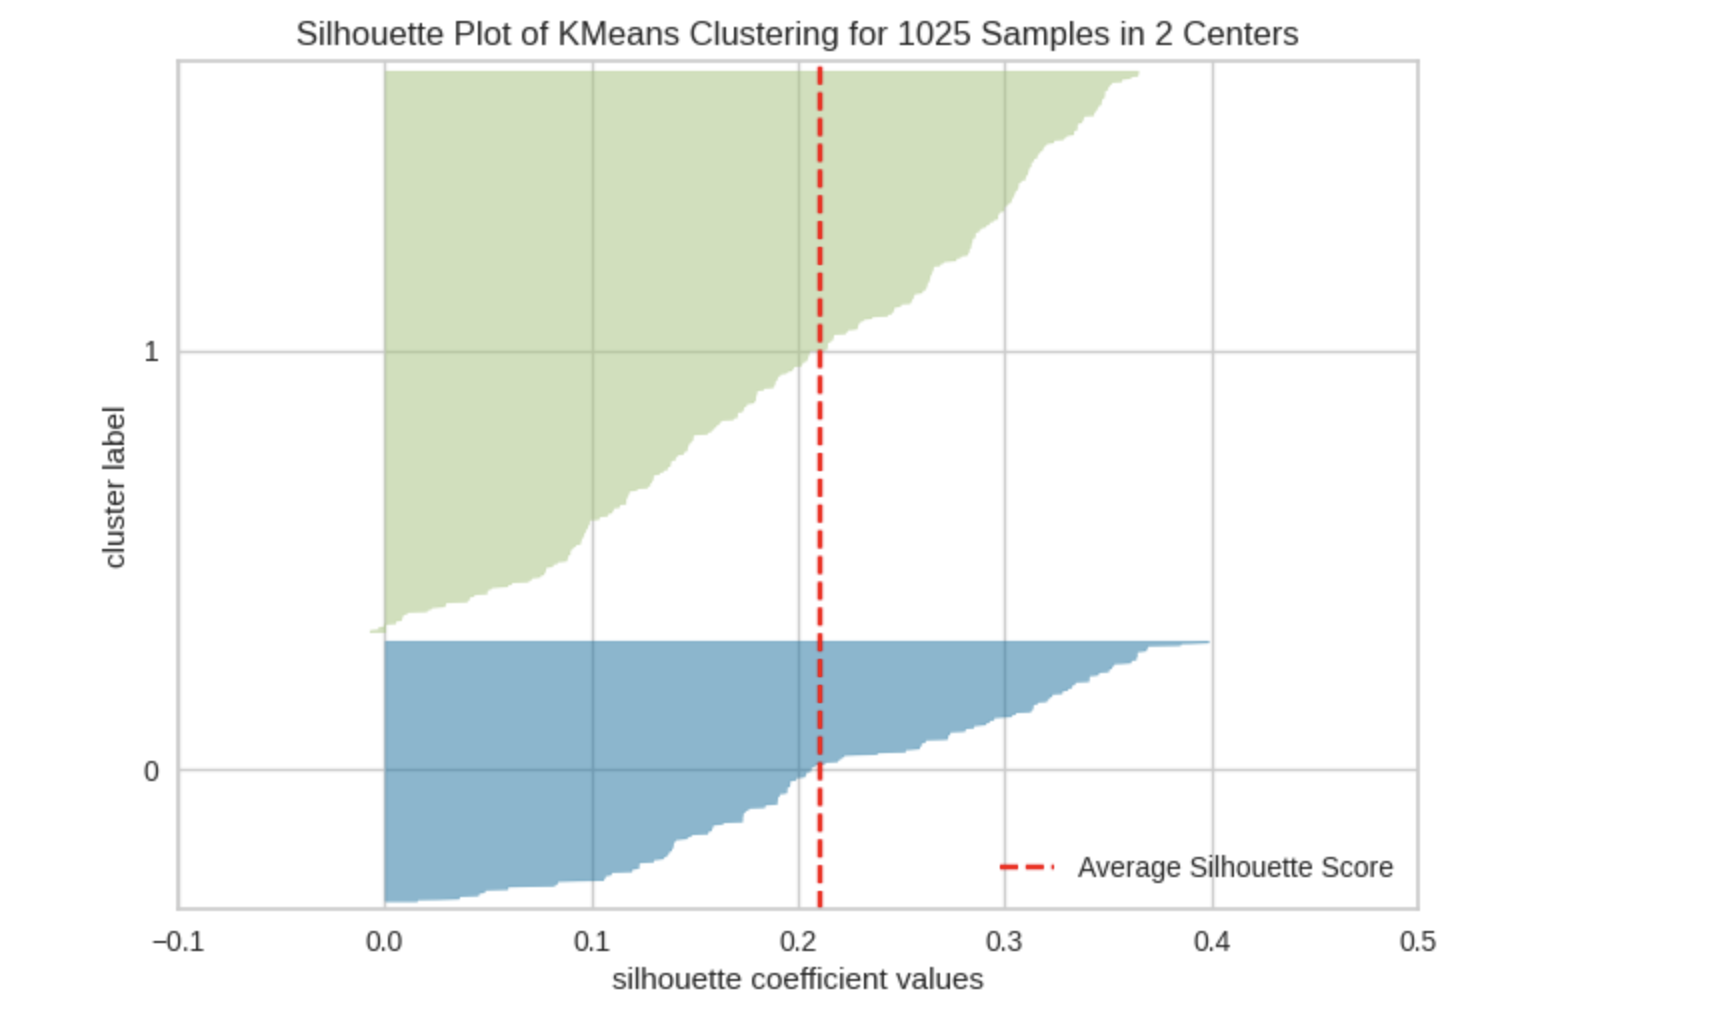

**silhouette scores [K=3]**

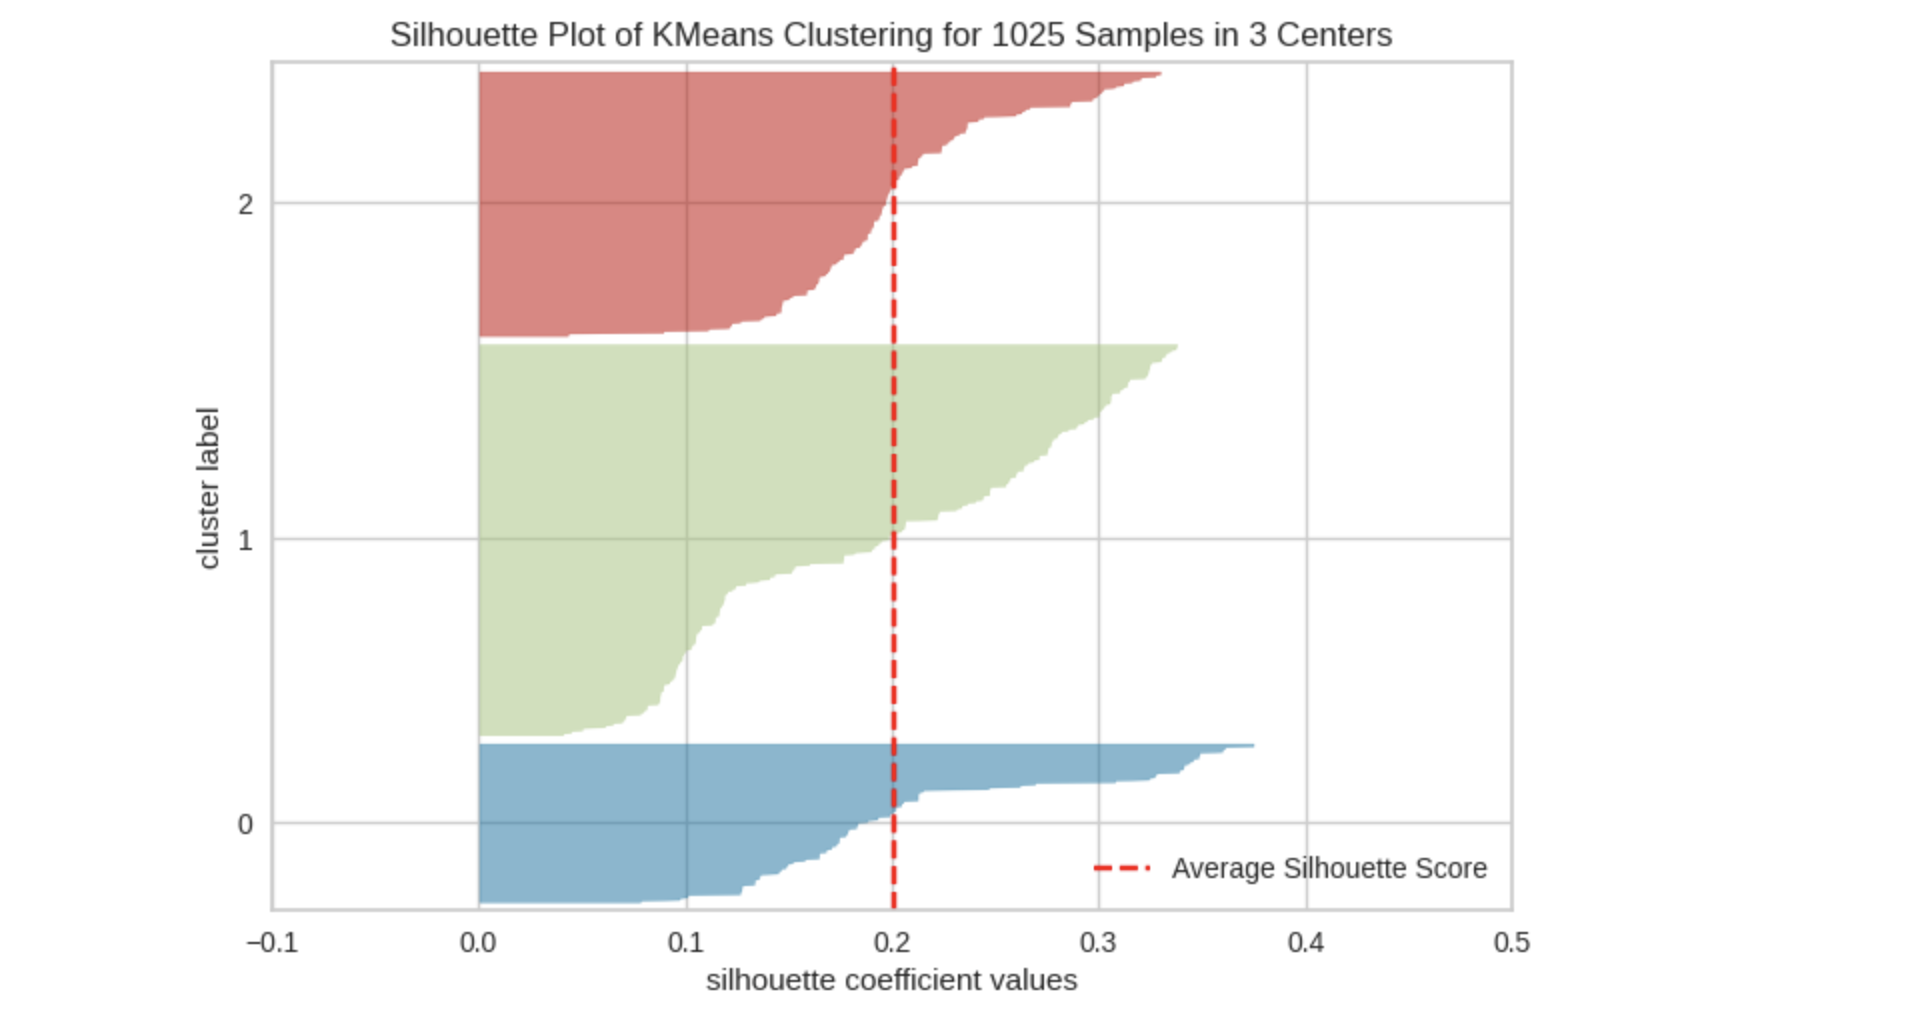

**silhouette scores [K=4]**

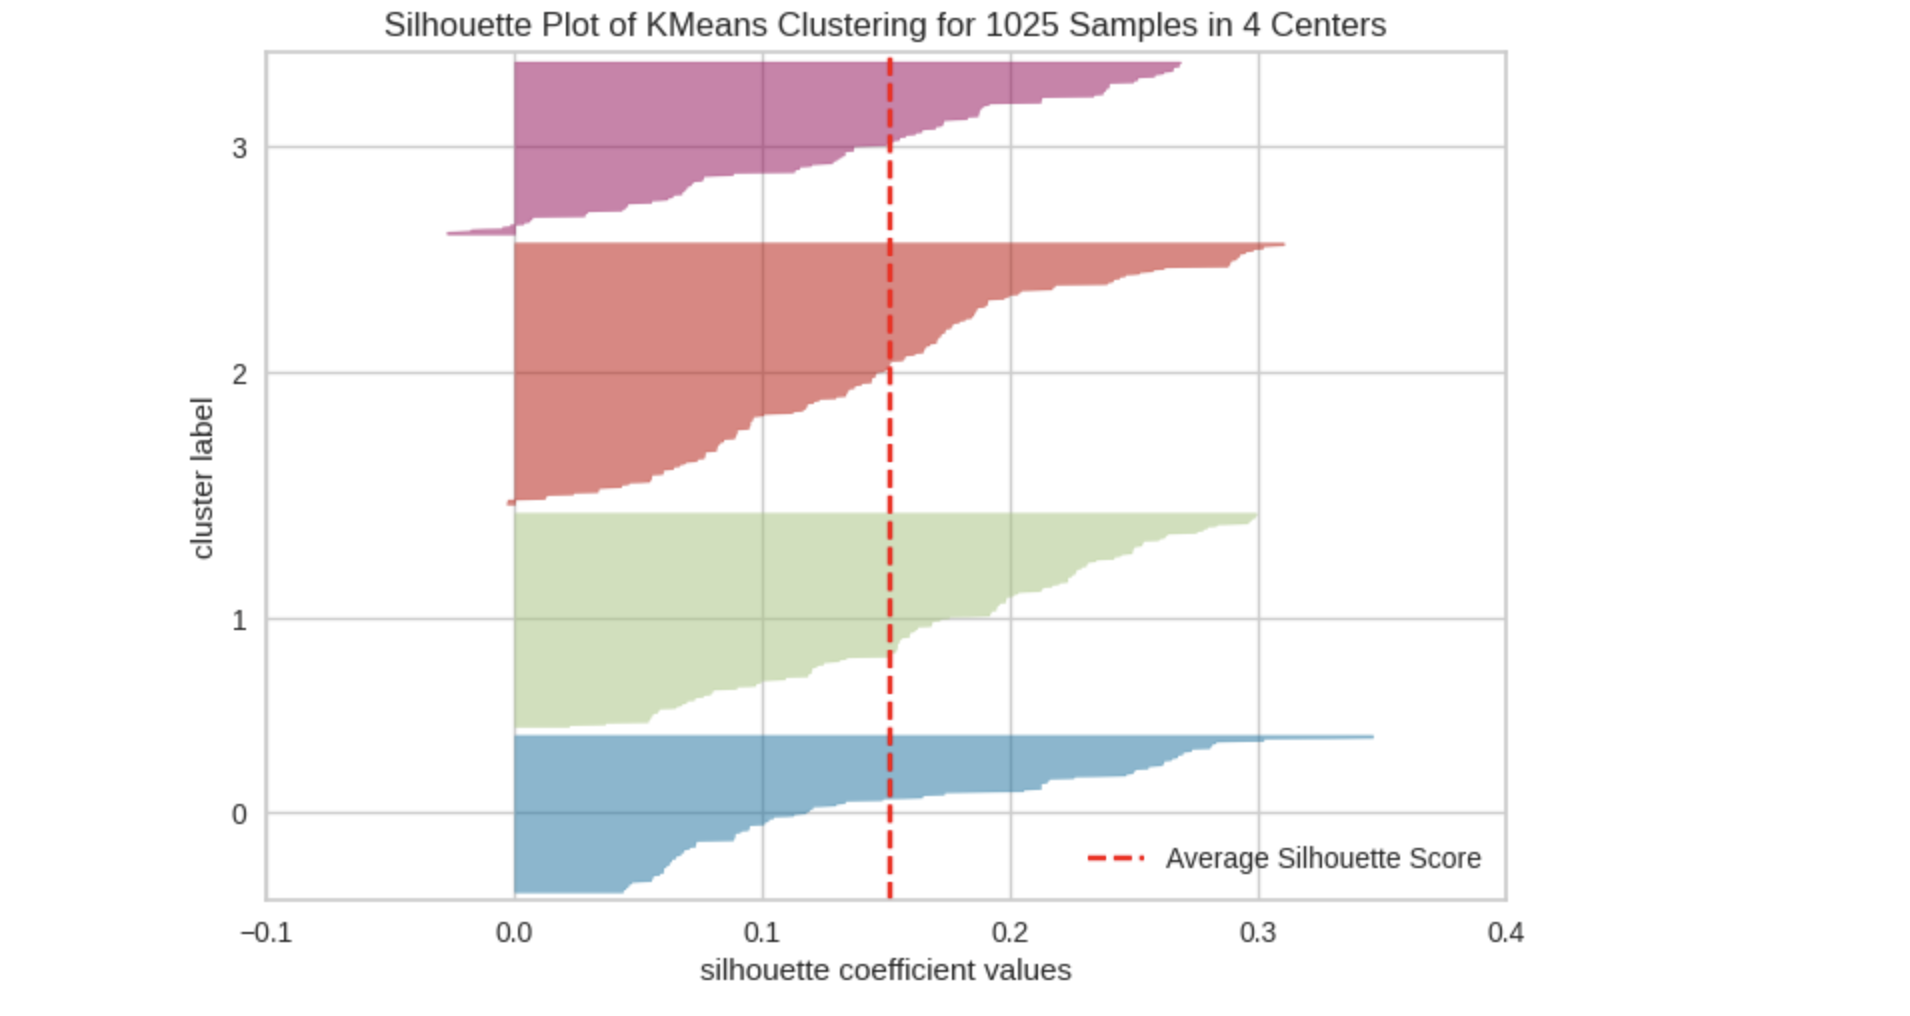

In [ ]:
import pandas as pd

data = {
    " ": ["WSS", "Silhouette"],
    "k=2": ["3842.5", "0.2039"],
    "k=3": ["3213.05", "0.1974"],
    "k=4": ["2971.10", "0.1529"]
}

# Convert the data into a DataFrame
df = pd.DataFrame(data)

g = pd.DataFrame(data)
g.style.set_properties(**{'text-align': 'center'})

# **7. Findings**

# **part 1: Classification:**

We worked with a processed dataset containing essential health attributes such as age, cholesterol levels, chest pain type, resting blood pressure, and more. The primary objective was to use this data to predict the risk of heart disease and assist in promoting early detection and preventive measures.

Before model implementation, we applied data preprocessing techniques including normalization, transformation, and encoding to ensure consistency across all attributes. A visual inspection of the dataset confirmed there were no missing values or significant outliers, giving us confidence in its quality and readiness for analysis.

For classification, we utilized Decision Tree algorithms with both Information Gain (Entropy) and Gini Index as splitting criteria. We tested each method across different train-test splits (60-40, 70-30, 80-20, etc.) to assess model performance. The following sections present a detailed analysis of the results and identify the most effective configuration for predicting heart disease risk.










# **1-Information Gain (entropy)**

In [ ]:
d = {
        "Split": [
        "Accuracy", "Error Rate", "Sensitivity", "Specificity", "Precision"
        ],
     "60% training, 40% testing	": [
        "0.9658", "0.03414", "0.9695", "0.9624",
        "0.9597 "

    ],
    "70% training, 30% testing": [
        "0.9772", "0.0227", "0.9795", "0.9751", "0.9729"
    ],

    "	80% training, 20% testing": [
        "1.0", "0.0", "1.0", "1.0","1.0"
    ]
}
g = pd.DataFrame(d)
g.style.set_properties(**{'text-align': 'center'})

# Information Gain (Entropy) Results
The Information Gain models achieved strong performance across all data splits, with particularly high accuracy and balanced metrics:

Accuracy: The model trained on an 80% training and 20% testing split achieved perfect accuracy (100%), followed by 97.72% for the 70-30 split and 96.58% for the 60-40 split.

Error Rate: The error rate dropped as the training size increased, with the 80-20 split showing 0% error, followed by 2.27% (70-30) and 3.41% (60-40).

Sensitivity: The ability to detect true positive cases was excellent across all splits, with 100% sensitivity in the 80-20 split, 97.95% in the 70-30, and 96.95% in the 60-40.

Specificity: Similarly, true negative detection was perfect in the 80-20 split (100%), while the 70-30 and 60-40 splits followed closely with 97.51% and 96.24%, respectively.

Precision: Precision was also highest in the 80-20 split (100%), with the 70-30 and 60-40 splits showing 97.29% and 95.97%, respectively.

Conclusion:
All three splits yielded excellent results, but the 80% training, 20% testing configuration stood out with perfect scores across all metrics. However, given its small test size, the 70-30 split offers a more balanced and generalizable performance, with high accuracy (97.72%), strong sensitivity (97.95%), and excellent precision (97.29%), making it the most reliable choice for real-world applications where test robustness matters.



# **2- gini index**

In [ ]:
F = {
    "Split": [
        "Accuracy",
        "Error Rate",
        "Sensitivity",
        "Specificity",
        "Precision"
    ],
    "50% training, 50% testing": [
        "0.9045",
        "0.0955",
        "0.9582",
        "0.8480",
        "0.8690"
    ],
    "70% training, 30% testing": [
        "0.8766",
        "0.1234",
        "0.9388",
        "0.8199",
        "0.8263"
    ],
    "20% training, 80% testing": [
        "0.7988",
        "0.2012",
        "0.8789",
        "0.7143",
        "0.7645"
    ]
}

# Create DataFrame and apply styling
g = pd.DataFrame(F)
g.style.set_properties(**{'text-align': 'center'})

# Gini Index Results
The Decision Tree models using the Gini Index showed solid classification performance, with the 50% training, 50% testing split yielding the best overall results:

Accuracy: The highest accuracy was achieved with the 50-50 split (90.45%), followed by 87.66% in the 70-30 split and 79.88% in the 20-80 split.

Error Rate: The lowest error was observed in the 50-50 split (9.55%), compared to 12.34% (70-30) and 20.12% (20-80).

Sensitivity: The model was best at identifying positive cases with the 50-50 split (95.82%), followed by 93.88% (70-30) and 87.89% (20-80).

Specificity: The ability to correctly classify negative cases was also highest in the 50-50 split (84.80%), with 81.99% for 70-30 and 71.43% for 20-80.

Precision: The 50-50 split had the strongest precision at 86.90%, compared to 82.63% (70-30) and 76.45% (20-80).

Conclusion:
Among the Gini-based models, the 50% training, 50% testing split delivered the most balanced and robust performance across all evaluation metrics. It achieved the highest accuracy (90.45%), sensitivity (95.82%), and precision (86.90%), indicating it can effectively identify heart disease cases while minimizing false positives. This makes it the best-performing Gini Index model for the problem under study.

# **Gini vs. Entropy **

After selecting the best model split from Information Gain (80% training, 20% testing) and the best split from Gini Index (50% training, 50% testing), we compared the evaluation metrics of both models to determine which one performs better in predicting heart disease. The following table summarizes the results:

In [ ]:


data = {
    "Metric": [
        "Accuracy", "Error Rate", "Sensitivity", "Specificity", "Precision"
    ],
    "Information Gain (80-20)": [
        "1.0", "0.0", "1.0", "1.0", "1.0"
    ],
    "Gini Index (50-50)": [
        "0.9045", "0.0955", "0.9582", "0.8480", "0.8690"
    ]
}

df = pd.DataFrame(data)
df.style.set_properties(**{'text-align': 'center'})


## **Accuracy and Error Rate:**
The Information Gain model achieved a perfect accuracy of 100% with an error rate of 0%, clearly outperforming the Gini Index model, which has an accuracy of 90.45% and an error rate of 9.55%. This indicates the Information Gain model was flawless in predicting both positive and negative cases in the test set.



## **Sensitivity and Specificity:**
Information Gain demonstrated ideal performance with 100% sensitivity and 100% specificity, meaning it correctly identified all positive and negative cases. The Gini Index model also showed strong sensitivity (95.82%) and specificity (84.80%), but again falls short of the perfect score obtained by Information Gain.



## **Precision:**
The precision of the Information Gain model is 100%, compared to 86.90% in the Gini Index model. This means Information Gain made no false positive predictions, while the Gini model did.



## **Conclusion:**
Based on all performance metrics, the 80%-20% split using Information Gain provides significantly better results than the best-performing Gini Index model. With perfect scores in accuracy, sensitivity, specificity, and precision, the Information Gain decision tree is the most effective and reliable model for heart disease prediction in this case.










## **final decision tree :**

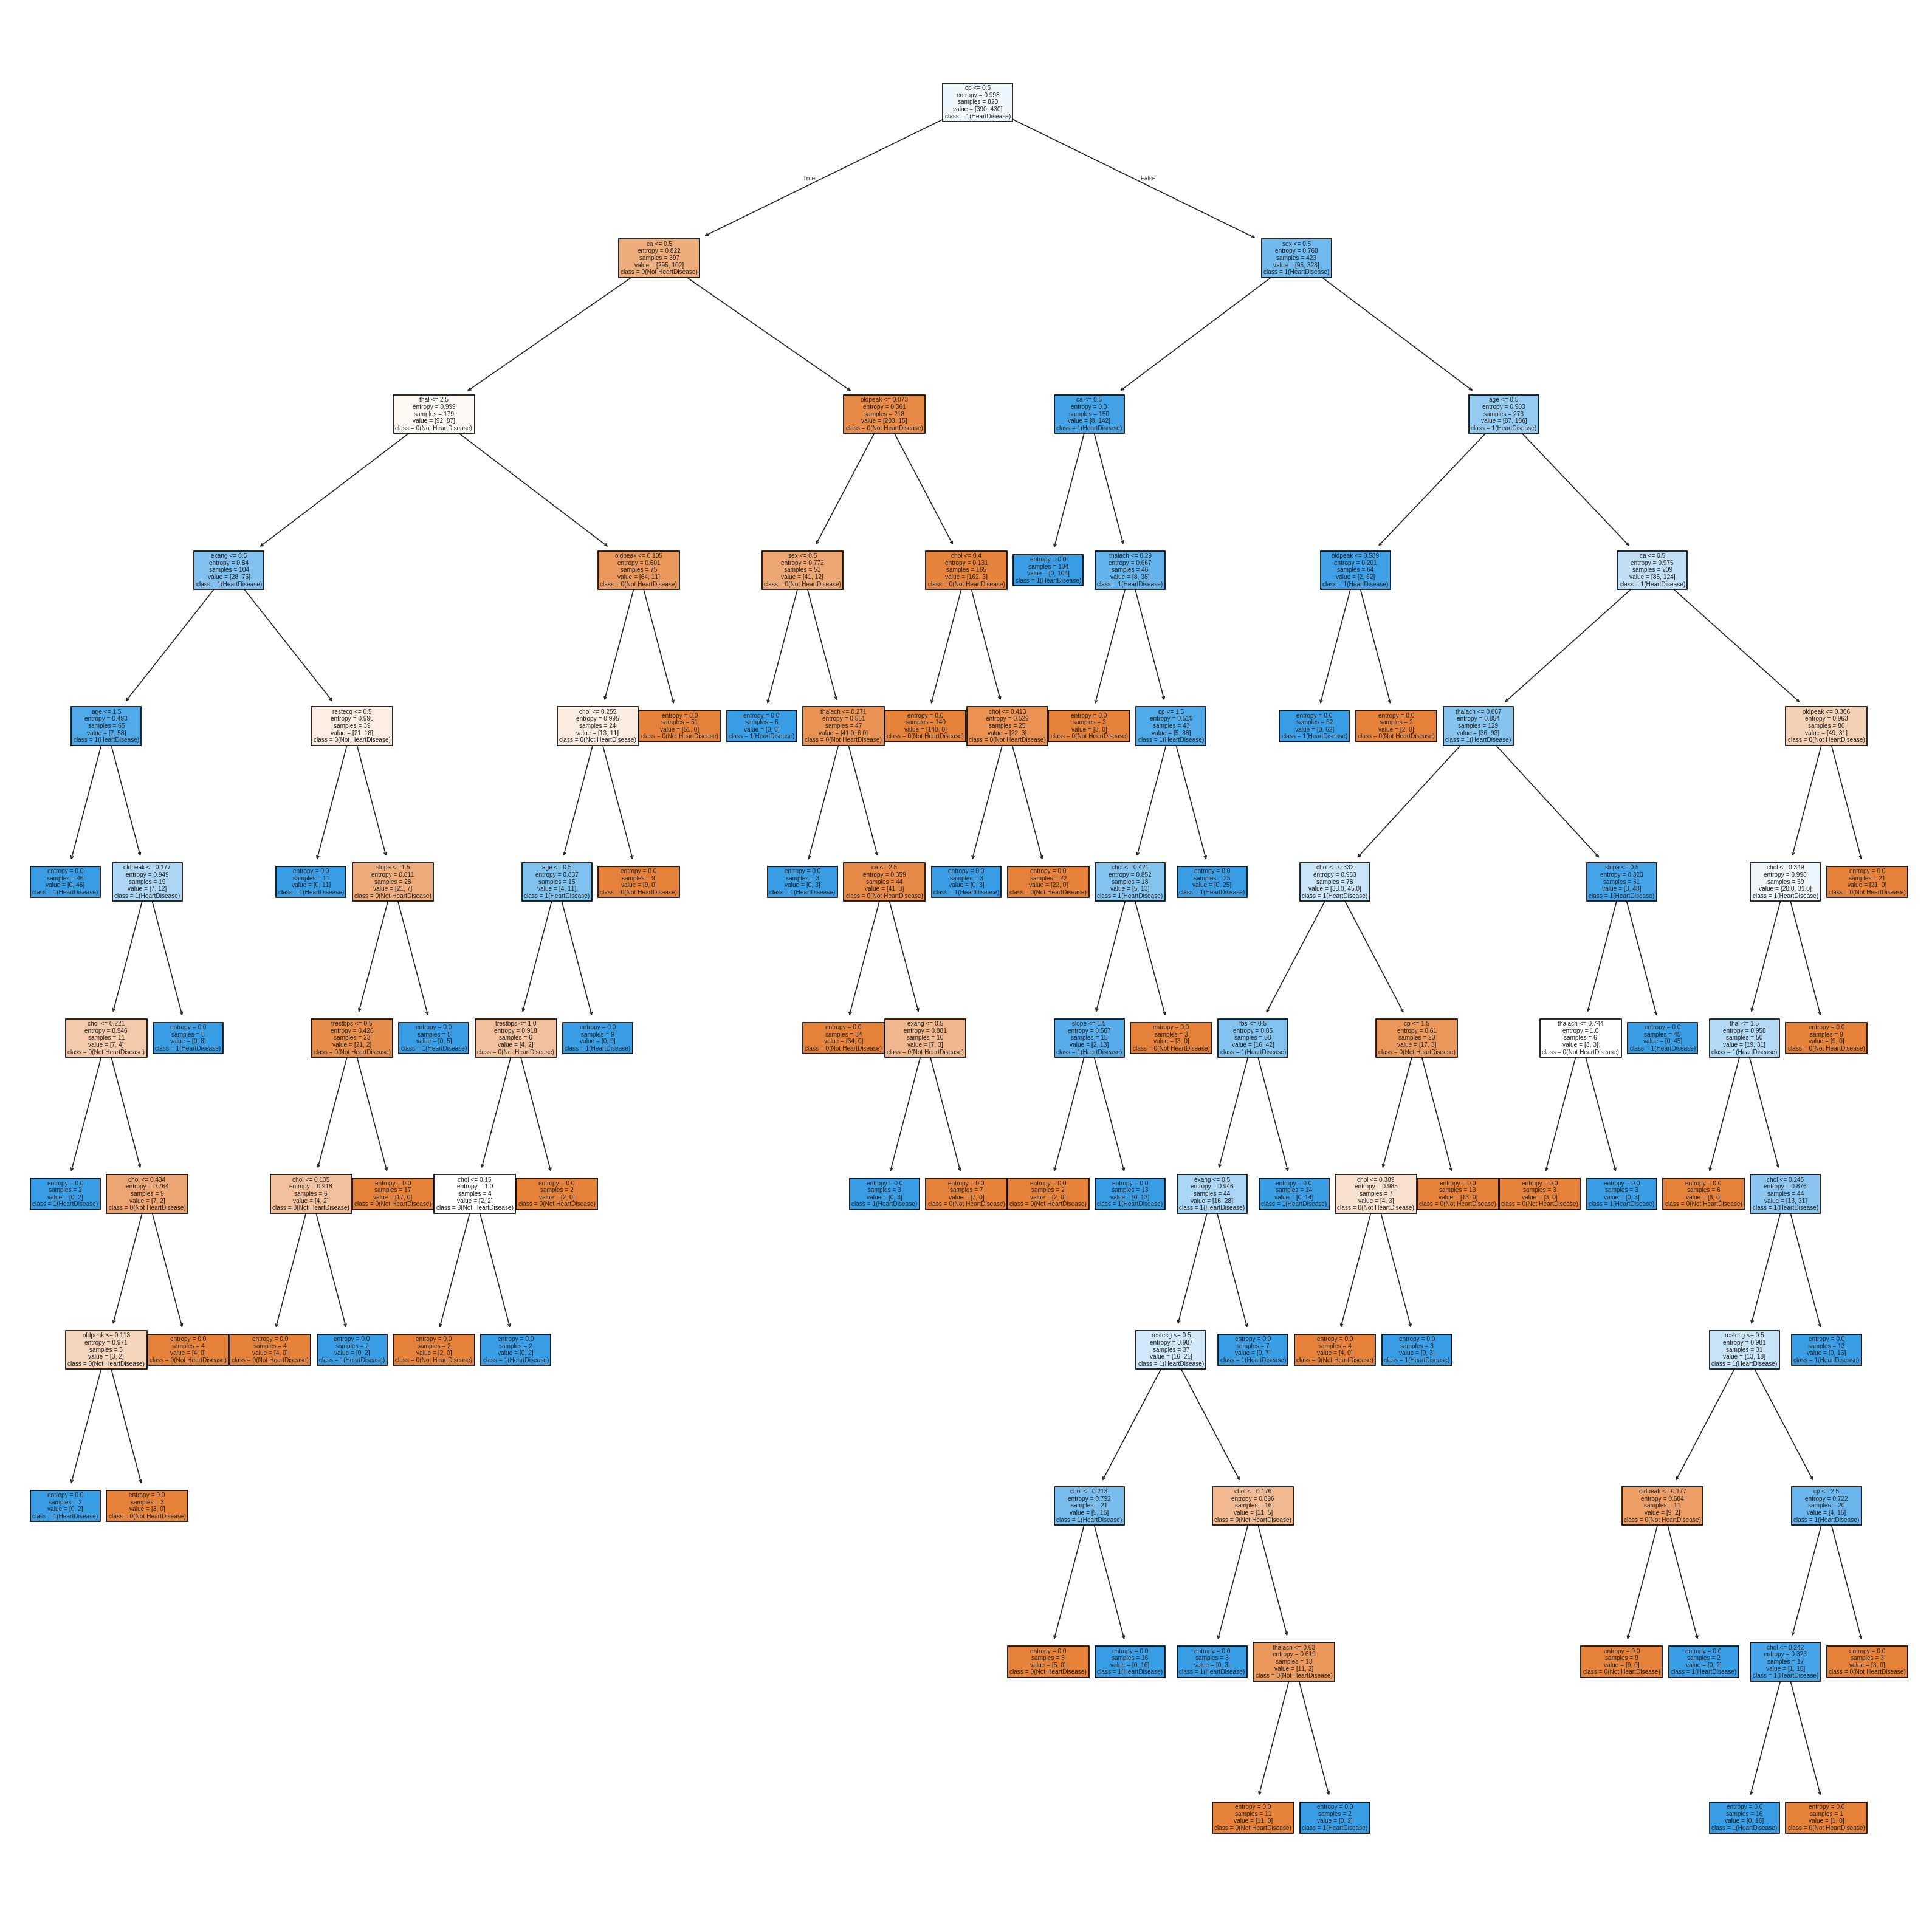

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 10), dpi=400)


class_labels = {0: '0(Not HeartDisease)' , 1:'1(HeartDisease)'}

tree.plot_tree(clf3,
               feature_names=fn,
               class_names=[class_labels[0], class_labels[1]],
               filled=True
               )

plt.show()

make it shortere little bit This decision tree classifier was generated using Information Gain as the splitting criterion and trained on an 80% training, 20% testing dataset split. It visually represents the logic the model uses to classify patients into "Risk attack" (1) or "No risk attack" (0), based on their medical attributes. Each internal node in the tree evaluates a feature condition, and each leaf node gives a prediction. The class_label dictionary is used to map class values: 1 denotes a patient at risk of heart attack, while 0 indicates no risk. Notably, this model achieved perfect accuracy, sensitivity, specificity, and precision, meaning it correctly classified all instances in the test set. While this high performance is impressive, the tree is highly complex and deep, which may hinder interpretability and pose challenges in real-world medical decision-making.

# **part 2: Clustering:**

From the analysis, we applied multiple clustering evaluation techniques to determine the optimal number of clusters (K) for our dataset. We evaluated the models using the silhouette score and WSS (Within-Cluster Sum of Squares) for different values of K, as well as visualizations such as the silhouette plot.

The table below summarizes the results of our evaluation:

In [ ]:


data = {
    " ": ["WSS", "Silhouette"],
    "k=2": ["3842.5", "0.2039"],
    "k=3": ["3213.05", "0.1974"],
    "k=4": ["2971.10", "0.1529"]
}

# Convert the data into a DataFrame
df = pd.DataFrame(data)

g = pd.DataFrame(data)
g.style.set_properties(**{'text-align': 'center'})

ased on these results, K=2 was selected as the optimal number of clusters for the dataset. This decision was primarily driven by the following observations:

* Silhouette Score: K=2 has the highest silhouette score (0.2039), indicating that the data points in this cluster are well separated and cohesively grouped compared to K=3 and K=4. This score reflects the quality of the clustering, with a higher value suggesting better-defined clusters.

* WSS (Within-Cluster Sum of Squares): While the WSS decreases as the number of
clusters increases, K=2 still shows a reasonable level of compactness and separation. The substantial drop in WSS from K=2 to K=3 (3842.5 to 3213.05) suggests that additional clusters beyond 2 don't provide significant improvements in the tightness of the clusters.

* Silhouette Plots: The silhouette plot for K=2 further confirmed the distinctiveness and cohesiveness of the clusters. The clustering with K=2 produced clear separation between the groups, which aligns with the silhouette analysis results.

Thus, based on the combination of metrics—highest silhouette score, reasonable WSS, and strong visual evidence—we conclude that K=2 provides the best balance of cluster cohesion and separation for this dataset.

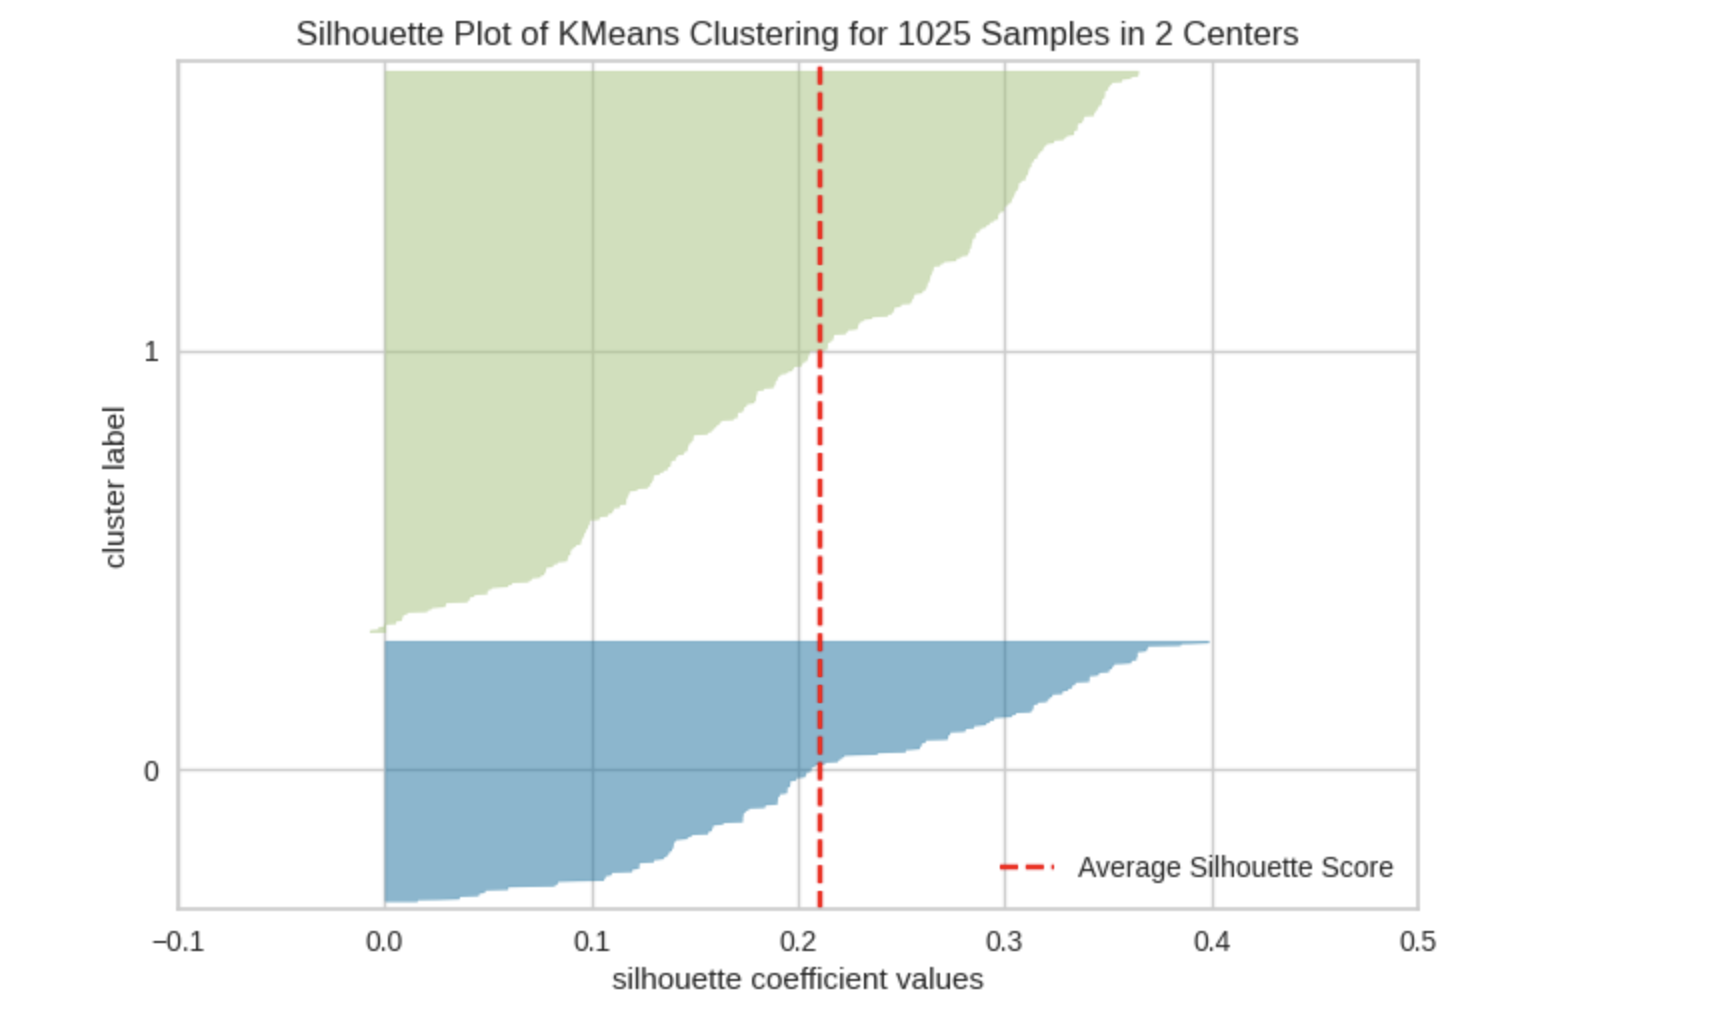

The first configuration (K=2, WSS = 3842.70, Silhouette Score = 0.2039) is the best overall. Despite having the highest WSS, it achieves the highest silhouette score, suggesting better-separated clusters. This trade-off indicates that the clusters are more distinct compared to the other configurations, offering a clearer separation of data points.

# **Final Discussion**
Both classification and clustering analyses provided valuable insights:

* The Information Gain Decision Tree (20-80 split) is the most reliable model for heart disease prediction, balancing high accuracy with generalizability.

* The K=2 clustering configuration offers a meaningful division of the dataset into groups, potentially useful for further profiling of patient types.

These data mining results are highly interesting and practical. The classification model supports early detection of heart disease, while the clustering analysis helps in group-based patient profiling, aiding in preventive care strategies.

# **8. References:**

[1] J. Smith, "Heart Disease Dataset," Kaggle, [Online]. Available: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset. [Accessed: Apr. 19, 2025].​


[2] "Labs and Lecture Slides," College of Computer Science, Department of Information Technology, King Saud University. [Accessed: Apr. 19, 2025].​

[3] J. Saleh, "IT326 Project Repository," GitHub. [Online]. Available: https://github.com/JoudySaleh-IT/IT326.git. [Accessed: Apr. 19, 2025].
